In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [198]:
basic_folder = '/Users/gangbyeongho/Desktop/kang/KHU/전공/2024-1/빅데이터프로젝트/dataset/'

df_jetbrain = pd.read_csv(basic_folder + 'jetBrain.csv')

/var/folders/gg/4qp_rmh142s9_kw6c0456bq00000gn/T/ipykernel_52292/2882901221.py:3: DtypeWarning: Columns (11,12,13,16,19,21,26,37,46,47,52,55,57,58,59,79,80,89,91,96,99,105,107,109,113,114,117,118,119,120,126,130,133,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,162,163,171,172,177,179,180,181,185,189,193,194,196,201,206,208,212,214,215,216,218,219,220,224,226,227,228,229,231,233,234,235,236,239,241,242,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,269,270,271,272,273,274,275,276,277,278,279,280,281,282,285,286,287,288,289,290,291,292,293,294,297,298,299,300,303,304,305,306,307,308,313,314,315,316,319,320,321,322,323,324,325,326,329,330,331,332,333,335,336,337,338,339,341,342,343,344,345,346,347,349,350,351,352,357,358,359,360,361,362,363,364,365,367,368,370,371,372,373,374,376,377,378,383,385,387,388,389,390,391,393,395,396,397,398,399,400,401,402,403,404,408,410,411,412,413,414,415,417,418,419,420,

In [200]:
grouped_columns = {}
for col in df_jetbrain.columns:
    if '.' in col:
        prefix = col.split('.')[0]
        if prefix not in grouped_columns:
            grouped_columns[prefix] = []
        grouped_columns[prefix].append(col)
    else:
        if 'no_prefix' not in grouped_columns:
            grouped_columns['no_prefix'] = []
        grouped_columns['no_prefix'].append(col)

# 새로운 데이터프레임을 담을 딕셔너리 초기화
new_data = pd.DataFrame()

# 그룹화된 컬럼들을 처리
for prefix, cols in grouped_columns.items():
    if prefix != 'no_prefix':
        # 해당 컬럼들을 모아 새로운 데이터프레임 생성
        sub_df = df_jetbrain[cols]
        # NaN이 아닌 값 선택하고, 같은 row에서 여러 값이 있으면 ';'로 연결
        sub_df[prefix] = sub_df.apply(lambda row: ';'.join(row.dropna().astype(str)), axis=1)
        # 새로운 데이터프레임에 해당 컬럼 추가
        new_data[prefix] = sub_df[prefix]
    else:
        # .이 없는 컬럼은 그대로 추가
        for col in cols:
            new_data[col] = df_jetbrain[col]


/var/folders/gg/4qp_rmh142s9_kw6c0456bq00000gn/T/ipykernel_52292/969488981.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = df_jetbrain[col]
/var/folders/gg/4qp_rmh142s9_kw6c0456bq00000gn/T/ipykernel_52292/969488981.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = df_jetbrain[col]
/var/folders/gg/4qp_rmh142s9_kw6c0456bq00000gn/T/ipykernel_52292/969488981.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [202]:
new_data.to_csv("./test_transformed_data.csv")

In [203]:
new_data.shape

(29269, 621)

In [242]:
new_data.head(5)

response_id    weight         amazon  \
0        qQ5x  1.970867         France   
1        jnvX  0.318537  United States   
2        VVpl  3.875585            NaN   
3        D94r  0.460676        Germany   
4        y3zW  1.172686            NaN   

                                employment_status position_level  \
0  Partially employed by a company / organization         Middle   
1      Fully employed by a company / organization         Middle   
2      Fully employed by a company / organization         Middle   
3      Fully employed by a company / organization         Middle   
4      Fully employed by a company / organization         Senior   

  teaching_what    code_yrs                                    edu_level  \
0           NaN   3–5 years                                          NaN   
1           NaN   3–5 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   
2           NaN  6–10 years                                          NaN   
3           NaN  6–10 years                                          NaN   
4           NaN  6–10 years                                          NaN   

  age_range        country  ... ps_absorbed_feel_easy_to_get_out  \
0     21–29  Other country  ...                                    
1     30–39  United States  ...                              5.0   
2     30–39          Japan  ...                                    
3     21–29        Germany  ...                              5.0   
4     21–29  United States  ...                              1.0   

                                       help_prevents  \
0                                                      
1                                                      
2                                                      
3                                                      
4  It’s hard for me to communicate with other peo...   

                                          help_howdo  \
0                                                      
1  In-person meeting;Voice/phone call while shari...   
2                                                      
3           Voice/phone call while sharing my screen   
4           Voice/phone call while sharing my screen   

  ps_feel_statements_cheerful  ps_feel_statements_relaxed  \
0                                                           
1  More than half of the time  More than half of the time   
2                                                           
3  Less than half of the time  Less than half of the time   
4  More than half of the time  Less than half of the time   

    ps_feel_statements_active ps_feel_statements_freshwoked  \
0                                                             
1  Less than half of the time    More than half of the time   
2                                                             
3            Some of the time                    At no time   
4            Most of the time    More than half of the time   

  ps_feel_statements_interested                                      primary  \
0                                                                       Dart   
1    More than half of the time  Python;Shell scripting languages;TypeScript   
2                                                           TypeScript;Go;C#   
3    Less than half of the time                            TypeScript;SQL;C#   
4              Most of the time                              TypeScript;C#;C   

                                          rank  
0                                         Dart  
1  Python;TypeScript;Shell scripting languages  
2                                               
3                            C#;TypeScript;SQL  
4                              C#;TypeScript;C  

[5 rows x 621 columns]

In [131]:
df_jetbrain.shape

(29269, 3804)

In [132]:
df_jetbrain.head(5)

response_id    weight  \
0        qQ5x  1.970867   
1        jnvX  0.318537   
2        VVpl  3.875585   
3        D94r  0.460676   
4        y3zW  1.172686   

  terms.I have read and I accept these Terms and Conditions         amazon  \
0  I have read and I accept these Terms and Condi...                France   
1  I have read and I accept these Terms and Condi...         United States   
2  I have read and I accept these Terms and Condi...                   NaN   
3  I have read and I accept these Terms and Condi...               Germany   
4  I have read and I accept these Terms and Condi...                   NaN   

                                employment_status  \
0  Partially employed by a company / organization   
1      Fully employed by a company / organization   
2      Fully employed by a company / organization   
3      Fully employed by a company / organization   
4      Fully employed by a company / organization   

  job_role.Developer / Programmer /  Software Engineer  \
0        Developer / Programmer /  Software Engineer     
1        Developer / Programmer /  Software Engineer     
2        Developer / Programmer /  Software Engineer     
3        Developer / Programmer /  Software Engineer     
4        Developer / Programmer /  Software Engineer     

  job_role.DevOps Engineer / Infrastructure Developer job_role.DBA  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2                                                NaN           NaN   
3                                                NaN           DBA   
4                                                NaN           NaN   

  job_role.Architect job_role.Tester / QA Engineer  ... primary.Haskell  \
0                NaN                           NaN  ...             NaN   
1                NaN                           NaN  ...             NaN   
2                NaN                           NaN  ...             NaN   
3                NaN                           NaN  ...             NaN   
4          Architect                           NaN  ...             NaN   

  rank.COBOL primary.I don't use programming languages rank.GraphQL  \
0        NaN                                       NaN          NaN   
1        NaN                                       NaN          NaN   
2        NaN                                       NaN          NaN   
3        NaN                                       NaN          NaN   
4        NaN                                       NaN          NaN   

  is_employed        main    source                       know_jb_fixed  \
0    Employed        Dart  internal  I currently use JetBrains products   
1    Employed  TypeScript  internal  I currently use JetBrains products   
2    Employed         NaN  internal  I currently use JetBrains products   
3    Employed          C#  internal  I currently use JetBrains products   
4    Employed          C#  internal  I currently use JetBrains products   

                              region salary_group  
0  Africa, Middle East, Central Asia          NaN  
1                      United States  Middle-paid  
2                              Japan          NaN  
3                            Germany  Middle-paid  
4                      United States  Middle-paid  

[5 rows x 3804 columns]

In [133]:
df_jetbrain.columns

for i in df_jetbrain.columns :
    print (i)

response_id
weight
terms.I have read and I accept these Terms and Conditions
amazon
employment_status
job_role.Developer / Programmer /  Software Engineer
job_role.DevOps Engineer / Infrastructure Developer
job_role.DBA
job_role.Architect
job_role.Tester / QA Engineer
job_role.Technical Support
job_role.Data Analyst / Data Engineer/ Data Scientist
job_role.Business Analyst
job_role.Technical Writer
job_role.Team Lead
job_role.Systems Analyst
job_role.Product Manager / Marketing Manager
job_role.UX / UI Designer
job_role.CIO / CEO / CTO
job_role.Developer Advocate
job_role.Instructor / Teacher / Tutor
job_role.Other
position_level
os_devenv.Windows
os_devenv.Linux
os_devenv.macOS
os_devenv.Other
activities_kinds.None
activities_kinds.Academic Research
activities_kinds.Coding / Programming
activities_kinds.Code Reviewing
activities_kinds.Testing
activities_kinds.System Design
activities_kinds.Graphics Design / Art
activities_kinds.Infrastructure Development / DevOps
activities_kinds.Syst

##  'position_level'에 따라 데이터 분리 (Junior, MIddle, Senior)

In [206]:
middle_df = new_data[new_data['position_level'] == 'Middle']
senior_df = new_data[new_data['position_level'] == 'Senior']
junior_df = new_data[new_data['position_level'] == 'Junior']


middle_df.to_csv('../../created_csv/jetbrain_middle.csv', index=False)
senior_df.to_csv('../../created_csv/jetbrain_senior.csv', index=False)
junior_df.to_csv('../../created_csv/jetbrain_junior.csv', index=False)


In [207]:
junior_df.head(5)

response_id    weight  amazon  \
8         2YDV  0.589748     NaN   
9         3ky9  0.371278  France   
18        XkdN  0.321475     NaN   
25        oB5L  0.586052     NaN   
47        PW76  1.790546     NaN   

                                    employment_status position_level  \
8          Fully employed by a company / organization         Junior   
9                                     Working student         Junior   
18                                    Working student         Junior   
25         Fully employed by a company / organization         Junior   
47  Freelancer (a person pursuing a profession wit...         Junior   

   teaching_what   code_yrs                                    edu_level  \
8            NaN  1–2 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   
9            NaN  1–2 years     Bachelor’s degree (BA, BS, B_Eng_, etc_)   
18           NaN  3–5 years                                          NaN   
25           NaN  1–2 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   
47           NaN  3–5 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   

   age_range        country  ... ps_absorbed_feel_easy_to_get_out  \
8      21–29         France  ...                                    
9      18–20         France  ...                                    
18     21–29         Poland  ...                                    
25     21–29        Germany  ...                                    
47     21–29  Other country  ...                                    

   help_prevents help_howdo ps_feel_statements_cheerful  \
8                                                         
9                                                         
18                                                        
25                                                        
47                                                        

   ps_feel_statements_relaxed ps_feel_statements_active  \
8                                                         
9                                                         
18                                                        
25                                                        
47                                                        

   ps_feel_statements_freshwoked ps_feel_statements_interested  \
8                                                                
9                                                                
18                                                               
25                                                               
47                                                               

                               primary                                rank  
8   Shell scripting languages;Java;SQL  Java;Shell scripting languages;SQL  
9            JavaScript;PHP;HTML / CSS           PHP;JavaScript;HTML / CSS  
18          JavaScript;HTML / CSS;Ruby          JavaScript;Ruby;HTML / CSS  
25                                  C#                                  C#  
47        Python;TypeScript;JavaScript        Python;TypeScript;JavaScript  

[5 rows x 621 columns]

In [208]:
df_jetbrain2 = pd.read_csv(basic_folder + 'jet_brain.csv')

## JetBrain 응답별로 필요한 데이터 셋 가져오기
- lifstyle_sleep
- job_code
- learn_time
- job_productive

job_productive의 경우 job_productive.{hobby} 의 데이터로 존재하여 이것을 묶어서 hobby를 value로 처리 필요

In [246]:
# job_productive로 시작하는 변수 필터링
job_productive_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('job_productive')]
job_productive_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

productive_list = job_productive_df['variable'].unique().tolist()
other_list = ['lifestyle_sleep', 'job_code', 'learn_time']

include_list = productive_list + other_list

jetbrain_filtered_df = df_jetbrain2[df_jetbrain2['variable'].isin(include_list)]
jetbrain_filtered_df.head(5)

response_id              variable              value    weight
174         qQ5x       lifestyle_sleep          6-7 hours  1.970867
318         jnvX            learn_time  9–16 hours a week  0.318537
864         y3zW            learn_time  9–16 hours a week  1.172686
1052        PWp6              job_code      Less than 10%  0.222448
1057        PWp6  job_productive.Music              Music  0.222448

job_productive.{hobby} variable의 value들 모두 job_productive로 변경

In [247]:
jetbrain_filtered_df['variable'] = jetbrain_filtered_df['variable'].str.split('.').str[0]
jetbrain_filtered_df.head(10)

/var/folders/gg/4qp_rmh142s9_kw6c0456bq00000gn/T/ipykernel_52292/3164448730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jetbrain_filtered_df['variable'] = jetbrain_filtered_df['variable'].str.split('.').str[0]


response_id         variable              value    weight
174         qQ5x  lifestyle_sleep          6-7 hours  1.970867
318         jnvX       learn_time  9–16 hours a week  0.318537
864         y3zW       learn_time  9–16 hours a week  1.172686
1052        PWp6         job_code      Less than 10%  0.222448
1057        PWp6   job_productive              Music  0.222448
1058        PWp6   job_productive           Sleeping  0.222448
1059        PWp6   job_productive            Hobbies  0.222448
1060        PWp6   job_productive            Walking  0.222448
1517        2YDV         job_code            31%-40%  0.589748
1522        2YDV   job_productive              Music  0.589748

In [211]:
jetbrain_pivot_df = jetbrain_filtered_df.pivot_table(index='response_id', columns='variable', values='value', aggfunc='first')
jetbrain_pivot_df.reset_index()


variable response_id       job_code job_productive        learn_time  \
0               011A        71%-80%         Coffee               NaN   
1               012q        41%-50%         Coffee               NaN   
2               0161        31%-40%       Sleeping               NaN   
3               017Z        61%-70%         Coffee               NaN   
4               01Aq        71%-80%         Coffee  3–8 hours a week   
...              ...            ...            ...               ...   
10613           zymY        21%-30%         Coffee               NaN   
10614           zyo8  Less than 10%          Music               NaN   
10615           zyvy        51%-60%         Coffee               NaN   
10616           zyxe        10%-20%         Coffee  1–2 hours a week   
10617            zz0        81%-90%         Coffee               NaN   

variable lifestyle_sleep  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
10613                NaN  
10614                NaN  
10615          5-6 hours  
10616                NaN  
10617                NaN  

[10618 rows x 5 columns]

In [212]:
jetbrain_pivot_df.head(100)

variable          job_code job_productive        learn_time lifestyle_sleep
response_id                                                                
011A               71%-80%         Coffee               NaN             NaN
012q               41%-50%         Coffee               NaN             NaN
0161               31%-40%       Sleeping               NaN             NaN
017Z               61%-70%         Coffee               NaN             NaN
01Aq               71%-80%         Coffee  3–8 hours a week             NaN
...                    ...            ...               ...             ...
0OWq               71%-80%         Coffee               NaN       7-8 hours
0Oev         More than 90%         Coffee               NaN             NaN
0OrA               61%-70%         Coffee  3–8 hours a week             NaN
0Oyq               21%-30%         Coffee               NaN       5-6 hours
0Pv                51%-60%         Coffee               NaN             NaN

[100 rows x 4 columns]

### 각 variable별 고유값 추출

In [213]:
unique_values = {col: jetbrain_pivot_df[col].dropna().unique().tolist() for col in jetbrain_pivot_df.columns}
unique_values['job_code']

['71%-80%',
 '41%-50%',
 '31%-40%',
 '61%-70%',
 '21%-30%',
 '51%-60%',
 '10%-20%',
 '81%-90%',
 'More than 90%',
 'Less than 10%']

In [142]:
unique_values['learn_time']

['3–8 hours a week',
 '9–16 hours a week',
 '1–2 hours a week',
 '32 hours a week or more',
 '17–32 hours a week',
 'Less than 1 hour a week']

In [143]:
unique_values['lifestyle_sleep']

['7-8 hours',
 '6-7 hours',
 '4-5 hours',
 'More than 9 hours',
 '5-6 hours',
 '8-9 hours',
 'Less than 4 hours']

### 두 csv에서 추출한 DataFrame에서 response_id 매칭시키기

In [249]:
jetbrain_merged_df = pd.merge(junior_df, jetbrain_pivot_df, on='response_id', how='left') # new data -> junior df -> merged df
jetbrain_merged_df.head(10)

response_id    weight   amazon  \
0        2YDV  0.589748      NaN   
1        3ky9  0.371278   France   
2        XkdN  0.321475      NaN   
3        oB5L  0.586052      NaN   
4        PW76  1.790546      NaN   
5        BO1P  0.514433      NaN   
6        gnqO  0.596868  Germany   
7        x2e7  0.736340      NaN   
8        djyl  0.228588      NaN   
9        0gx1  2.652661      NaN   

                                   employment_status position_level  \
0         Fully employed by a company / organization         Junior   
1                                    Working student         Junior   
2                                    Working student         Junior   
3         Fully employed by a company / organization         Junior   
4  Freelancer (a person pursuing a profession wit...         Junior   
5         Fully employed by a company / organization         Junior   
6         Fully employed by a company / organization         Junior   
7         Fully employed by a company / organization         Junior   
8         Fully employed by a company / organization         Junior   
9     Partially employed by a company / organization         Junior   

  teaching_what          code_yrs  \
0           NaN         1–2 years   
1           NaN         1–2 years   
2           NaN         3–5 years   
3           NaN         1–2 years   
4           NaN         3–5 years   
5           NaN         3–5 years   
6           NaN  Less than 1 year   
7           NaN         1–2 years   
8           NaN         3–5 years   
9           NaN         1–2 years   

                                           edu_level age_range  \
0        Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29   
1           Bachelor’s degree (BA, BS, B_Eng_, etc_)     18–20   
2                                                NaN     21–29   
3        Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29   
4        Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29   
5                                                NaN     30–39   
6           Bachelor’s degree (BA, BS, B_Eng_, etc_)     21–29   
7           Bachelor’s degree (BA, BS, B_Eng_, etc_)     21–29   
8                                                NaN     21–29   
9  Some college/university study without earning ...     21–29   

              country  ...  ps_feel_statements_relaxed  \
0              France  ...                               
1              France  ...                               
2              Poland  ...                               
3             Germany  ...                               
4       Other country  ...                               
5         South Korea  ...                               
6             Germany  ...                               
7         Netherlands  ...                               
8              Serbia  ...  More than half of the time   
9  Russian Federation  ...                               

  ps_feel_statements_active ps_feel_statements_freshwoked  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           
5                                                           
6                                                           
7                                                           
8          Some of the time    Less than half of the time   
9                                                           

  ps_feel_statements_interested                             primary  \
0                                Shell scripting languages;Java;SQL   
1                                         JavaScript;PHP;HTML / CSS   
2                                        JavaScript;HTML / CSS;Ruby   
3                                                                C#   
4                     


위의 job_productive와 동일하게 데이터 처리(deprecated)

In [145]:

activities_kinds_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('activities_kinds')]
activities_kinds_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

In [146]:
# sw_types_developed

sw_types_developed_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('sw_types_developed')]
sw_types_developed_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

In [147]:
# jb_prod_use

jb_prod_use_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('jb_prod_use')]
jb_prod_use_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

In [148]:

primary_proglang_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('primary_proglang')]
primary_proglang_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

adopt_proglang_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('adopt_proglang')]
adopt_proglang_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

r_ide_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('r_ide')]
r_ide_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

db_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('db')]
db_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

regularly_tools_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('regularly_tools')]
regularly_tools_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

communication_tools_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('communication_tools')]
communication_tools_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

ides_df = df_jetbrain2[df_jetbrain2['variable'].str.startswith('ides')]
ides_values = list(set(job_productive_df['value'])) # job_pruductive 응답 데이터

job_role로 시작하는 컬럼만 추출하여 job정보들 추출 (deprecated)

In [149]:
job_role_columns = [col for col in jetbrain_merged_df.columns if col.startswith('job_role.')]
job_role_columns

primary_proglang_columns = [col for col in jetbrain_merged_df.columns if col.startswith('primary_proglang.')]
primary_proglang_columns

adopt_proglang_columns = [col for col in jetbrain_merged_df.columns if col.startswith('adopt_proglang.')]
adopt_proglang_columns

r_ide_columns = [col for col in jetbrain_merged_df.columns if col.startswith('r_ide.')]
r_ide_columns

db_columns = [col for col in jetbrain_merged_df.columns if col.startswith('db.')]
db_columns

regularly_tools_columns = [col for col in jetbrain_merged_df.columns if col.startswith('regularly_tools.')]
regularly_tools_columns

communication_tools_columns = [col for col in jetbrain_merged_df.columns if col.startswith('communication_tools.')]
communication_tools_columns

ides_columns = [col for col in jetbrain_merged_df.columns if col.startswith('ides.')]
ides_columns

activities_kinds_columns = [col for col in jetbrain_merged_df.columns if col.startswith('activities_kinds.')]
activities_kinds_columns

sw_types_developed_columns = [col for col in jetbrain_merged_df.columns if col.startswith('sw_types_developed.')]
sw_types_developed_columns

jb_prod_use_columns = [col for col in jetbrain_merged_df.columns if col.startswith('jb_prod_use.')]
jb_prod_use_columns

['jb_prod_use.None',
 'jb_prod_use.IntelliJ IDEA Ultimate',
 'jb_prod_use.IntelliJ IDEA Community Edition',
 'jb_prod_use.RubyMine',
 'jb_prod_use.PyCharm Professional Edition',
 'jb_prod_use.PyCharm Community Edition',
 'jb_prod_use.AppCode',
 'jb_prod_use.CLion',
 'jb_prod_use.PhpStorm',
 'jb_prod_use.WebStorm',
 'jb_prod_use.GoLand',
 'jb_prod_use.DataGrip',
 'jb_prod_use.DataSpell',
 'jb_prod_use.JetBrains Rider',
 'jb_prod_use.Fleet',
 'jb_prod_use.ReSharper',
 'jb_prod_use.ReSharper C++',
 'jb_prod_use.dotCover',
 'jb_prod_use.dotTrace',
 'jb_prod_use.dotMemory',
 'jb_prod_use.dotPeek',
 'jb_prod_use.Space',
 'jb_prod_use.TeamCity',
 'jb_prod_use.YouTrack',
 'jb_prod_use.Datalore',
 'jb_prod_use.Upsource',
 'jb_prod_use.Qodana',
 'jb_prod_use.PyCharm Edu',
 'jb_prod_use.IntelliJ IDEA Edu',
 'jb_prod_use.JetBrains Academy',
 'jb_prod_use.JetBrains Toolbox',
 'jb_prod_use.Code With Me',
 'jb_prod_use.JetBrains Gateway',
 'jb_prod_use.MPS']

- primary_proglang
- adopt_proglang
- r_ide
- db
- regularly_tools
- communication_tools
- ides

In [150]:

def group_by_job_role(row):
    for col in job_role_columns:
        if pd.notna(row[col]):
            print(col.split('.'))
            return col.split('.')[1]
    return 'Other'

def group_by_primary_proglang(row):
    for col in primary_proglang_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_adopt_proglang(row):
    for col in adopt_proglang_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_r_ide(row):
    for col in r_ide_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_db(row):
    for col in db_columns:
        if pd.notna(row[col]):
            print(col.split('.'))
            return col.split('.')[1]
    return 'Other'

def group_by_regularly_tools(row):
    for col in regularly_tools_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_communication_tools(row):
    for col in communication_tools_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_ides(row):
    for col in ides_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_activities_kinds(row):
    for col in activities_kinds_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_sw_types_developed(row):
    for col in sw_types_developed_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'

def group_by_jb_prod_use(row):
    for col in jb_prod_use_columns:
        if pd.notna(row[col]):
            return col.split('.')[1]
    return 'Other'


### group열 생성 및 추가

In [151]:
jetbrain_merged_df['job_role_group'] = jetbrain_merged_df.apply(group_by_job_role, axis=1)
jetbrain_merged_df['primary_proglang'] = jetbrain_merged_df.apply(group_by_primary_proglang, axis=1)
jetbrain_merged_df['adopt_proglang'] = jetbrain_merged_df.apply(group_by_adopt_proglang, axis=1)
jetbrain_merged_df['db'] = jetbrain_merged_df.apply(group_by_db, axis=1)
jetbrain_merged_df['regularly_tools'] = jetbrain_merged_df.apply(group_by_regularly_tools, axis=1)
jetbrain_merged_df['communication_tools'] = jetbrain_merged_df.apply(group_by_communication_tools, axis=1)
jetbrain_merged_df['ides'] = jetbrain_merged_df.apply(group_by_ides, axis=1)
jetbrain_merged_df['activities_kind'] = jetbrain_merged_df.apply(group_by_activities_kinds, axis=1)
jetbrain_merged_df['sw_types_developed'] = jetbrain_merged_df.apply(group_by_sw_types_developed, axis=1)
jetbrain_merged_df['jb_prod_use'] = jetbrain_merged_df.apply(group_by_jb_prod_use, axis=1)


['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Product Manager / Marketing Manager']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'DevOps Engineer / Infrastructure Developer']
['job_role', 'Instructor / Teacher / Tutor']
['job_role', 'Data Analyst / Data Engineer/ Data Scientist']
['job_role', 'Developer / Programmer /  Software Engineer']
['job_role', 'Developer / Programmer /  Software Engineer']
['j

In [152]:
jetbrain_merged_df.head(100)

response_id    weight  \
0         qQ5x  1.970867   
1         jnvX  0.318537   
2         VVpl  3.875585   
3         D94r  0.460676   
4         y3zW  1.172686   
..         ...       ...   
95         2Vg  0.703771   
96        qQjy  1.498502   
97        jn18  0.363654   
98        VVEg  1.509490   
99        D9jB  3.827194   

   terms.I have read and I accept these Terms and Conditions         amazon  \
0   I have read and I accept these Terms and Condi...                France   
1   I have read and I accept these Terms and Condi...         United States   
2   I have read and I accept these Terms and Condi...                   NaN   
3   I have read and I accept these Terms and Condi...               Germany   
4   I have read and I accept these Terms and Condi...                   NaN   
..                                                ...                   ...   
95  I have read and I accept these Terms and Condi...               Germany   
96  I have read and I accept these Terms and Condi...                   NaN   
97  I have read and I accept these Terms and Condi...               Germany   
98  I have read and I accept these Terms and Condi...                   NaN   
99  I have read and I accept these Terms and Condi...                   NaN   

                                    employment_status  \
0      Partially employed by a company / organization   
1          Fully employed by a company / organization   
2          Fully employed by a company / organization   
3          Fully employed by a company / organization   
4          Fully employed by a company / organization   
..                                                ...   
95         Fully employed by a company / organization   
96                                            Student   
97         Fully employed by a company / organization   
98  Self-employed (a person earning income directl...   
99         Fully employed by a company / organization   

   job_role.Developer / Programmer /  Software Engineer  \
0         Developer / Programmer /  Software Engineer     
1         Developer / Programmer /  Software Engineer     
2         Developer / Programmer /  Software Engineer     
3         Developer / Programmer /  Software Engineer     
4         Developer / Programmer /  Software Engineer     
..                                                ...     
95        Developer / Programmer /  Software Engineer     
96                                                NaN     
97                                                NaN     
98        Developer / Programmer /  Software Engineer     
99                                                NaN     

   job_role.DevOps Engineer / Infrastructure Developer job_role.DBA  \
0                                                 NaN           NaN   
1                                                 NaN           NaN   
2                                                 NaN           NaN   
3                                                 NaN           DBA   
4                                                 NaN           NaN   
..                                                ...           ...   
95                                                NaN           NaN   
96                                                NaN           NaN   
97                                                NaN           NaN   
98                                                NaN           DBA   
99         DevOps Engineer / Infrastructure Developer           NaN   

   job_role.Architect job_role.Tester / QA Engineer  ...  \
0                 NaN                           NaN  ...   
1                 NaN                           NaN  ...   
2                 NaN                           NaN  ...   
3                 NaN                           NaN  ...   
4           Architect                           NaN  ...   
..                ...                           ...  ...   
95                NaN                           Na

필요없는 컬럼들 삭제

In [159]:
def combine_lists(*lists):
    combined_list = []
    for lst in lists:
        combined_list.extend(lst)
    return combined_list

In [160]:
columns_to_drop = combine_lists(job_role_columns, primary_proglang_columns, adopt_proglang_columns, r_ide_columns, db_columns, regularly_tools_columns, communication_tools_columns, ides_columns, activities_kinds_columns, sw_types_developed_columns, jb_prod_use_columns)
jetbrain_merged_df.drop(columns=columns_to_drop, inplace=True)


In [215]:
jetbrain_merged_df

response_id    weight         amazon  \
0            qQ5x  1.970867         France   
1            jnvX  0.318537  United States   
2            VVpl  3.875585            NaN   
3            D94r  0.460676        Germany   
4            y3zW  1.172686            NaN   
...           ...       ...            ...   
29264        PWp4  1.835365            NaN   
29265        mLOO  1.581362  United States   
29266        nBkm  0.534229            NaN   
29267        2YDG  0.499587            NaN   
29268        3kyj  0.592612            NaN   

                                    employment_status position_level  \
0      Partially employed by a company / organization         Middle   
1          Fully employed by a company / organization         Middle   
2          Fully employed by a company / organization         Middle   
3          Fully employed by a company / organization         Middle   
4          Fully employed by a company / organization         Senior   
...                                               ...            ...   
29264                                         Student            NaN   
29265      Fully employed by a company / organization         Senior   
29266      Fully employed by a company / organization         Middle   
29267      Fully employed by a company / organization         Junior   
29268      Fully employed by a company / organization         Senior   

      teaching_what     code_yrs                                    edu_level  \
0               NaN    3–5 years                                          NaN   
1               NaN    3–5 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   
2               NaN   6–10 years                                          NaN   
3               NaN   6–10 years                                          NaN   
4               NaN   6–10 years                                          NaN   
...             ...          ...                                          ...   
29264           NaN    1–2 years     Bachelor’s degree (BA, BS, B_Eng_, etc_)   
29265           NaN    16+ years                                          NaN   
29266           NaN  11–16 years                                          NaN   
29267           NaN    3–5 years                                          NaN   
29268           NaN   6–10 years     Bachelor’s degree (BA, BS, B_Eng_, etc_)   

      age_range         country  ...  ps_feel_statements_relaxed  \
0         21–29   Other country  ...                               
1         30–39   United States  ...  More than half of the time   
2         30–39           Japan  ...                               
3         21–29         Germany  ...  Less than half of the time   
4         21–29   United States  ...  Less than half of the time   
...         ...             ...  ...                         ...   
29264     21–29  Mainland China  ...                               
29265     30–39   United States  ...                               
29266     40–49     South Korea  ...                               
29267     21–29         Belgium  ...                               
29268     30–39  Czech Republic  ...                               

        ps_feel_statements_active ps_feel_statements_freshwoked  \
0                                                                 
1      Less than half of the time    More than half of the time   
2                                                                 
3                Some of the time                    At no time   
4                Most of the time    More than half of the time   
...                           ...                           ...   
29264                                                             
29265                                                             
29266                                                             
29267                                                             
29268                                                        

In [ ]:
jetbrain_merged_df.

### Job Role List (deprecated)

In [174]:

job_role = set()  # 유니크 값을 담을 집합 (중복을 자동으로 제거)

for job_roles in jetbrain_merged_df['job_role_group']:
    types = [job_role.strip() for job_role in job_roles.split(',')]
    job_role.update(types)  # 집합에 추가 (중복 제거됨)

# 집합을 리스트로 변환
job_role_list = list(job_role)

### activity kind

In [218]:
activities_kind = set()

for activities_kinds in jetbrain_merged_df['activities_kinds']:
    kind = [kind.strip() for kind in activities_kinds.split(',')]
    activities_kind.update(activities_kind)  # 집합에 추가 (중복 제거됨)

activities_kind_list = list(activities_kind)

In [ ]:

job_role = set()  # 유니크 값을 담을 집합 (중복을 자동으로 제거)

for job_roles in jetbrain_merged_df['job_role_group']:
    types = [job_role.strip() for job_role in job_roles.split(',')]
    job_role.update(types)  # 집합에 추가 (중복 제거됨)

# 집합을 리스트로 변환
job_role_list = list(job_role)

In [224]:
jetbrain_groupby_job_role_df = jetbrain_merged_df.groupby('job_role')


In [ ]:
agg_funcs = {col: (lambda x: ', '.join(x) if x.dtype == 'O' else 'sum') for col in df.columns if col not in ['A', 'B']}

In [226]:
grouped = jetbrain_merged_df.groupby(['job_role', 'activities_kinds', 'sw_types_developed', 'target_platforms']).agg(lambda x: ', '.join(str(x)))


In [227]:
grouped

response_id  \
job_role                                           activities_kinds                                   sw_types_developed                                 target_platforms                                                                                        
                                                                                                                                                         I don't develop anything                            3, 6, 5,  ,  ,  ,  ,  ,  , m, L, p, r, \n, 2, ...   
                                                                                                      Database / Data Storage;Entertainment              Desktop                                             1, 6, 2, 7, 0,  ,  ,  ,  , q, z, a, 2, \n, N, ...   
                                                                                                      Database / Data Storage;Libraries / Frameworks     Web (Back-end);Web (Front-end)                      1, 8, 2, 1, 6,  ,  ,  ,  , a, 3, P, e, \n, N, ...   
                                                                                                      Entertainment;Games;Libraries / Frameworks;Prog... Desktop;Web (Back-end);Web (Front-end);WebAssembly  2, 5, 2, 1, 6,  ,  ,  ,  , 9, N, X, e, \n, N, ...   
                                                                                                      Entertainment;Libraries / Frameworks               Web (Back-end);Web (Front-end)                      1, 5, 3, 2, 1,  ,  ,  ,  , M, 5, r, n, \n, N, ...   
...                                                                                                                                                                                                                                                        ...   
UX / UI Designer;CIO / CEO / CTO;Developer Advo... Coding / Programming                               Entertainment;Finance                              Mobile;Web (Back-end);Web (Front-end)               1, 8, 8, 7, 5,  ,  ,  ,  , 7, O, k, P, \n, N, ...   
UX / UI Designer;Developer Advocate                Coding / Programming;System Design;Product Mana... Finance;System Software;Utilities (small apps f... Mobile;Web (Front-end)                              7, 0, 5, 1,  ,  ,  ,  , 6, k, P, 3, \n, N, a, ...   
                                                   Coding / Programming;Testing;System Administrat... Finance;Home Automation;Websites                   Mobile;Web (Back-end);Web (Front-end);Cloud         3, 5, 5, 7,  ,  ,  ,  , G, 4, y, P, \n, N, a, ...   
UX / UI Designer;Instructor / Teacher / Tutor      Code Reviewing;Testing                             Business Intelligence / Data Science / Machine ... Desktop;Mobile                                      2, 0, 6, 8, 7,  ,  ,  ,  , M, Q, E, k, \n, N, ...   
UX / UI Designer;Other                             Coding / Programming;Graphics Design / Art         I don’t develop anything                           Desktop;Mobile                                      1, 2, 0, 9, 7,  ,  ,  ,  , 0, N, Z, W, \n, N, ...   

                                                                                                                                                                                                                                                        weight  \
job_role                                           activities_kinds                                   sw_types_developed                                 target_platforms                                                                                        
                                                                                                                                                         I don't develop anything                            3, 6, 5,  ,  ,  ,  ,  ,  ,  , 1, ., 4, 0, 2, 9...   
                                                                                                      Database / D

In [241]:
cols = ['job_role', 'activities_kinds', 'sw_types_developed', 'target_platforms', 'response_id']

def aggregate_group(group):
    result = {}
    for col in new_data.columns:
        if group[col].dtype == 'O':  # 문자열 타입
            result[col] = ', '.join(str(group[col]))        
        else:  # 숫자형 타입
            result[col] = list(group[col])
    return pd.Series(result)

# 그룹화하고 집계 함수 적용
grouped_df = jetbrain_merged_df.groupby(cols).apply(aggregate_group)

grouped_df

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [253]:
jetbrain_groupby_job_role_df

In [216]:
jetbrain_groupby_job_role_df.size()

job_role_group
Architect                                         636
Business Analyst                                   97
CIO / CEO / CTO                                   372
DBA                                                71
Data Analyst / Data Engineer/ Data Scientist      582
DevOps Engineer / Infrastructure Developer        663
Developer / Programmer /  Software Engineer     20601
Developer Advocate                                 83
Instructor / Teacher / Tutor                      175
Other                                            4462
Product Manager / Marketing Manager               141
Systems Analyst                                    83
Team Lead                                         625
Technical Support                                 264
Technical Writer                                   47
Tester / QA Engineer                              260
UX / UI Designer                                  107
dtype: int64


**Architect

**learn_time_y 비율 (데이터프레임)**


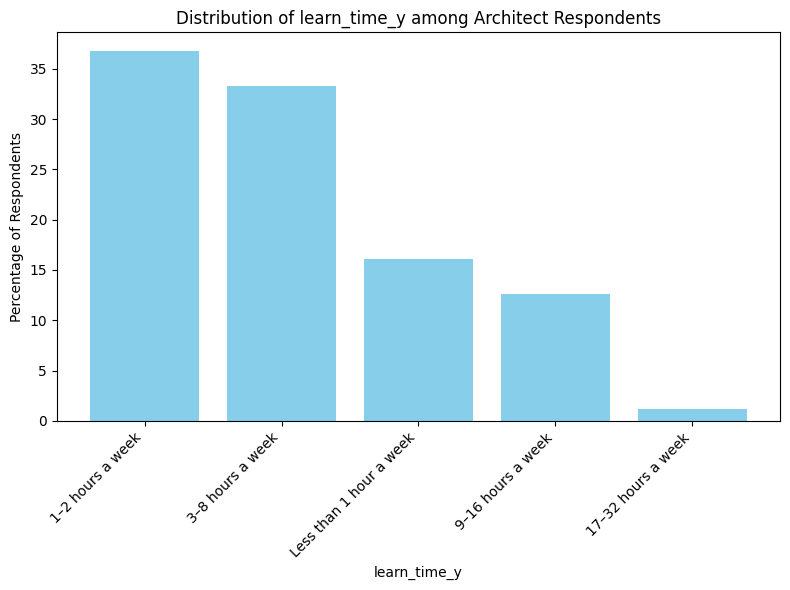


**Architect

**lifestyle_sleep_y 비율 (데이터프레임)**


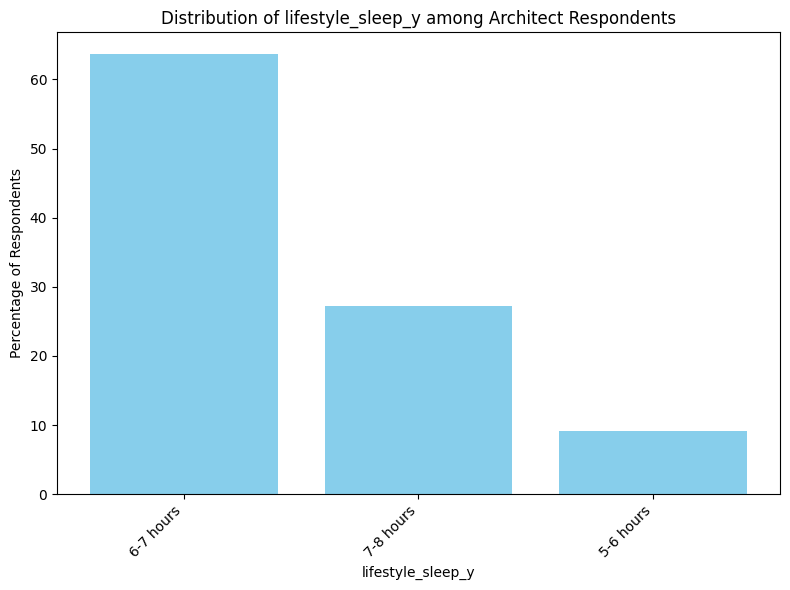


**Architect

**job_code_y 비율 (데이터프레임)**


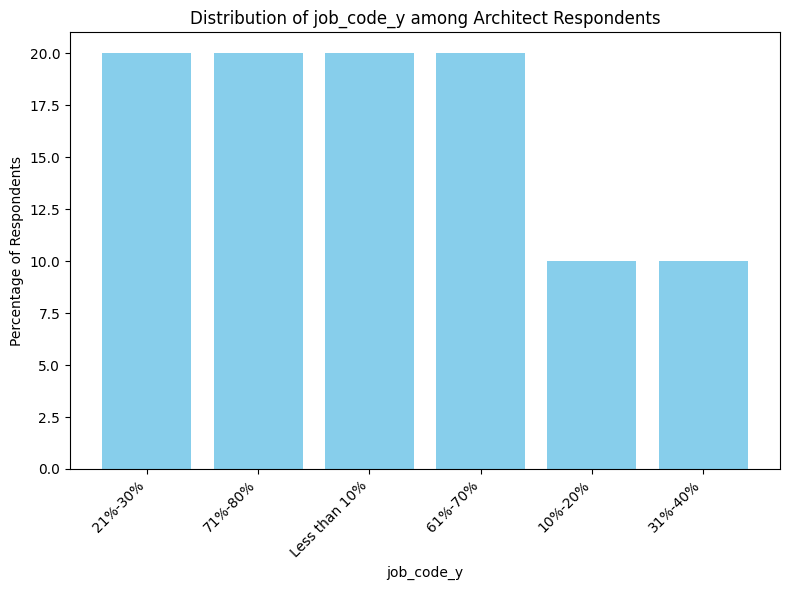


**Architect

**job_productive 비율 (데이터프레임)**


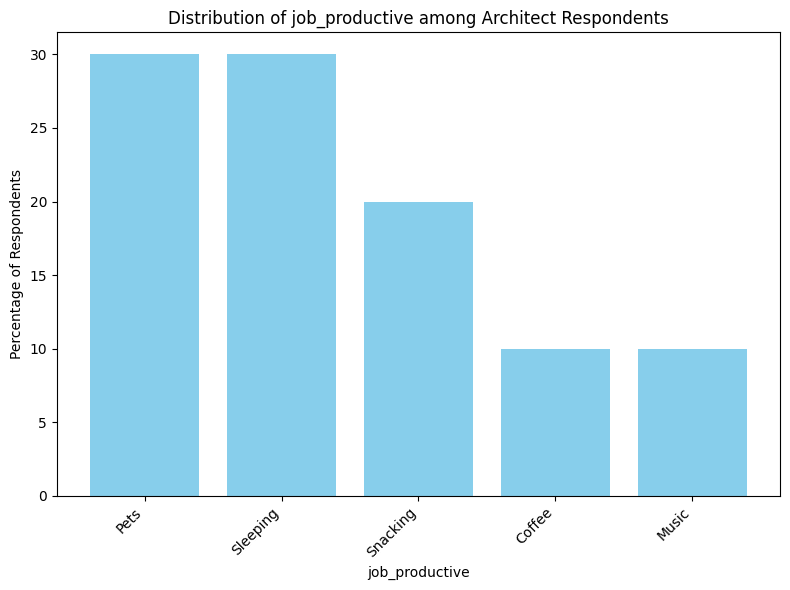


**Business Analyst

**learn_time_y 비율 (데이터프레임)**


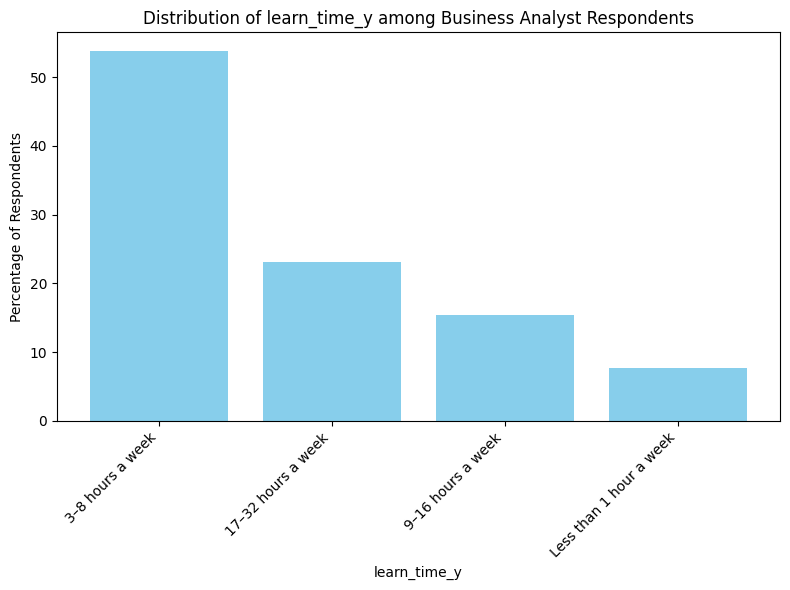


**Business Analyst

**lifestyle_sleep_y 비율 (데이터프레임)**


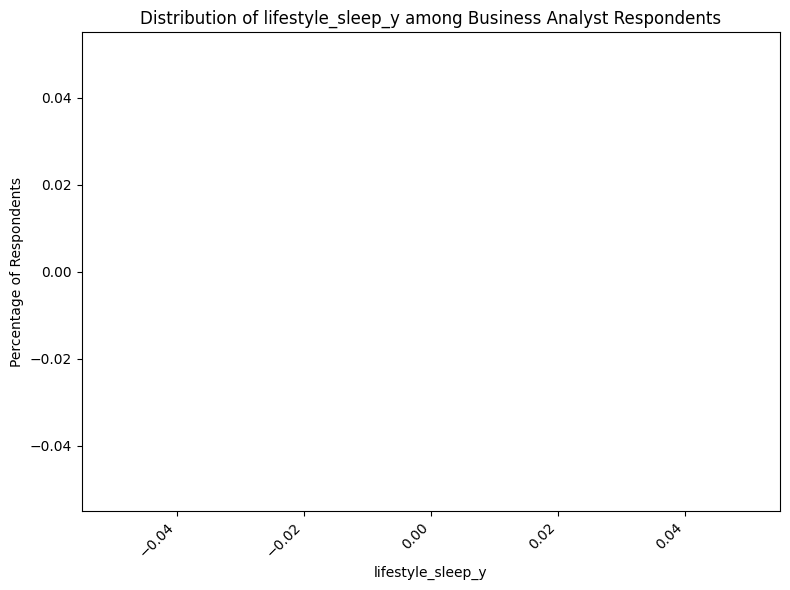


**Business Analyst

**job_code_y 비율 (데이터프레임)**


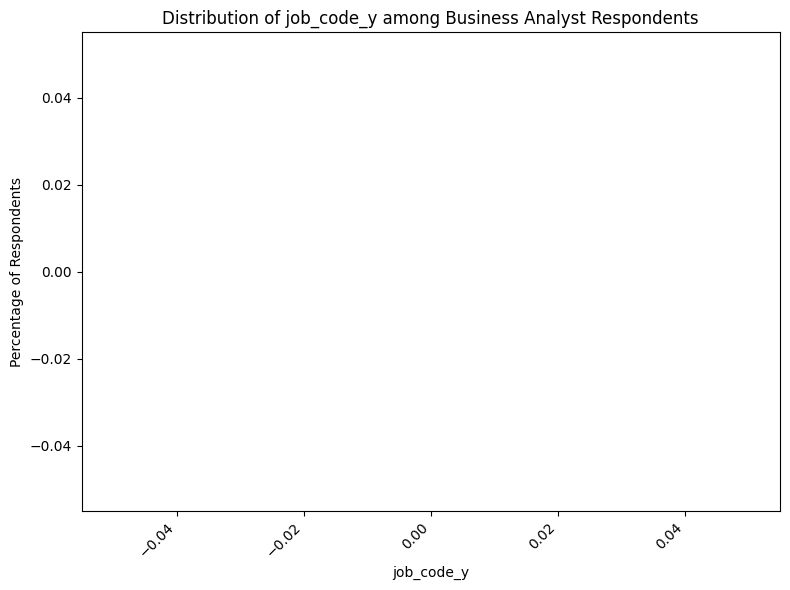


**Business Analyst

**job_productive 비율 (데이터프레임)**


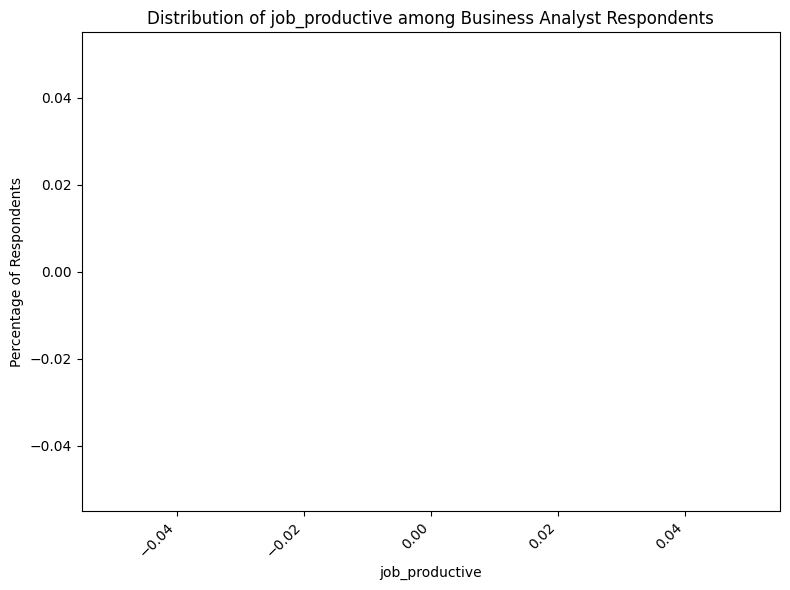


**CIO / CEO / CTO

**learn_time_y 비율 (데이터프레임)**


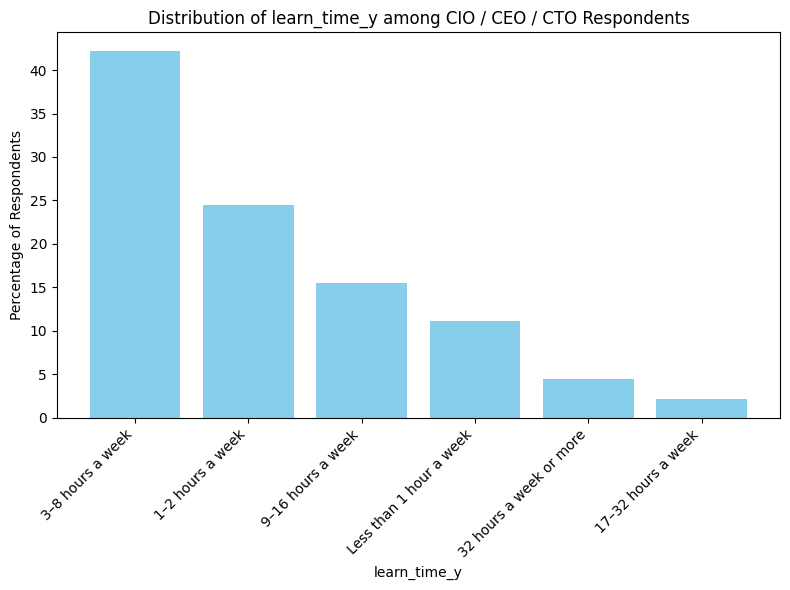


**CIO / CEO / CTO

**lifestyle_sleep_y 비율 (데이터프레임)**


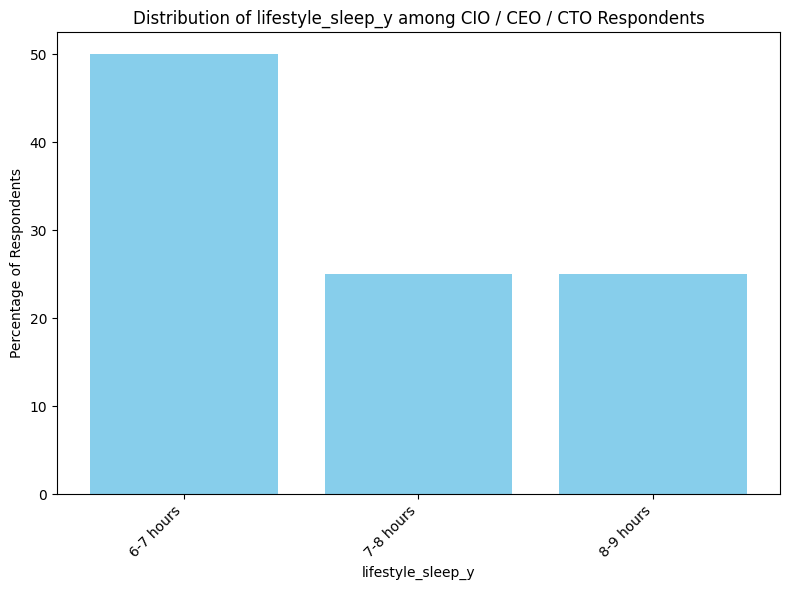


**CIO / CEO / CTO

**job_code_y 비율 (데이터프레임)**


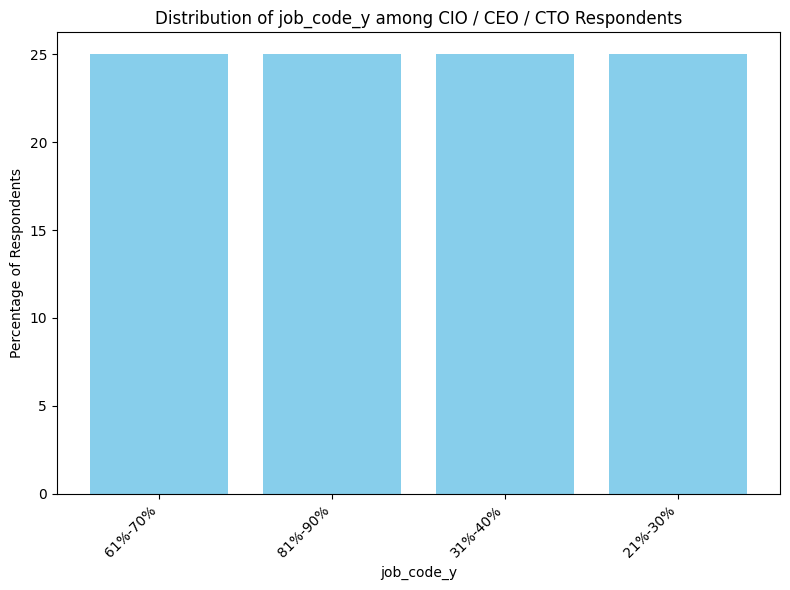


**CIO / CEO / CTO

**job_productive 비율 (데이터프레임)**


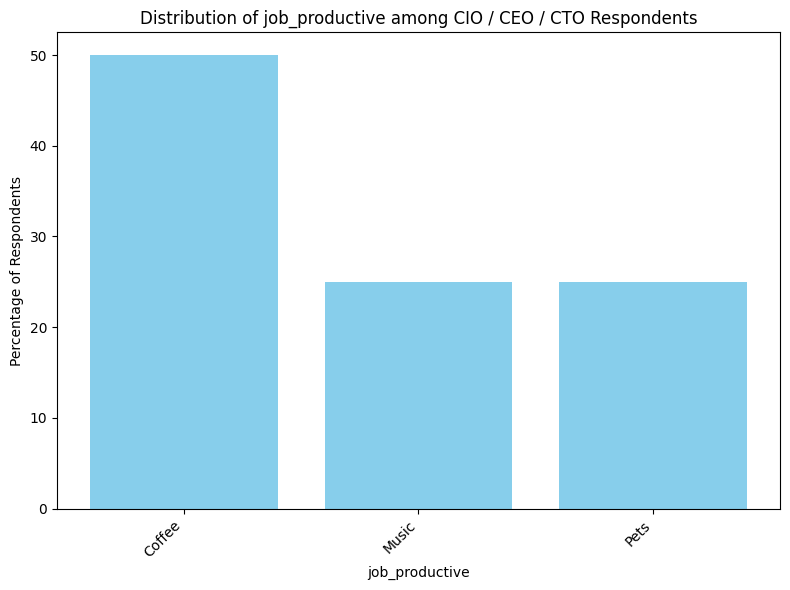


**DBA

**learn_time_y 비율 (데이터프레임)**


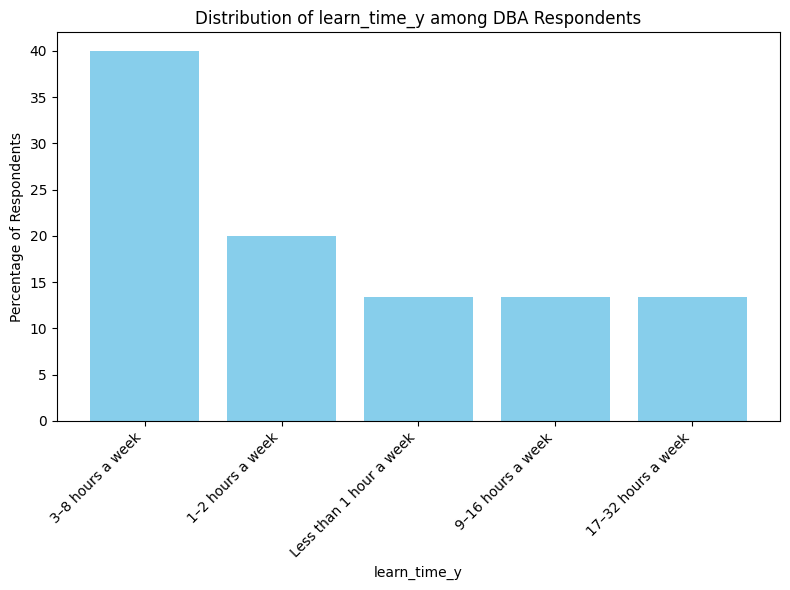


**DBA

**lifestyle_sleep_y 비율 (데이터프레임)**


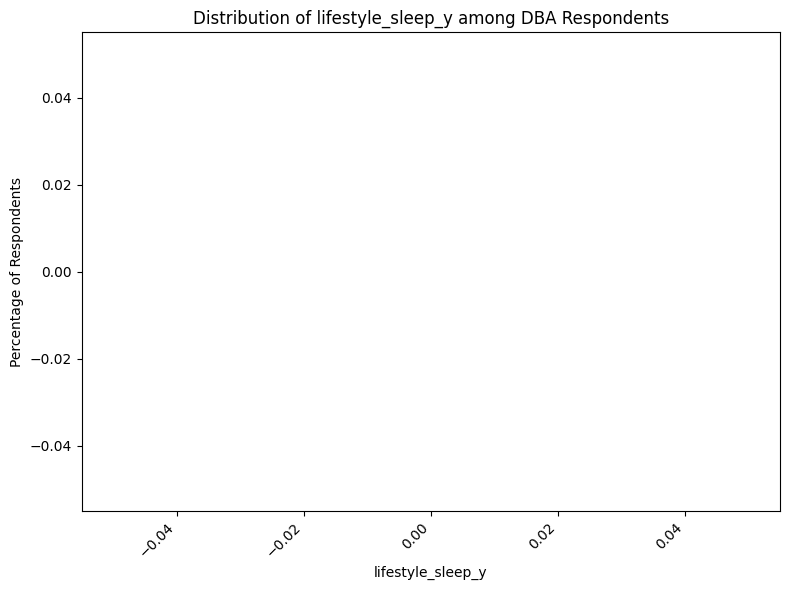


**DBA

**job_code_y 비율 (데이터프레임)**


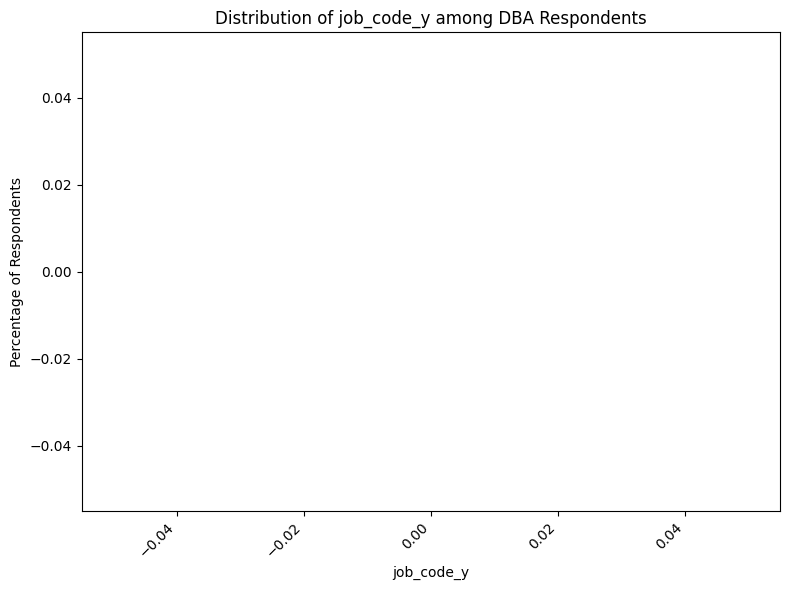


**DBA

**job_productive 비율 (데이터프레임)**


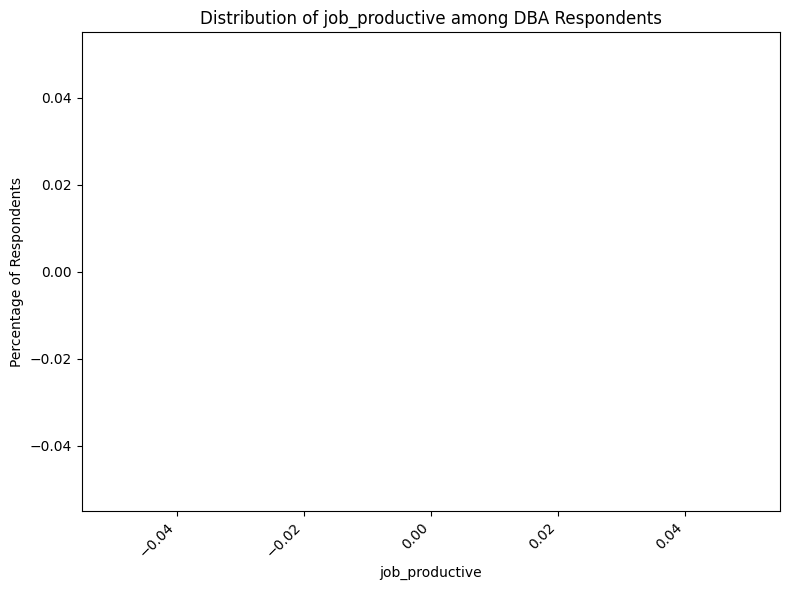


**Data Analyst / Data Engineer/ Data Scientist

**learn_time_y 비율 (데이터프레임)**


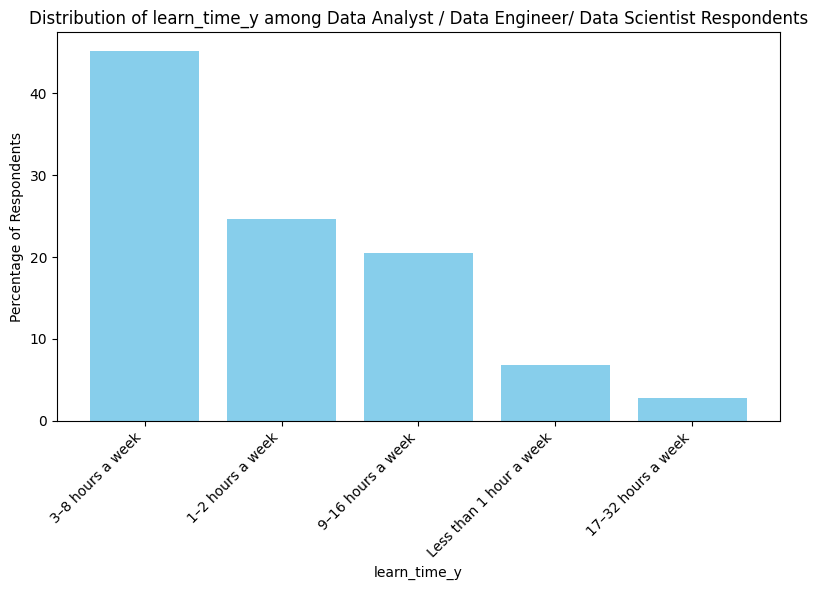


**Data Analyst / Data Engineer/ Data Scientist

**lifestyle_sleep_y 비율 (데이터프레임)**


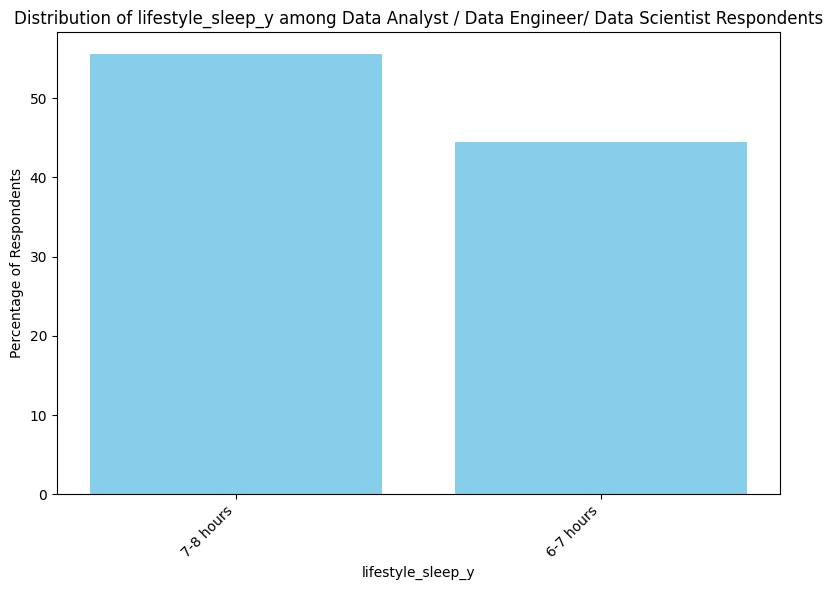


**Data Analyst / Data Engineer/ Data Scientist

**job_code_y 비율 (데이터프레임)**


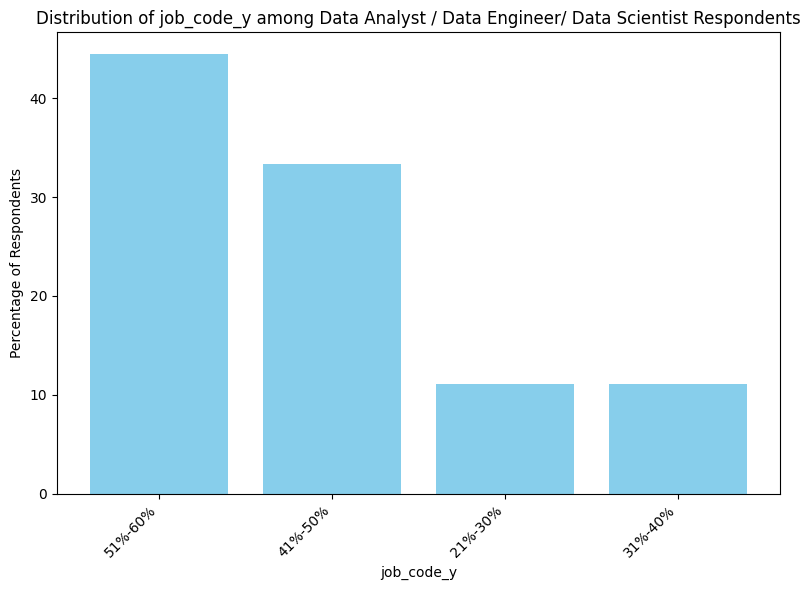


**Data Analyst / Data Engineer/ Data Scientist

**job_productive 비율 (데이터프레임)**


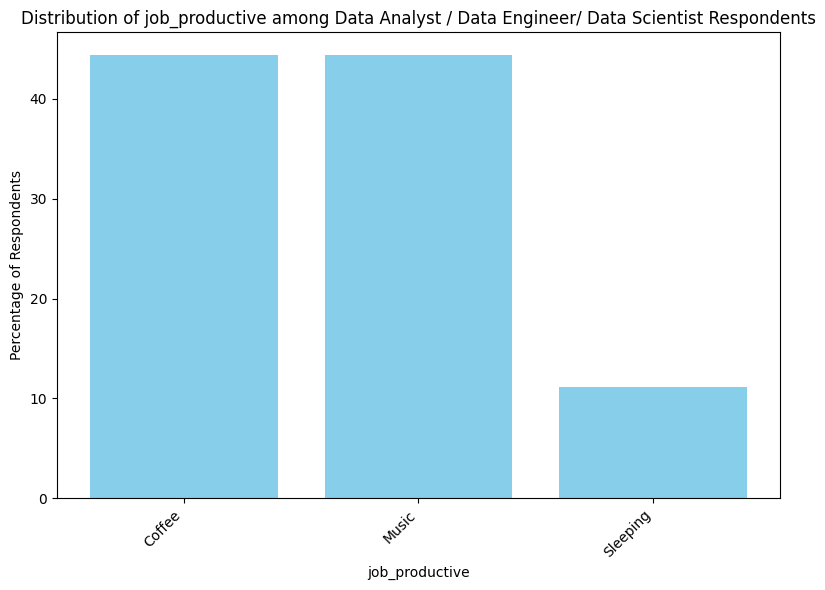


**DevOps Engineer / Infrastructure Developer

**learn_time_y 비율 (데이터프레임)**


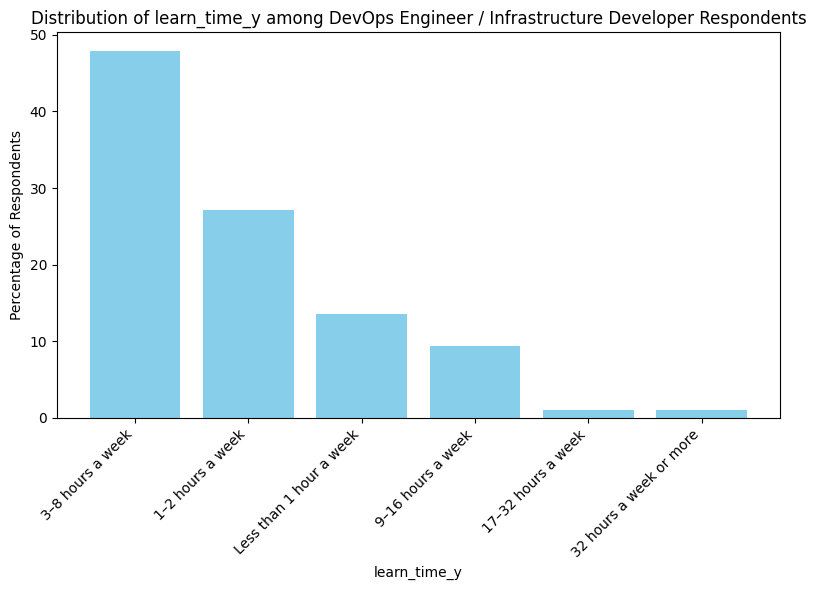


**DevOps Engineer / Infrastructure Developer

**lifestyle_sleep_y 비율 (데이터프레임)**


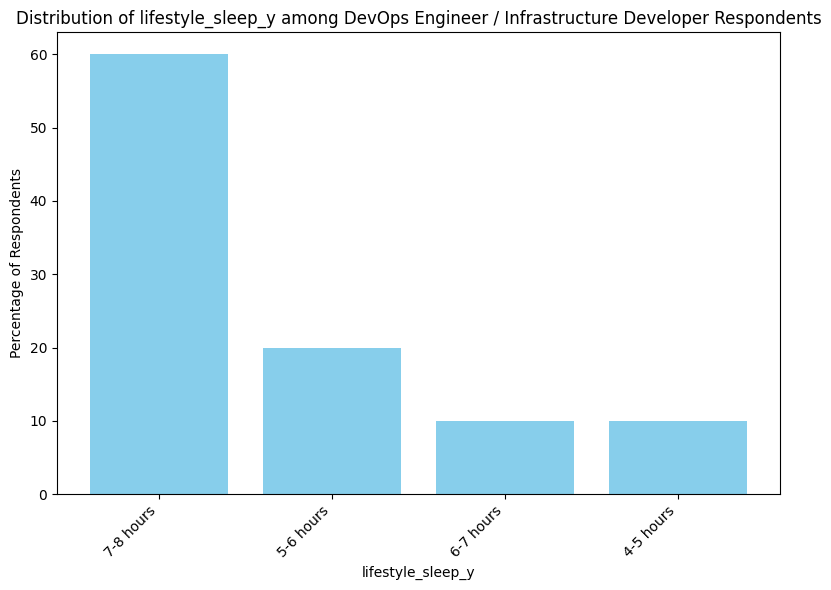


**DevOps Engineer / Infrastructure Developer

**job_code_y 비율 (데이터프레임)**


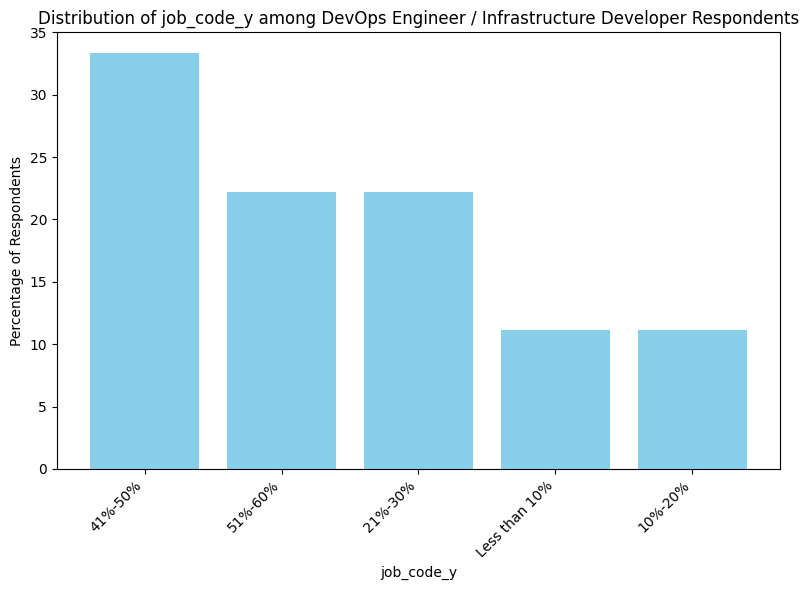


**DevOps Engineer / Infrastructure Developer

**job_productive 비율 (데이터프레임)**


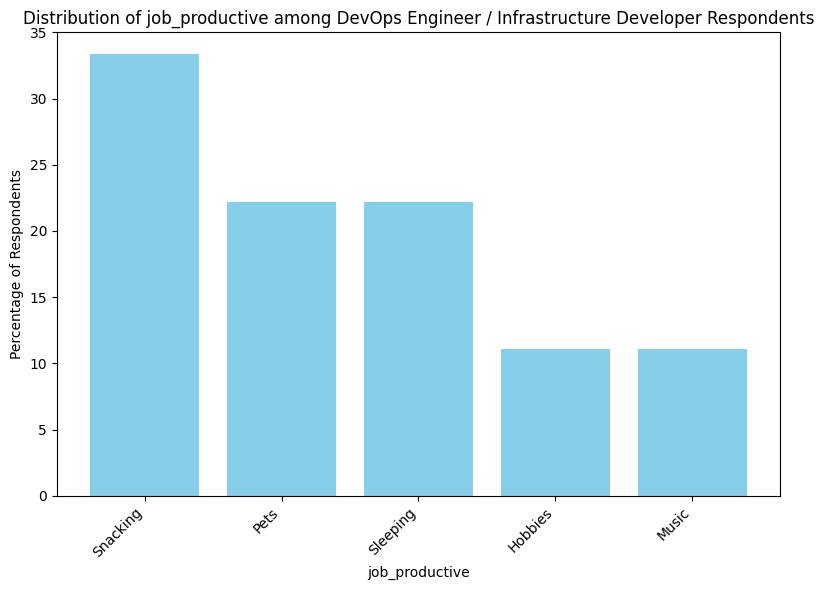


**Developer / Programmer /  Software Engineer

**learn_time_y 비율 (데이터프레임)**


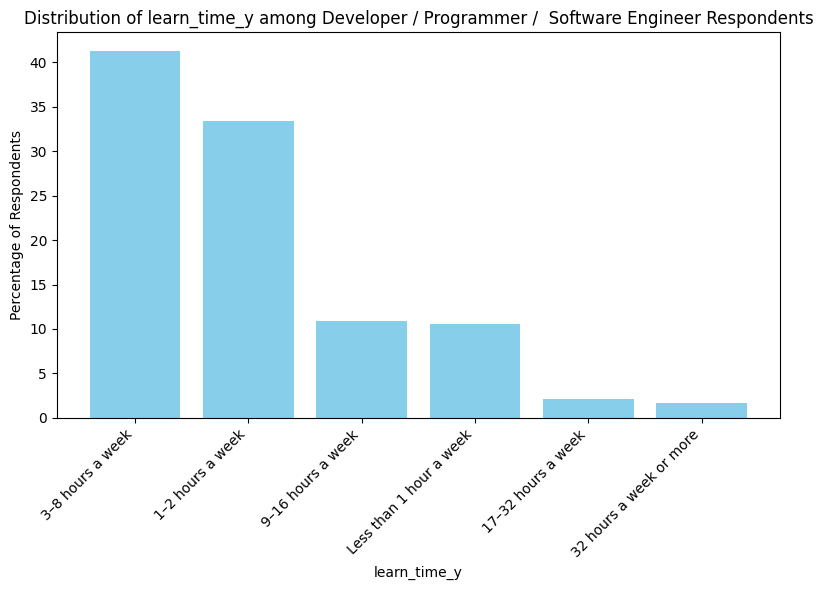


**Developer / Programmer /  Software Engineer

**lifestyle_sleep_y 비율 (데이터프레임)**


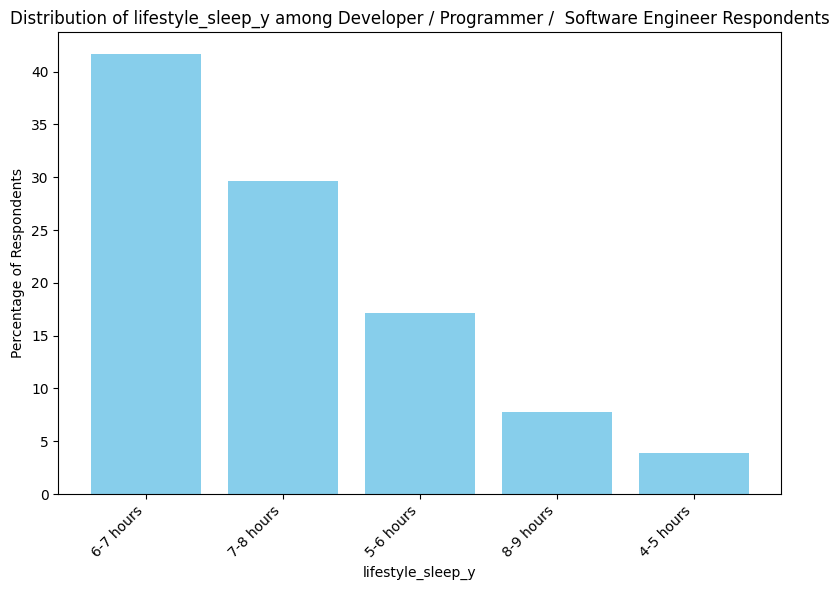


**Developer / Programmer /  Software Engineer

**job_code_y 비율 (데이터프레임)**


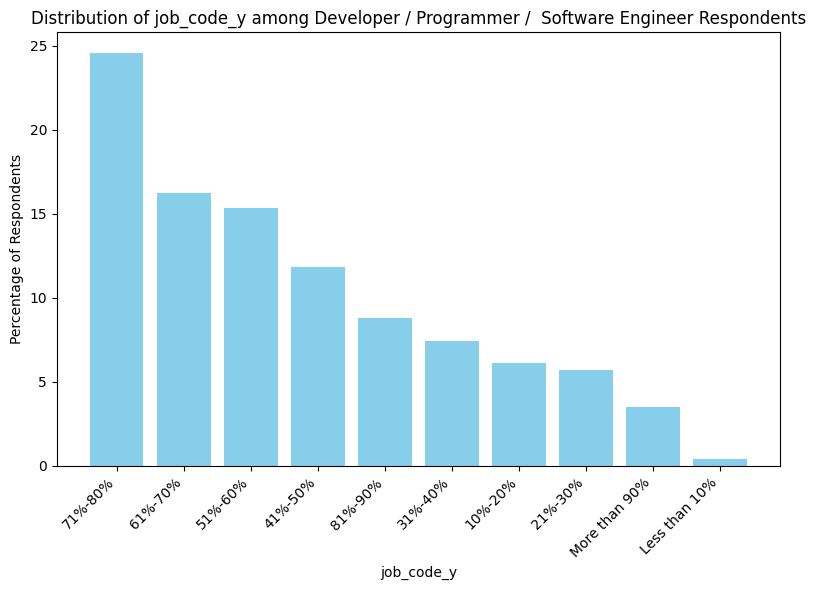


**Developer / Programmer /  Software Engineer

**job_productive 비율 (데이터프레임)**


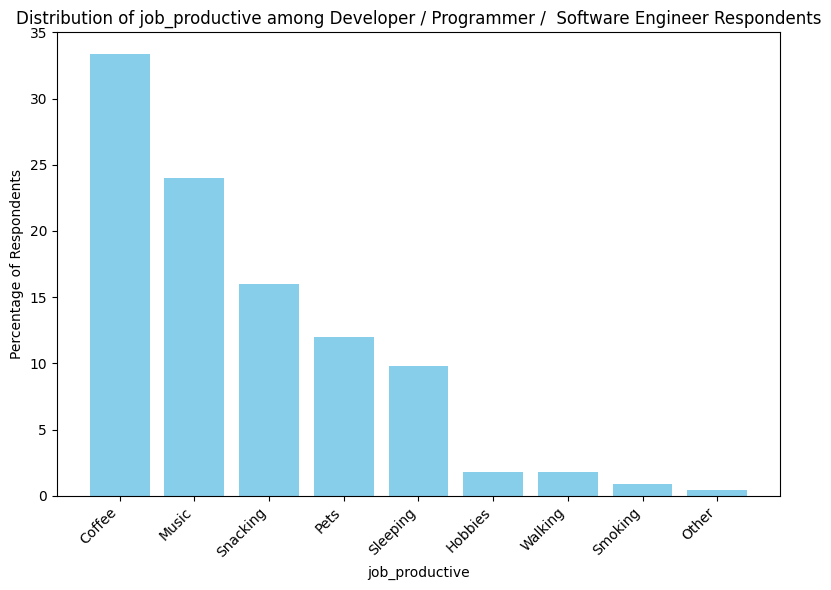


**Developer Advocate

**learn_time_y 비율 (데이터프레임)**


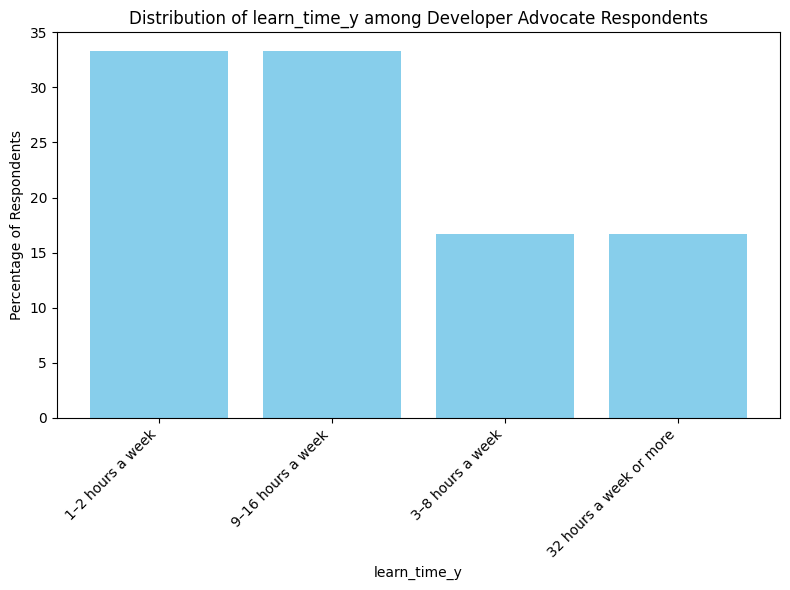


**Developer Advocate

**lifestyle_sleep_y 비율 (데이터프레임)**


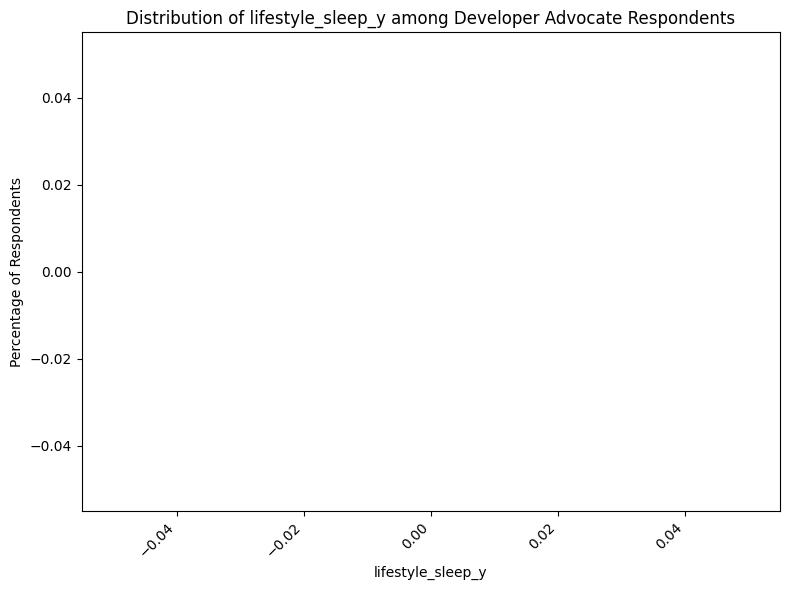


**Developer Advocate

**job_code_y 비율 (데이터프레임)**


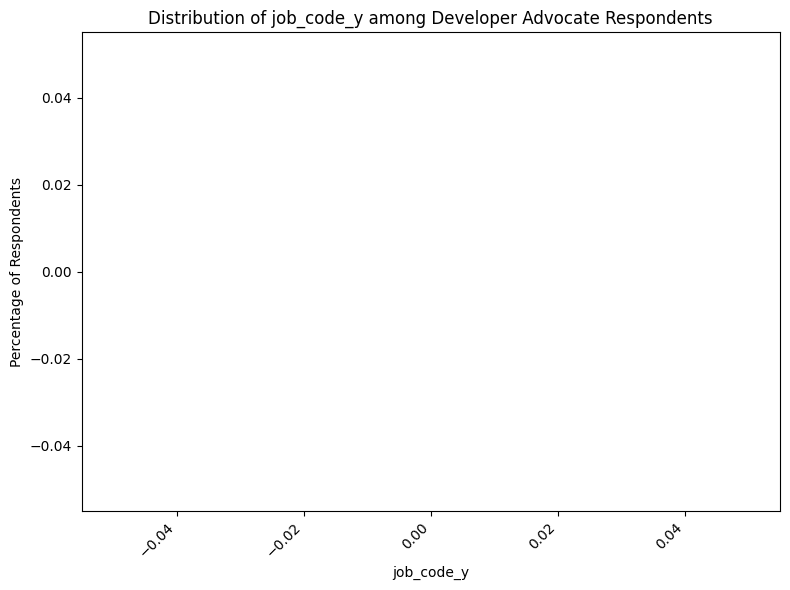


**Developer Advocate

**job_productive 비율 (데이터프레임)**


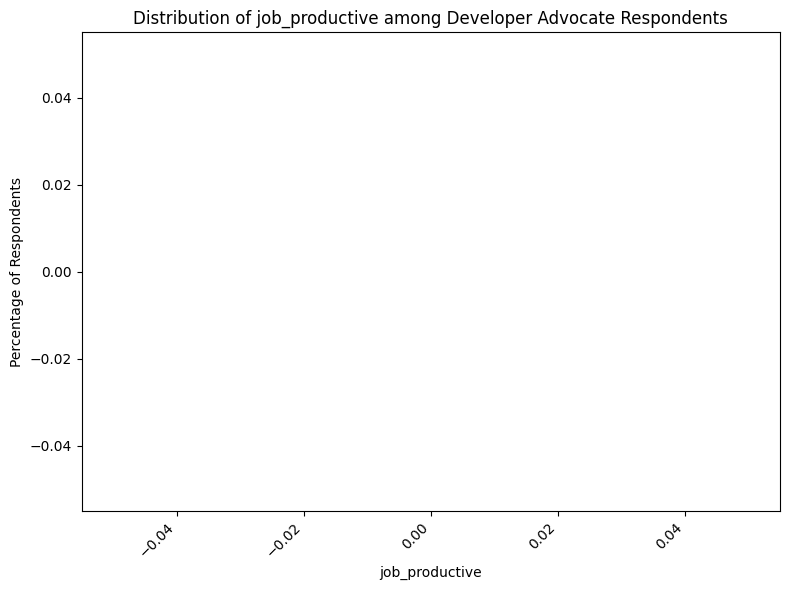


**Instructor / Teacher / Tutor

**learn_time_y 비율 (데이터프레임)**


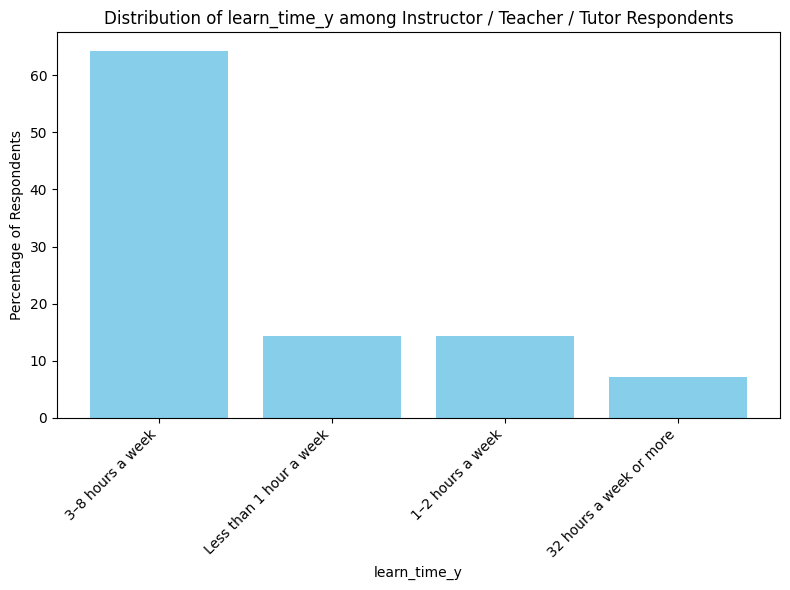


**Instructor / Teacher / Tutor

**lifestyle_sleep_y 비율 (데이터프레임)**


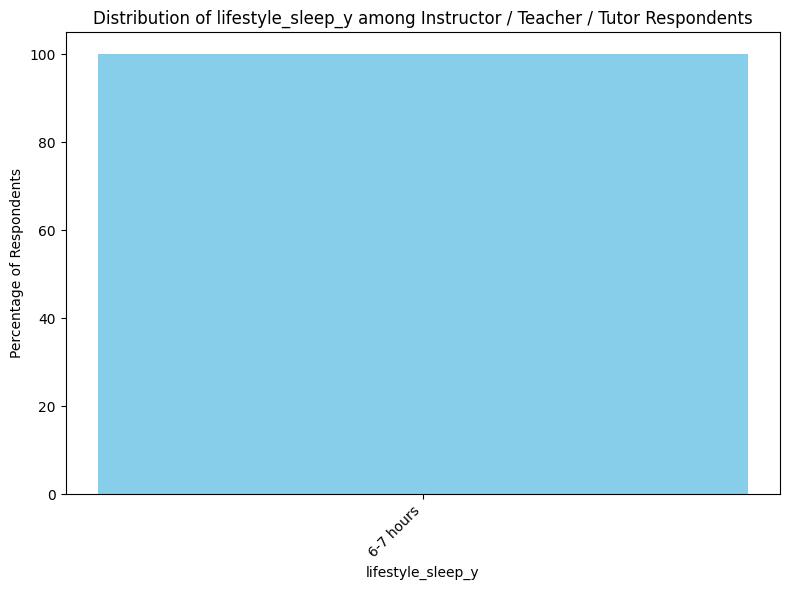


**Instructor / Teacher / Tutor

**job_code_y 비율 (데이터프레임)**


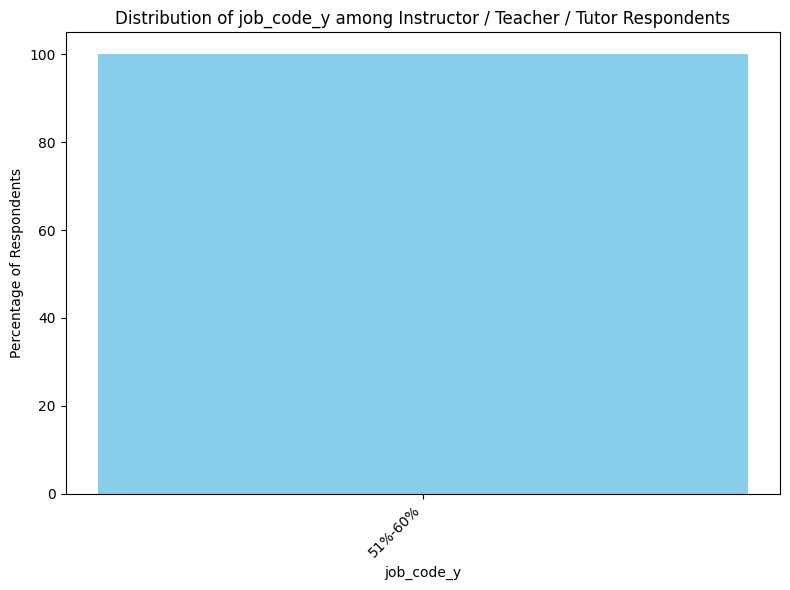


**Instructor / Teacher / Tutor

**job_productive 비율 (데이터프레임)**


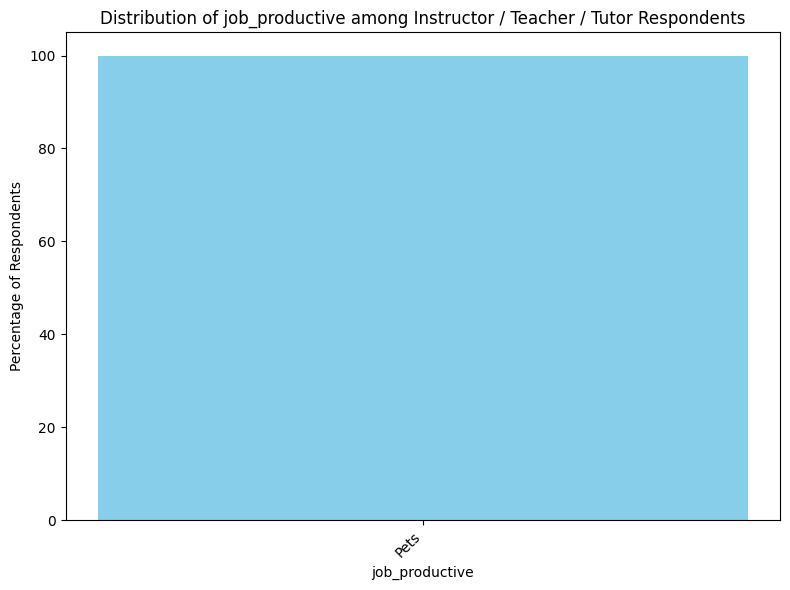


**Other

**learn_time_y 비율 (데이터프레임)**


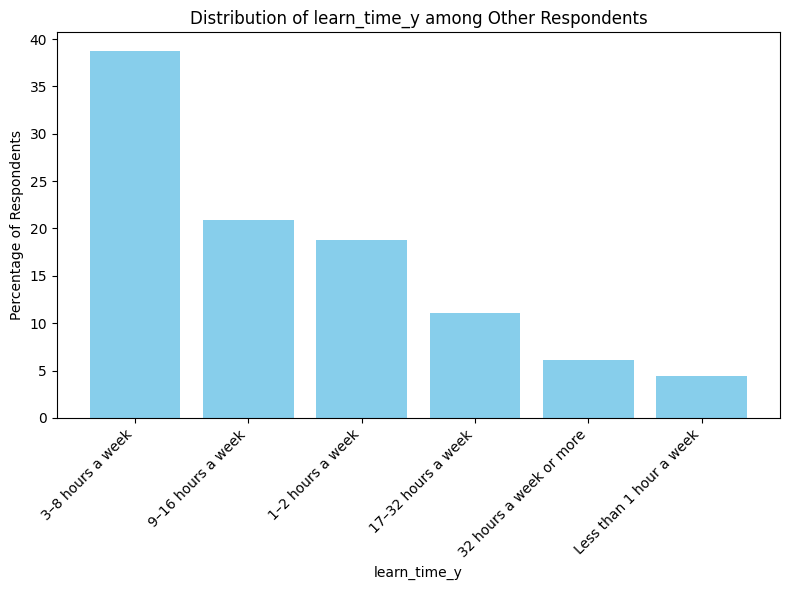


**Other

**lifestyle_sleep_y 비율 (데이터프레임)**


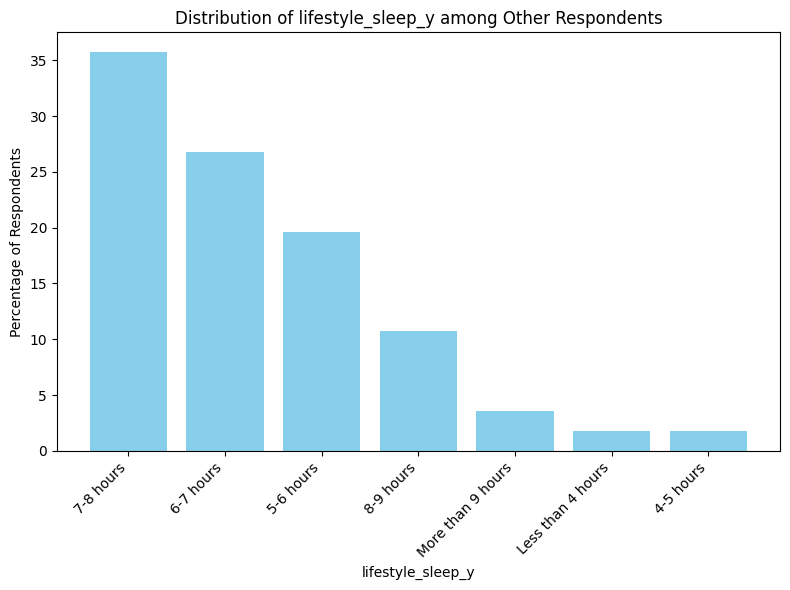


**Other

**job_code_y 비율 (데이터프레임)**


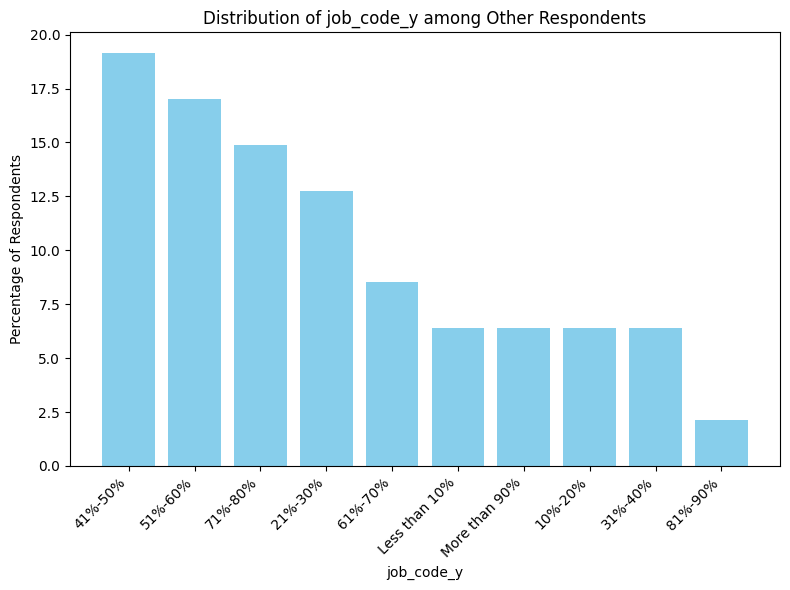


**Other

**job_productive 비율 (데이터프레임)**


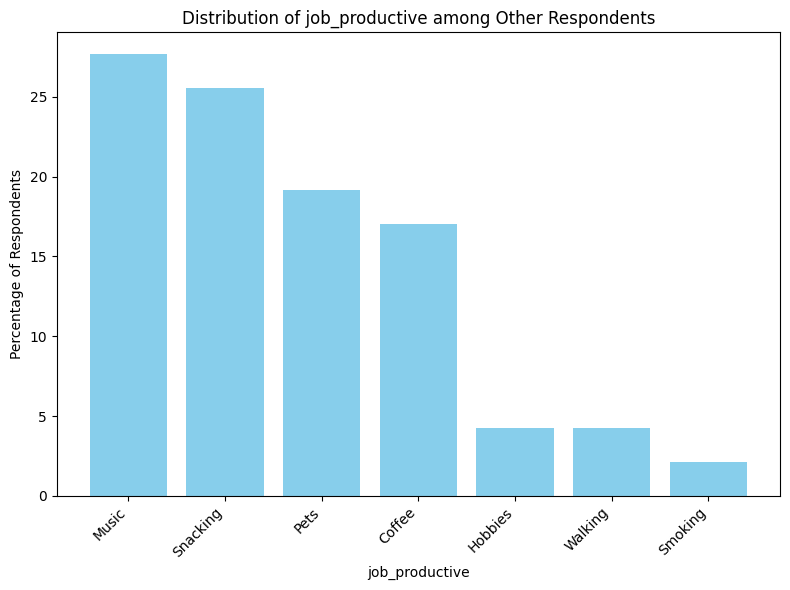


**Product Manager / Marketing Manager

**learn_time_y 비율 (데이터프레임)**


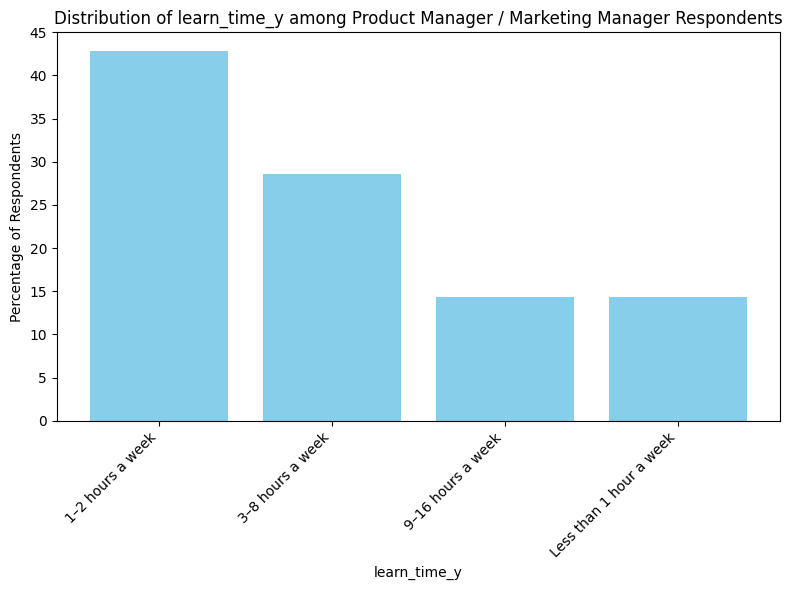


**Product Manager / Marketing Manager

**lifestyle_sleep_y 비율 (데이터프레임)**


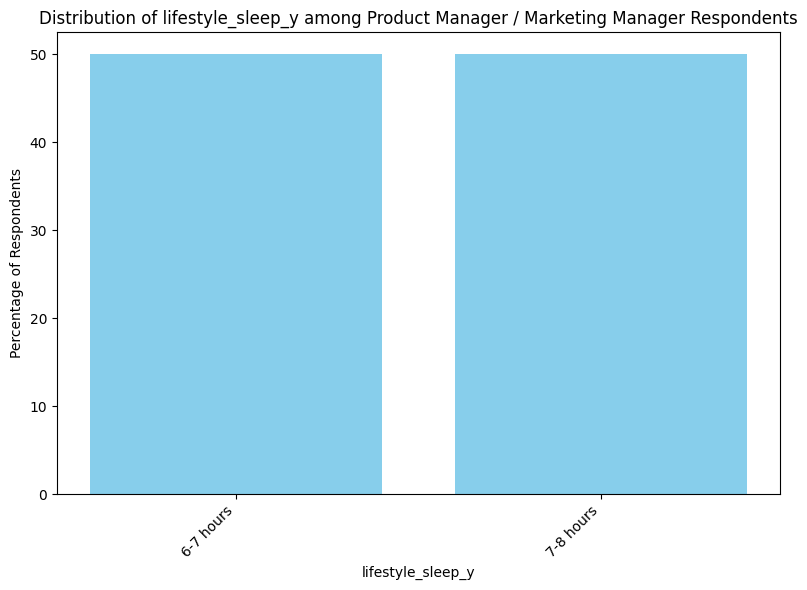


**Product Manager / Marketing Manager

**job_code_y 비율 (데이터프레임)**


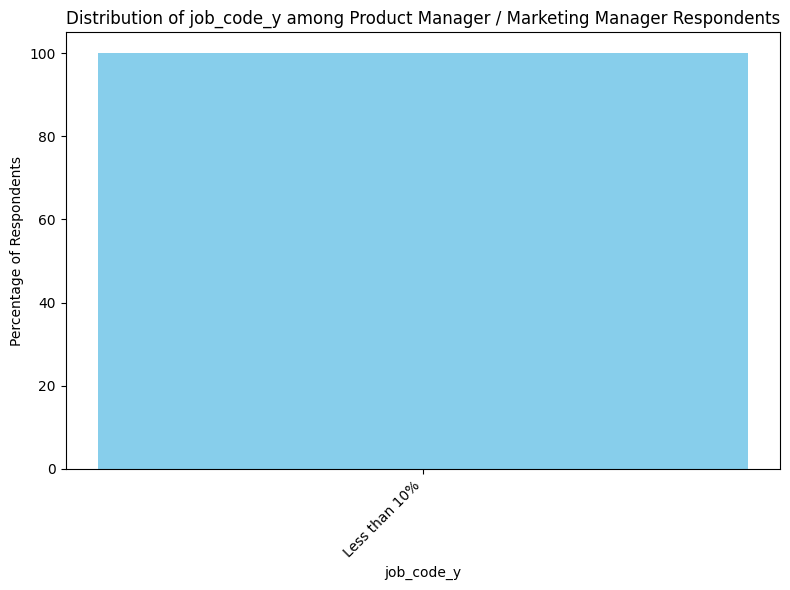


**Product Manager / Marketing Manager

**job_productive 비율 (데이터프레임)**


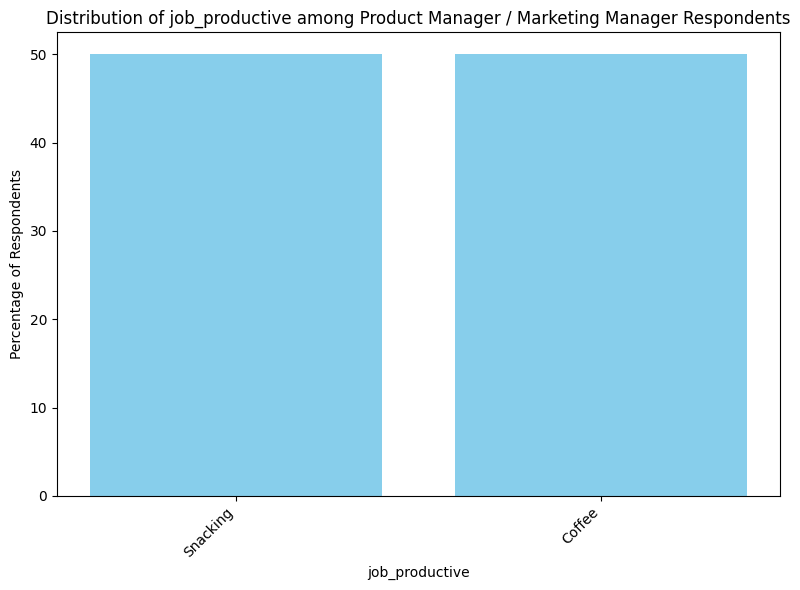


**Systems Analyst

**learn_time_y 비율 (데이터프레임)**


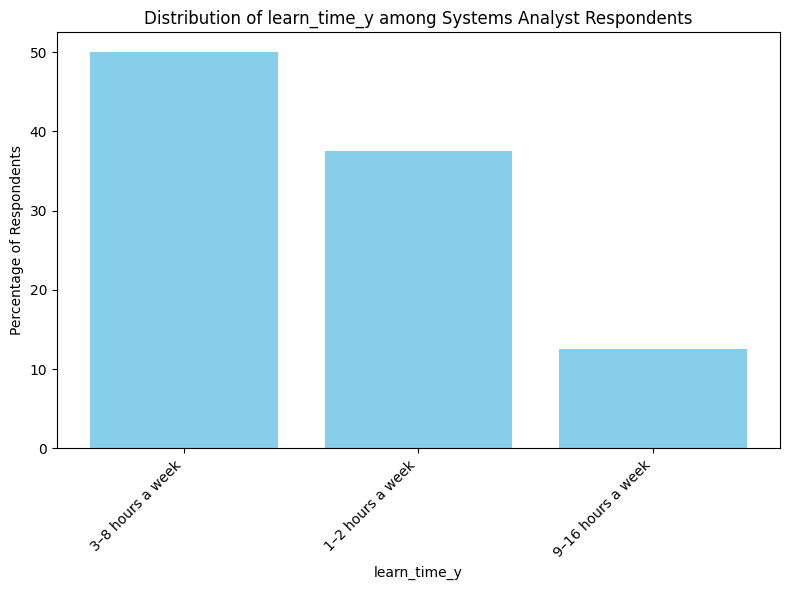


**Systems Analyst

**lifestyle_sleep_y 비율 (데이터프레임)**


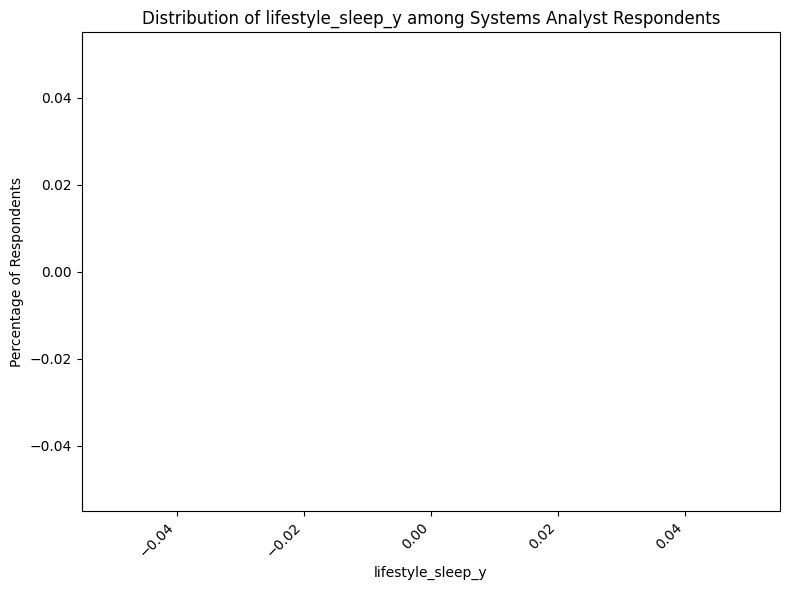


**Systems Analyst

**job_code_y 비율 (데이터프레임)**


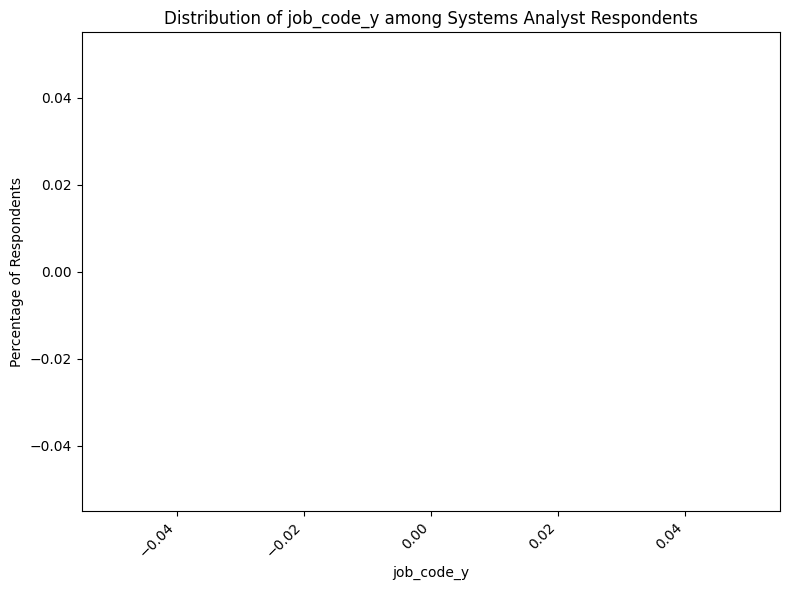


**Systems Analyst

**job_productive 비율 (데이터프레임)**


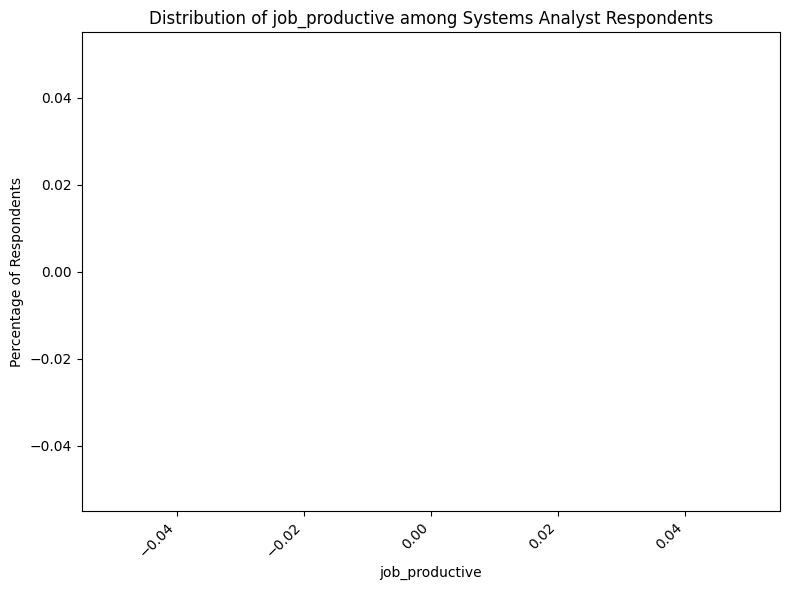


**Team Lead

**learn_time_y 비율 (데이터프레임)**


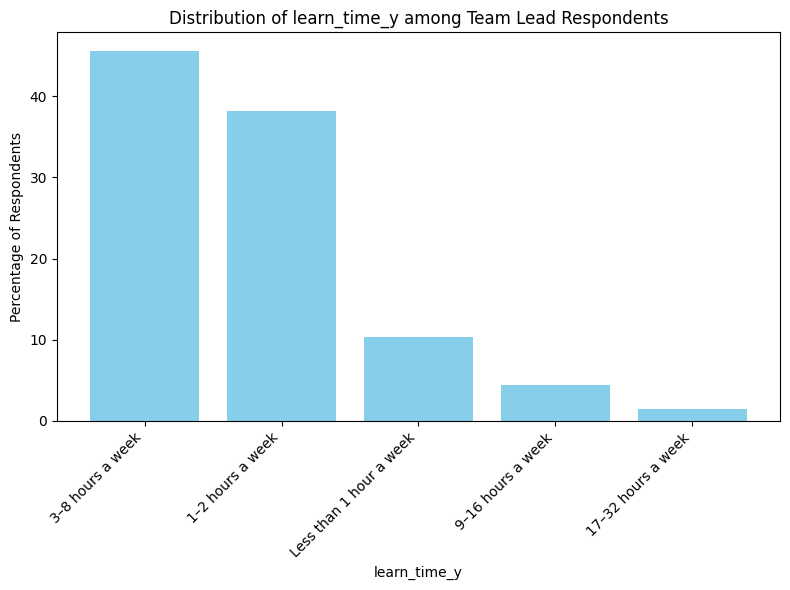


**Team Lead

**lifestyle_sleep_y 비율 (데이터프레임)**


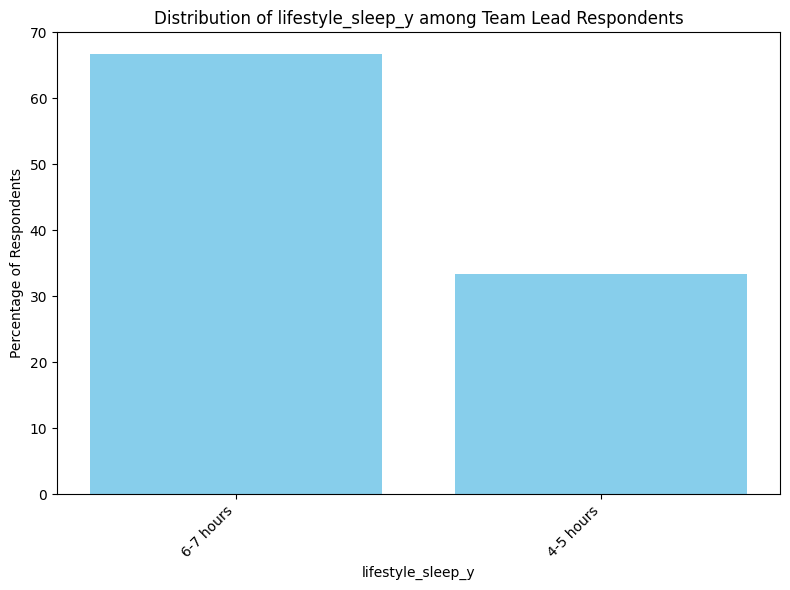


**Team Lead

**job_code_y 비율 (데이터프레임)**


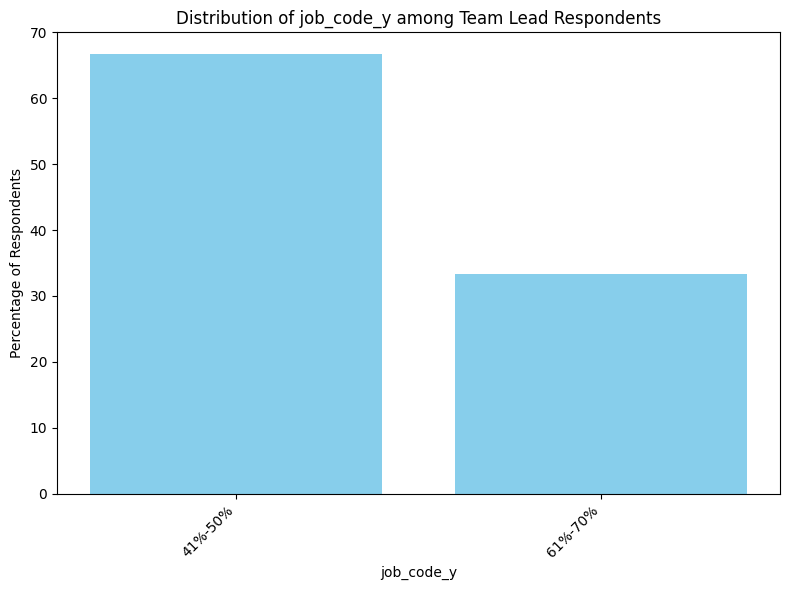


**Team Lead

**job_productive 비율 (데이터프레임)**


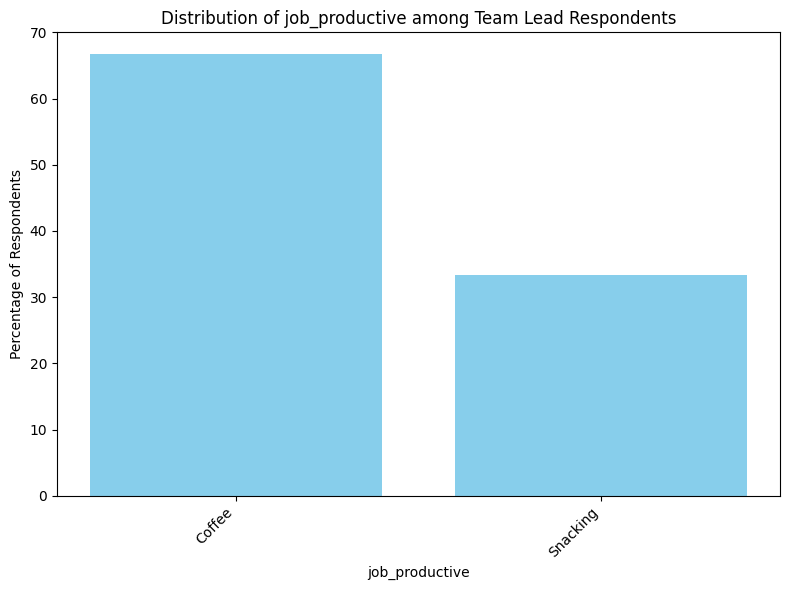


**Technical Support

**learn_time_y 비율 (데이터프레임)**


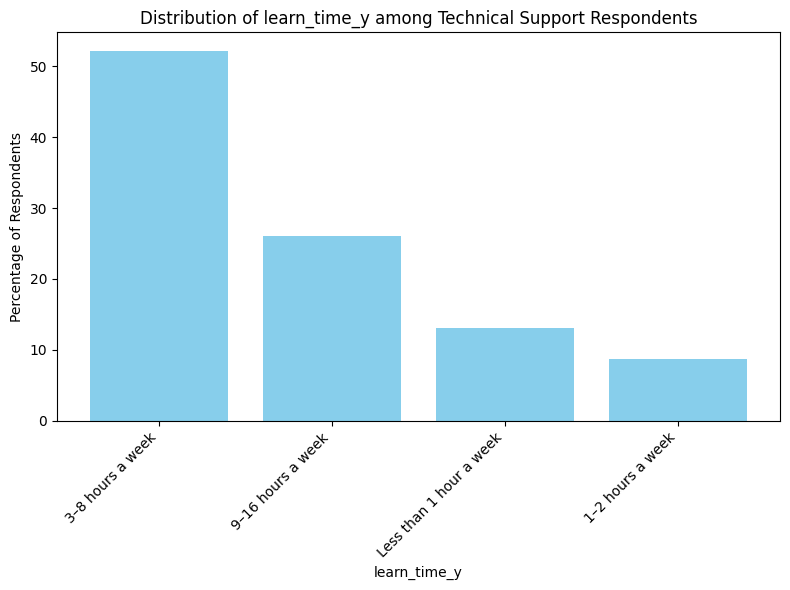


**Technical Support

**lifestyle_sleep_y 비율 (데이터프레임)**


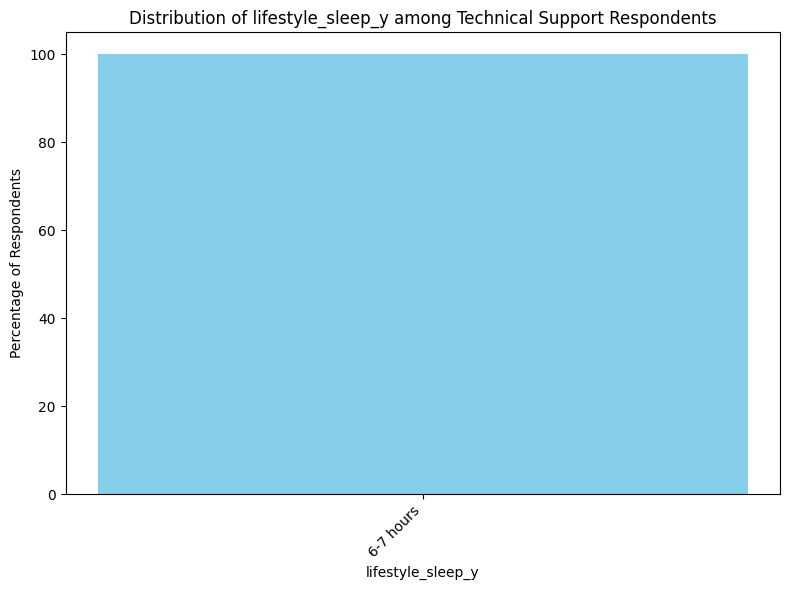


**Technical Support

**job_code_y 비율 (데이터프레임)**


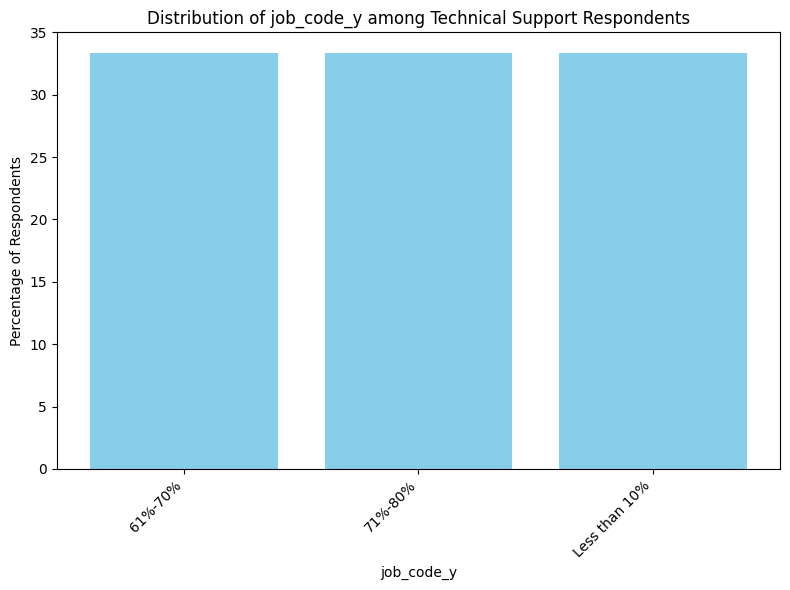


**Technical Support

**job_productive 비율 (데이터프레임)**


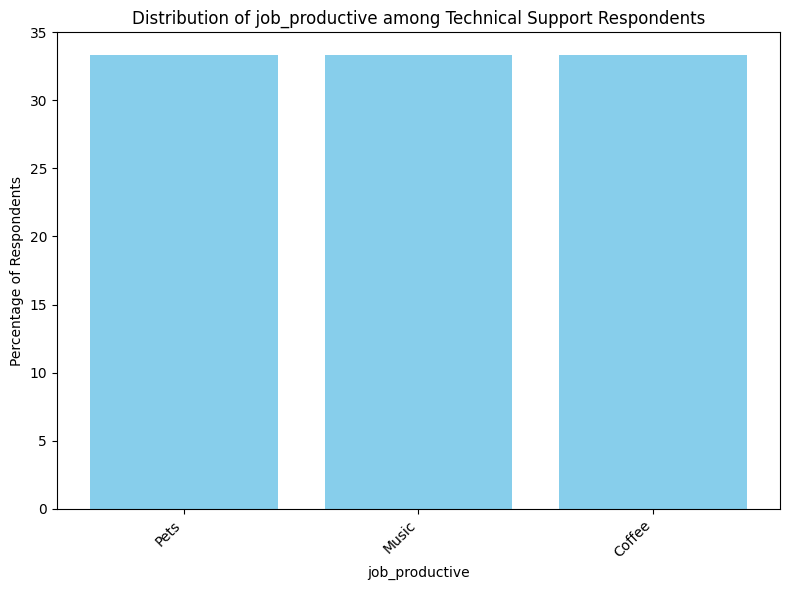


**Technical Writer

**learn_time_y 비율 (데이터프레임)**


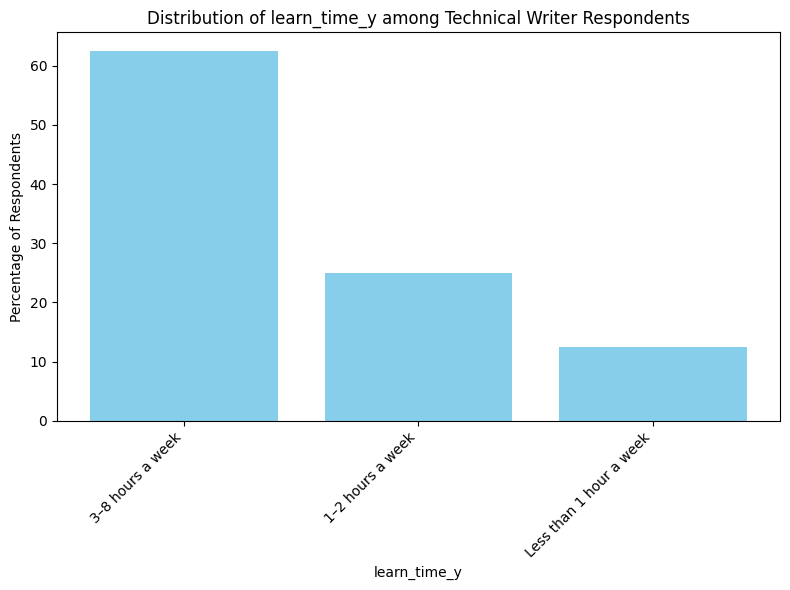


**Technical Writer

**lifestyle_sleep_y 비율 (데이터프레임)**


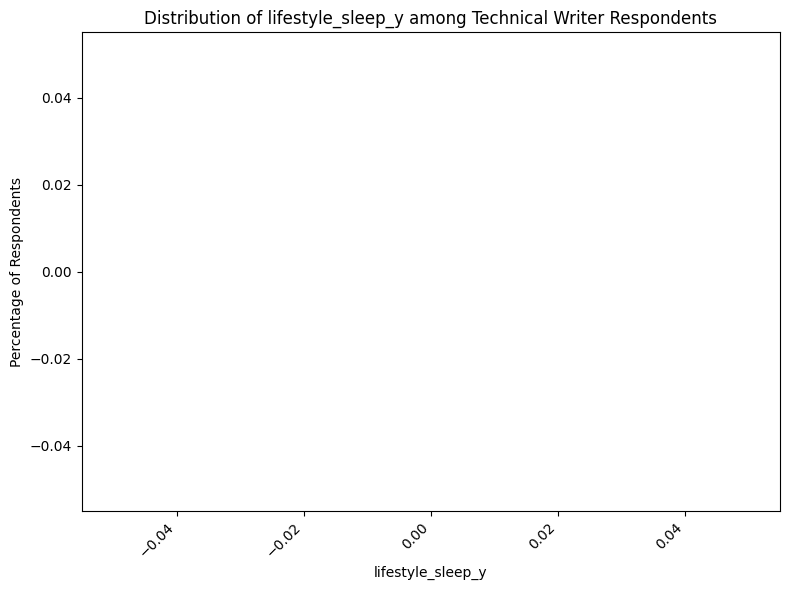


**Technical Writer

**job_code_y 비율 (데이터프레임)**


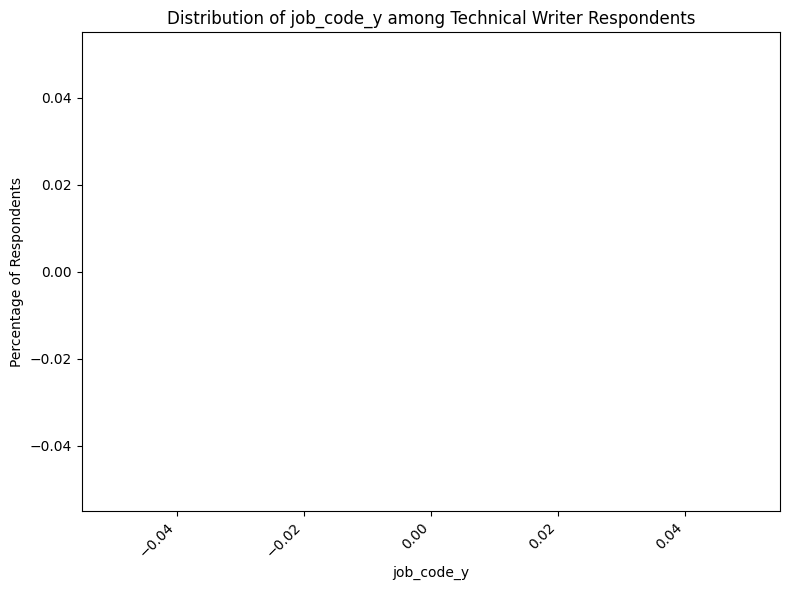


**Technical Writer

**job_productive 비율 (데이터프레임)**


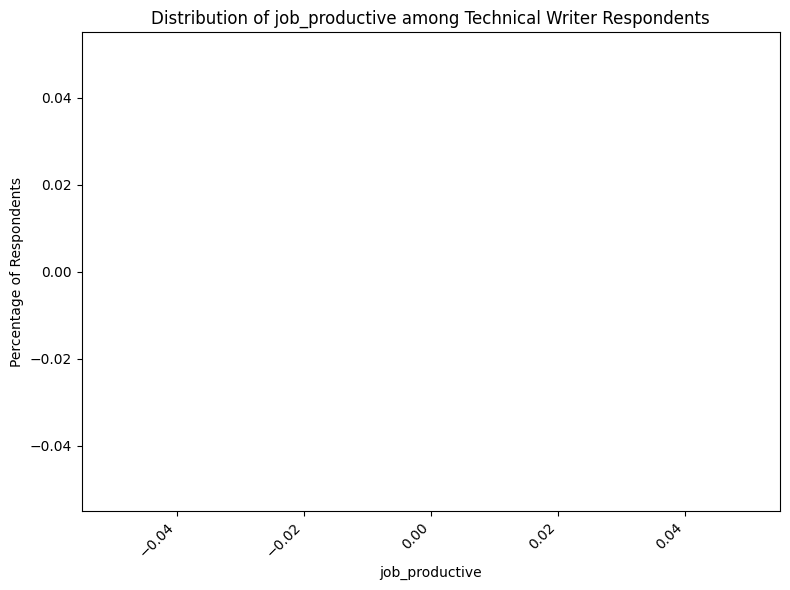


**Tester / QA Engineer

**learn_time_y 비율 (데이터프레임)**


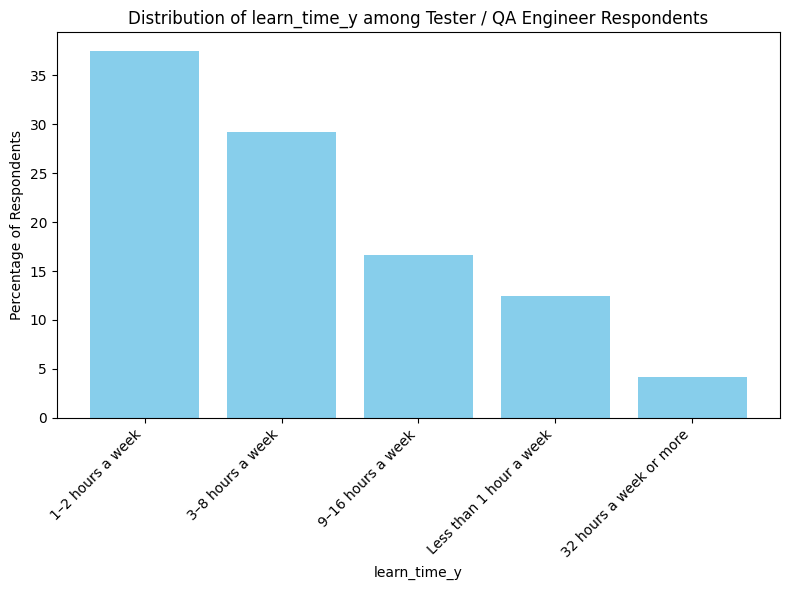


**Tester / QA Engineer

**lifestyle_sleep_y 비율 (데이터프레임)**


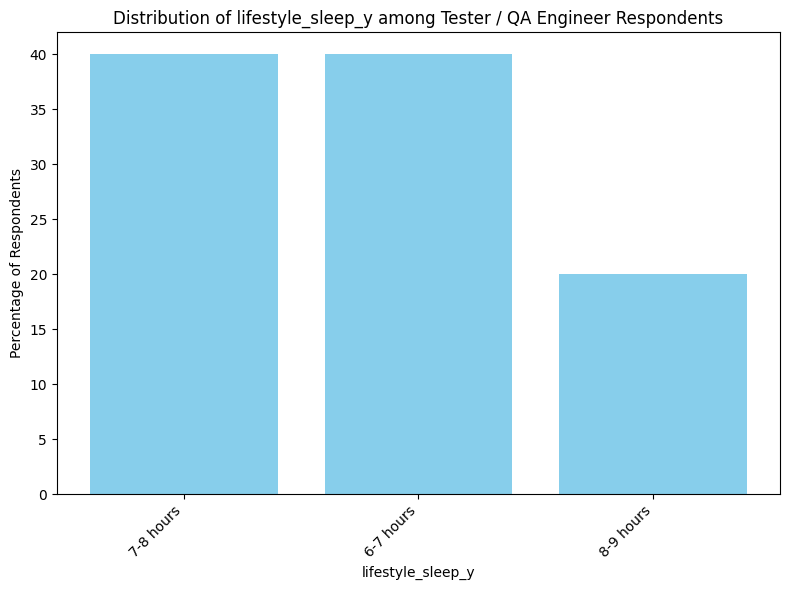


**Tester / QA Engineer

**job_code_y 비율 (데이터프레임)**


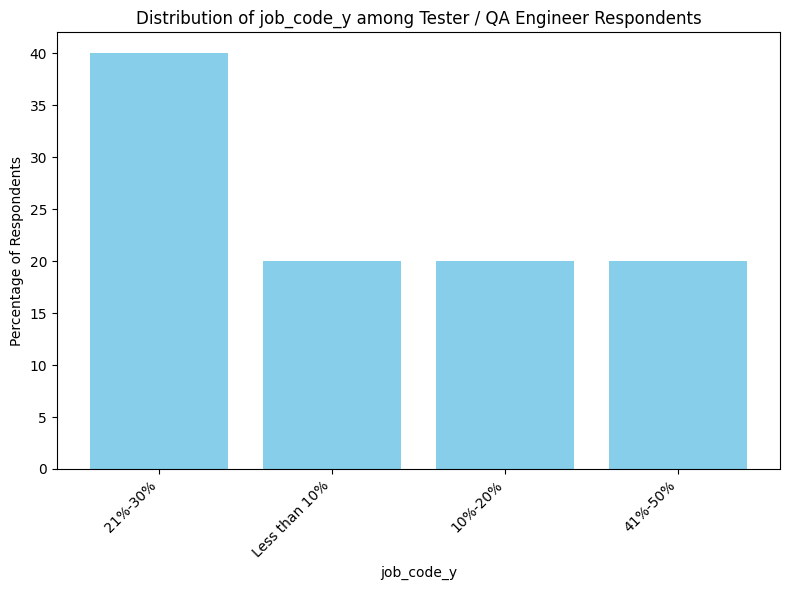


**Tester / QA Engineer

**job_productive 비율 (데이터프레임)**


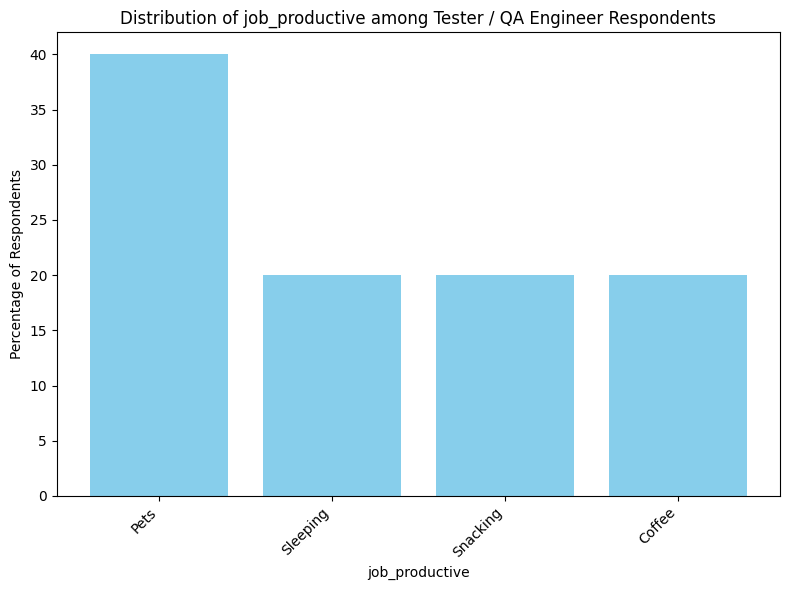


**UX / UI Designer

**learn_time_y 비율 (데이터프레임)**


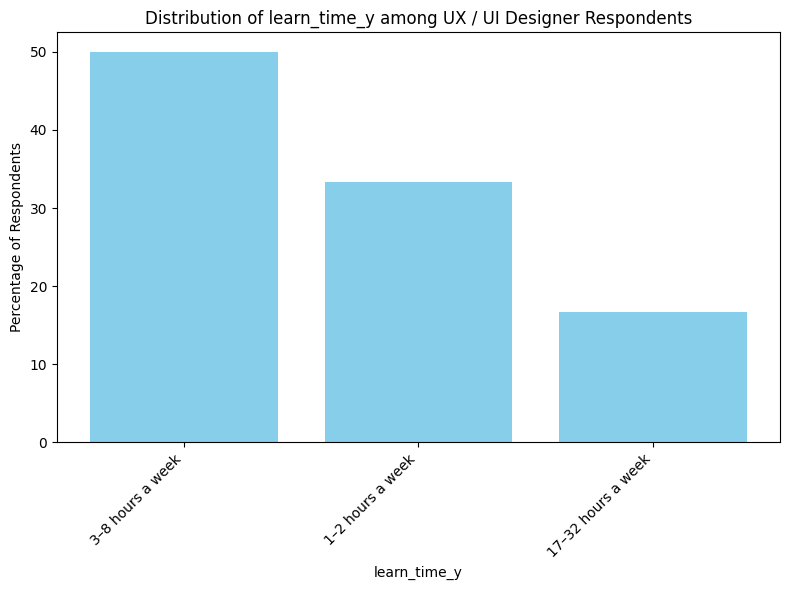


**UX / UI Designer

**lifestyle_sleep_y 비율 (데이터프레임)**


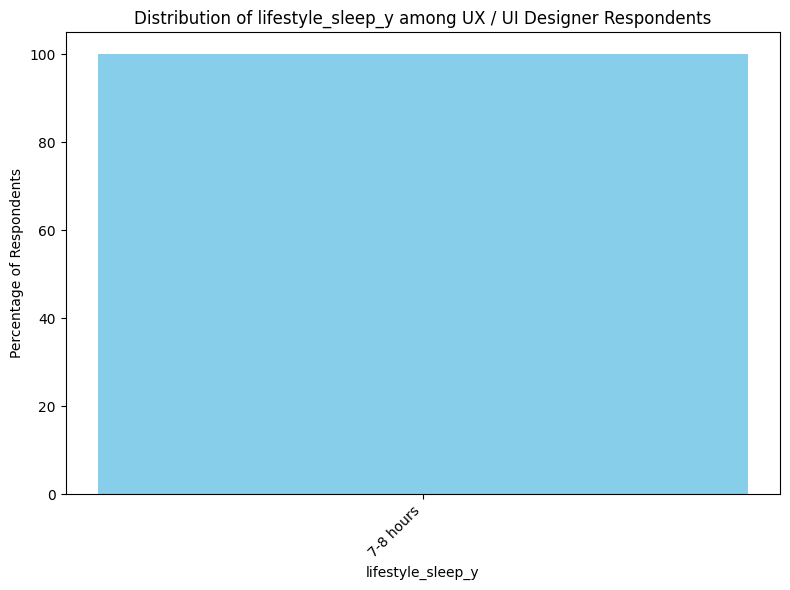


**UX / UI Designer

**job_code_y 비율 (데이터프레임)**


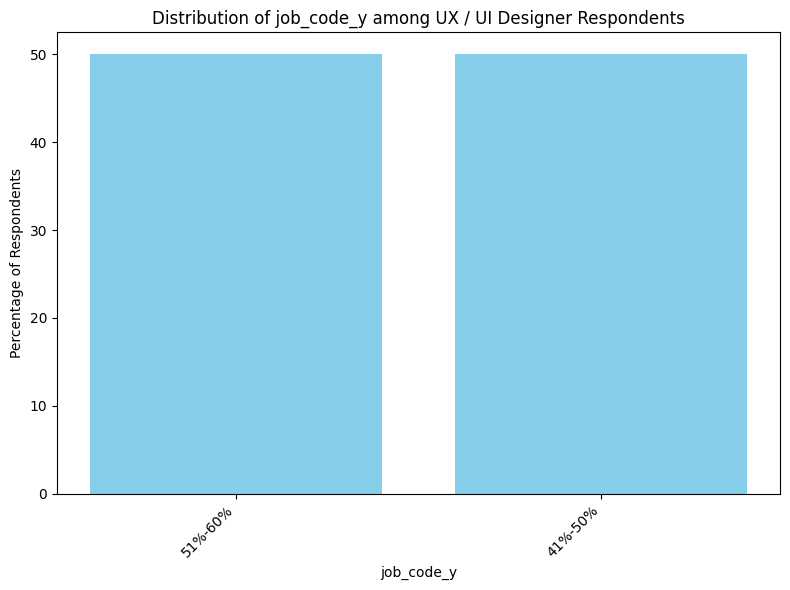


**UX / UI Designer

**job_productive 비율 (데이터프레임)**


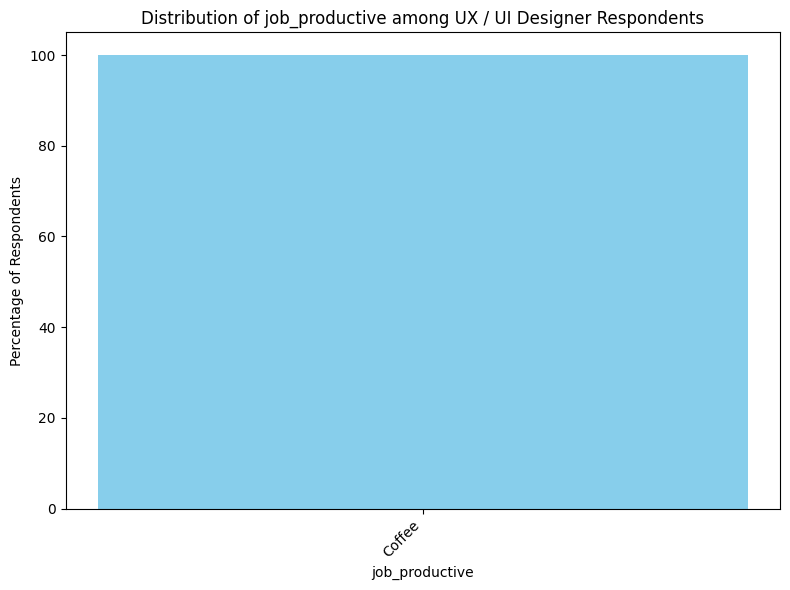

In [217]:

name_format = "{key}_{col}_percentages_df"
pattern = r"/|\s"

import re
for key, group in jetbrain_groupby_job_role_df:

    for col in ['learn_time_y', 'lifestyle_sleep_y', 'job_code_y', 'job_productive']:
        group = group[~group[col].isna()]

        group_counts = group[col].value_counts()
        group_percentages = (group_counts / group.shape[0]) * 100

        # 데이터프레임 생성 및 출력
        percentages_df = group_percentages.reset_index(name='Percentage')
        replaced_key = key.replace(" ", "_").replace("/", "_")
        replaced_key = re.sub(r"_+", "_", replaced_key)


        print(f"\n**{key}")
        print(f"\n**{col} 비율 (데이터프레임)**")
        csv_name = "../../created_csv/percentages_df/{key}_{col}_percentages_df.csv".format(key=replaced_key, col=col)
        percentages_df.to_csv(csv_name)
        # display(percentages_df)

         # Create a bar chart
        plt.figure(figsize=(8, 6))
        plt.bar(percentages_df[col], percentages_df["Percentage"], color='skyblue')
        plt.xlabel(f"{col}")
        plt.ylabel("Percentage of Respondents")
        plt.title(f"Distribution of {col} among {key} Respondents")
        plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlapping elements

        # Display the plot
        plt.show()



In [257]:
jetbrain_merged_df.to_csv("./data.csv")

In [265]:
jetbrain_merged_df.columns

Index(['response_id', 'weight', 'amazon', 'employment_status',
       'position_level', 'teaching_what', 'code_yrs', 'edu_level', 'age_range',
       'country',
       ...
       'ps_feel_statements_relaxed', 'ps_feel_statements_active',
       'ps_feel_statements_freshwoked', 'ps_feel_statements_interested',
       'primary', 'rank', 'job_code_y', 'job_productive_y', 'learn_time_y',
       'lifestyle_sleep_y'],
      dtype='object', length=625)

- edu_level
- age_range
- gender
- edu_type_of_inst
- edu_degree
- edu_major_sub
- ide_main
- edu_resources
<!-- - learn_time_x -->
- job_satisfied
<!-- - job_code_x -->
<!-- - life_sleep_x -->
- work_day_start
- lifestyle_bedtime
- main
- source
- os_devenv
- activities_kinds
- target_platforms
- sw_types_developed
- primary_proglang
- target_platforms_web_(back-end)
- target_platforms_cloud
- target_platforms_iot_/_embedded
- target_platforms_web_(front-end)
- target_platforms_server_/_infrastructure
- target_platforms_consoles_(xbox_/_playstation_/_nintendo_etc
- sw_developed_types_augmented_reality_/_virtual_reality
- sw_developed_types_business_intelligence_/_data_science_/_machine_learning
- sw_developed_types_blockchain
- sw_developed_types_database_/_data_storage
- sw_developed_types_games
- sw_developed_types_it_infrastructure
- db
- test_types
- regularly_tools
- communication_tools
- ides
- sql_tool
- sectors_it
- kind_of_dev
- lifestyle_hobbies
- job_important
- primary
- job_code_y
- job_productive_y
- learn_time_y
- lifestyle_sleep_y

In [280]:
parsed_col_list = ['edu_level',
'age_range',
'gender',
'edu_type_of_inst',
'edu_degree',
'edu_major_sub',
'ide_main',
'edu_resources',
'job_satisfied',
'work_day_start',
'lifestyle_bedtime',
'main',
'source',
'job_role',
'os_devenv',
'activities_kinds',
'target_platforms',
'sw_types_developed',
'primary_proglang',
'target_platforms_web_(back-end)',
'target_platforms_cloud',
'target_platforms_iot_/_embedded',
'target_platforms_web_(front-end)',
'target_platforms_server_/_infrastructure',
'target_platforms_consoles_(xbox_/_playstation_/_nintendo_etc',
'sw_developed_types_augmented_reality_/_virtual_reality',
'sw_developed_types_business_intelligence_/_data_science_/_machine_learning',
'sw_developed_types_blockchain',
'sw_developed_types_database_/_data_storage',
'sw_developed_types_games',
'sw_developed_types_it_infrastructure',
'db',
'test_types',
'regularly_tools',
'communication_tools',
'ides',
'sql_tool',
'sectors_it',
'kind_of_dev',
'lifestyle_hobbies',
'job_important',
'primary',
'job_code_y',
'job_productive_y',
'learn_time_y',
'lifestyle_sleep_y']

In [487]:
try:
    # 특정 컬럼들만 선택하여 새로운 데이터프레임 생성
    parsed_jetbrain_df = jetbrain_merged_df[parsed_col_list]
except Exception as e:
    print(f"An error occurred: {e}")

In [488]:
parsed_jetbrain_df.head(5)

edu_level age_range  gender  \
0  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
1     Bachelor’s degree (BA, BS, B_Eng_, etc_)     18–20  Female   
2                                          NaN     21–29    Male   
3  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29  Female   
4  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   

  edu_type_of_inst  edu_degree     edu_major_sub  \
0              NaN         NaN               NaN   
1  Training center         NaN  Computer Science   
2       University  Specialist  Computer Science   
3              NaN         NaN               NaN   
4              NaN         NaN               NaN   

                       ide_main  \
0                 IntelliJ IDEA   
1                      PhpStorm   
2                      RubyMine   
3               JetBrains Rider   
4  VS Code (Visual Studio Code)   

                                      edu_resources         job_satisfied  \
0                                               NaN        Very satisfied   
1                                               NaN                   NaN   
2                                               NaN  Completely satisfied   
3  Formal education (university, colleague, school)      Fairly satisfied   
4                                               NaN      Fairly satisfied   

  work_day_start  ...                                           sql_tool  \
0            7–8  ...  MySQL Workbench;Oracle SQL Developer;DataGrip;...   
1            NaN  ...                                         phpMyAdmin   
2            8–9  ...                                                      
3            NaN  ...                                                      
4            NaN  ...                            Navicat;MongoDB Compass   

                                          sectors_it  \
0  IoT / Embedded;IT Services;Cloud Computing / P...   
1                                                      
2       Other Software (all other types of software)   
3                                         E-learning   
4                                                      

                                         kind_of_dev  \
0  Product development;Custom-tailored software /...   
1  Custom-tailored software / websites / applicat...   
2  Custom-tailored software / websites / applicat...   
3  Custom-tailored software / websites / applicat...   
4                                                      

                                   lifestyle_hobbies  \
0                   Programming;Video games;Sleeping   
1                                                      
2  Programming;Sports (doing);Reading;Cooking;Wat...   
3  Video games;Watching TV / Video Streaming Serv...   
4  Programming;Video games;Reading;Spending time ...   

                                       job_important  \
0  Good hours;A job in which you feel you can ach...   
1                                                      
2  Good pay;Good hours;A job in which you feel yo...   
3  Good pay;Good hours;An opportunity to use init...   
4  Good pay;Good hours;Generous holidays;A job in...   

                              primary job_code_y job_productive_y  \
0  Shell scripting languages;Java;SQL    31%-40%            Music   
1           JavaScript;PHP;HTML / CSS        NaN              NaN   
2          JavaScript;HTML / CSS;Ruby    71%-80%         Snacking   
3                                  C#    61%-70%            Music   
4        Python;TypeScript;JavaScript    71%-80%           Coffee   

              learn_time_y lifestyle_sleep_y  
0                      NaN               NaN  
1                      NaN               NaN  
2                      NaN               NaN  
3  Less than 1 hour a week               NaN  
4                      NaN               NaN  

[5 rows x 46 columns]

'UX / UI Designer' 랑 'Developer / Programmer /  Software Engineer' 데이터는 유지

In [489]:
# 특정 문자열을 하나의 단어로 고려하여 분리하도록 수정된 함수
def split_job_roles(row):
    # 유지할 문자열 패턴 정의
    keep_patterns = [
        'Developer / Programmer /  Software Engineer',
        'UX / UI Designer',
        'Tester / QA Engineer'
    ]
    
    job_roles = []
    # ; 로 우선 분리
    roles = row['job_role'].split(';')
    
    for role in roles:
        # 유지할 문자열이 아닌 경우에만 / 로 분리
        if role.strip() not in keep_patterns:
            sub_roles = re.split(r' / ', role)
            for sub_role in sub_roles:
                job_roles.append(sub_role.strip())
        else:
            job_roles.append(role.strip())
    
    new_rows = []
    for job in job_roles:
        new_row = row.copy()
        new_row['job'] = job
        new_rows.append(new_row)
    
    return new_rows

In [490]:
new_rows = []
for _, row in parsed_jetbrain_df.iterrows():
    new_rows.extend(split_job_roles(row))

In [491]:
expanded_df = pd.DataFrame(new_rows)
expanded_df = expanded_df.drop(columns=['job_role'])

겹업할 수 있다고 판단하여 response별로가 아닌 job별로 extend

In [492]:
expanded_df.shape

(5886, 46)

In [493]:
expanded_df.head(10)

edu_level age_range  gender  \
0  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
1     Bachelor’s degree (BA, BS, B_Eng_, etc_)     18–20  Female   
2                                          NaN     21–29    Male   
3  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29  Female   
4  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
4  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
5                                          NaN     30–39    Male   
6     Bachelor’s degree (BA, BS, B_Eng_, etc_)     21–29    Male   
6     Bachelor’s degree (BA, BS, B_Eng_, etc_)     21–29    Male   
6     Bachelor’s degree (BA, BS, B_Eng_, etc_)     21–29    Male   

  edu_type_of_inst  edu_degree     edu_major_sub  \
0              NaN         NaN               NaN   
1  Training center         NaN  Computer Science   
2       University  Specialist  Computer Science   
3              NaN         NaN               NaN   
4              NaN         NaN               NaN   
4              NaN         NaN               NaN   
5              NaN         NaN               NaN   
6              NaN         NaN               NaN   
6              NaN         NaN               NaN   
6              NaN         NaN               NaN   

                       ide_main  \
0                 IntelliJ IDEA   
1                      PhpStorm   
2                      RubyMine   
3               JetBrains Rider   
4  VS Code (Visual Studio Code)   
4  VS Code (Visual Studio Code)   
5                      WebStorm   
6                      WebStorm   
6                      WebStorm   
6                      WebStorm   

                                      edu_resources         job_satisfied  \
0                                               NaN        Very satisfied   
1                                               NaN                   NaN   
2                                               NaN  Completely satisfied   
3  Formal education (university, colleague, school)      Fairly satisfied   
4                                               NaN      Fairly satisfied   
4                                               NaN      Fairly satisfied   
5                                               NaN                   NaN   
6                                               NaN                   NaN   
6                                               NaN                   NaN   
6                                               NaN                   NaN   

  work_day_start  ...                                         sectors_it  \
0            7–8  ...  IoT / Embedded;IT Services;Cloud Computing / P...   
1            NaN  ...                                                      
2            8–9  ...       Other Software (all other types of software)   
3            NaN  ...                                         E-learning   
4            NaN  ...                                                      
4            NaN  ...                                                      
5            NaN  ...                                                      
6            NaN  ...                                                      
6            NaN  ...                                                      
6            NaN  ...                                                      

                                         kind_of_dev  \
0  Product development;Custom-tailored software /...   
1  Custom-tailored software / websites / applicat...   
2  Custom-tailored software / websites / applicat...   
3  Custom-tailored software / websites / applicat...   
4                                                      
4                                                      
5                                                      
6                                                      
6                                                      
6                                                      

                           

In [494]:
unique_values = expanded_df['job'].unique()
unique_values_df = pd.DataFrame(unique_values, columns=['unique_job_roles'])


In [495]:
expanded_df.to_csv('../created_csv/jetbrain_filtered_df.csv')

In [541]:
unique_values_df

unique_job_roles
0   Developer / Programmer /  Software Engineer
1                              UX / UI Designer
2                               DevOps Engineer
3                      Infrastructure Developer
4                             Technical Support
5                          Tester / QA Engineer
6                              Technical Writer
7                            Developer Advocate
8                                  Data Analyst
9                 Data Engineer/ Data Scientist
10                              Systems Analyst
11                                   Instructor
12                                      Teacher
13                                        Tutor
14                                    Architect
15                             Business Analyst
16                                        Other
17                                          DBA
18                              Product Manager
19                            Marketing Manager
20                                    Team Lead
21                                          CIO
22                                          CEO
23                                          CTO

Developer / Programmer /  Software Engineer 의 조합을 통해 구체적인 개발자 직종 나누기
- Developer / Programmer /  Software Engineer + Blockchain => BlockChcin
- Developer / Programmer /  Software Engineer + Web (Back-end) => Developer, back-end 
- Developer / Programmer /  Software Engineer + Web (Front-end) => Developer, front-end
- Developer / Programmer /  Software Engineer + Web (Back-end) && Web (Front-end) => Developer, full-stack
- Developer / Programmer /  Software Engineer + Games => Developer, game or graphics
- Developer / Programmer /  Software Engineer + Mobile => Developer, mobile

In [497]:
# 조합에 따른 새로운 컬럼 생성 함수
def create_specific_job(row):
    job_role = row['job']
    target_platforms = row['target_platforms']
    if 'Developer / Programmer /  Software Engineer' == job_role:
        print(job_role)
        print(target_platforms)
        if 'Blockchain' in target_platforms:
            row['job'] = 'BlockChain'
            row['target_platforms'] = 'Blockchain'
        elif 'Web (Back-end)' in target_platforms and 'Web (Front-end)' in target_platforms:
            row['job'] = 'Developer, full-stack'
            row['target_platforms'] = 'Web (Full-stack)'
        elif 'Web (Back-end)' in target_platforms:
            row['job'] = 'Developer, back-end'
            row['target_platforms'] = 'Web (Back-end)'
        elif 'Web (Front-end)' in target_platforms:
            row['job'] = 'Developer, front-end'
            row['target_platforms'] = 'Web (Front-end)'
        elif 'Games' in target_platforms:
            row['job'] = 'Developer, game or graphics'
            row['target_platforms'] = 'Games'
        elif 'Mobile' in target_platforms:
            row['job'] = 'Developer, mobile'
            row['target_platforms'] = 'Mobile'
        else:
            row['job'] = 'Developer / Programmer /  Software Engineer'
            row['target_platforms'] = row['target_platforms']
    else:
        if job_role == 'UX / UI Designer':
            row['job'] = 'UX / UI Designer'
        elif job_role == 'Data Engineer':
            row['job'] = 'Engineer, data'
        elif job_role == 'DBA':
            row['job'] = 'Database administrator'
        elif job_role == 'Tester' or job_role == 'QA Engineer':
            row['job'] = 'Developer, QA or test'
        elif job_role == 'Data Scientist':
            row['job'] = 'Data scientist or machine learning specialist'
        elif job_role == 'Data Analyst' or job_role == 'Business Analyst':
            row['job'] = 'Data or business analyst'
        elif job_role == 'DevOps Engineer':
            row['job'] = 'DevOps specialist'
        else:
            row['job'] = job_role
            row['target_platforms'] = row['target_platforms']
    return row

In [498]:
new_df = expanded_df.apply(create_specific_job, axis=1)

Developer / Programmer /  Software Engineer
Web (Back-end);Cloud
Developer / Programmer /  Software Engineer
Web (Back-end);Web (Front-end)
Developer / Programmer /  Software Engineer
Web (Back-end);Web (Front-end)
Developer / Programmer /  Software Engineer
Desktop
Developer / Programmer /  Software Engineer
Mobile;Web (Back-end);Web (Front-end)
Developer / Programmer /  Software Engineer
Web (Back-end);Web (Front-end);Server / Infrastructure
Developer / Programmer /  Software Engineer
Web (Back-end);Web (Front-end);Cloud
Developer / Programmer /  Software Engineer
Desktop;Web (Back-end);Web (Front-end)
Developer / Programmer /  Software Engineer
Desktop;Mobile
Developer / Programmer /  Software Engineer
Web (Back-end)
Developer / Programmer /  Software Engineer
Web (Back-end);Web (Front-end)
Developer / Programmer /  Software Engineer
Web (Back-end);Web (Front-end);Cloud
Developer / Programmer /  Software Engineer
Desktop;Server / Infrastructure
Developer / Programmer /  Software Eng

In [499]:
new_df

edu_level age_range  gender  \
0           Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
1              Bachelor’s degree (BA, BS, B_Eng_, etc_)     18–20  Female   
2                                                   NaN     21–29    Male   
3           Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29  Female   
4           Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
...                                                 ...       ...     ...   
4065                                                NaN     18–20    Male   
4065                                                NaN     18–20    Male   
4065                                                NaN     18–20    Male   
4066  Some college/university study without earning ...     21–29    Male   
4067                                                NaN     21–29    Male   

     edu_type_of_inst  edu_degree      edu_major_sub  \
0                 NaN         NaN                NaN   
1     Training center         NaN   Computer Science   
2          University  Specialist   Computer Science   
3                 NaN         NaN                NaN   
4                 NaN         NaN                NaN   
...               ...         ...                ...   
4065              NaN         NaN                NaN   
4065              NaN         NaN                NaN   
4065              NaN         NaN                NaN   
4066       University    Bachelor  Other Engineering   
4067              NaN         NaN                NaN   

                          ide_main  \
0                    IntelliJ IDEA   
1                         PhpStorm   
2                         RubyMine   
3                  JetBrains Rider   
4     VS Code (Visual Studio Code)   
...                            ...   
4065                 IntelliJ IDEA   
4065                 IntelliJ IDEA   
4065                 IntelliJ IDEA   
4066                           NaN   
4067                 IntelliJ IDEA   

                                         edu_resources         job_satisfied  \
0                                                  NaN        Very satisfied   
1                                                  NaN                   NaN   
2                                                  NaN  Completely satisfied   
3     Formal education (university, colleague, school)      Fairly satisfied   
4                                                  NaN      Fairly satisfied   
...                                                ...                   ...   
4065                                               NaN      Fairly satisfied   
4065                                               NaN      Fairly satisfied   
4065                                               NaN      Fairly satisfied   
4066                                               NaN                   NaN   
4067                                               NaN        Very satisfied   

     work_day_start  ...                                         sectors_it  \
0               7–8  ...  IoT / Embedded;IT Services;Cloud Computing / P...   
1               NaN  ...                                                      
2               8–9  ...       Other Software (all other types of software)   
3               NaN  ...                                         E-learning   
4               NaN  ...                                                      
...             ...  ...                                                ...   
4065            8–9  ...                                                      
4065            8–9  ...                                                      
4065            8–9  ...                                                      
4066            NaN  ...                                  IT Services;Other   
4067            NaN  ...                                      Healthcare IT   

                                            kind_of_dev  \
0     Product developm

- BlockChain
- Developer, full-stack
- Developer, back-end
- Developer, front-end
- Developer, game or graphics
- Developer, mobile
- UX / UI Designer
- Engineer, data
- Database administrator
- Data scientist or machine learning specialist
- Data or business analyst
- Product manager
- Developer Advocate
- Developer, QA or test
- DevOps specialist

In [500]:
filtered_job_list = [
'BlockChain',
'Developer, full-stack',
'Developer, back-end',
'Developer, front-end',
'Developer, game or graphics',
'Developer, mobile',
'UX / UI Designer',
'Engineer, data',
'Database administrator',
'Data scientist or machine learning specialist',
'Data or business analyst',
'Product manager',
'Developer Advocate',
'Developer, QA or test',
'DevOps specialist'
]

In [546]:
filtered_by_joblist_df = new_df[new_df['job'].isin(filtered_job_list)]


In [547]:
filtered_by_joblist_df.shape

(4103, 46)

In [548]:
filtered_by_joblist_df

edu_level age_range  gender  \
0           Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
1              Bachelor’s degree (BA, BS, B_Eng_, etc_)     18–20  Female   
2                                                   NaN     21–29    Male   
4           Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
4           Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
...                                                 ...       ...     ...   
4065                                                NaN     18–20    Male   
4065                                                NaN     18–20    Male   
4065                                                NaN     18–20    Male   
4066  Some college/university study without earning ...     21–29    Male   
4067                                                NaN     21–29    Male   

     edu_type_of_inst  edu_degree      edu_major_sub  \
0                 NaN         NaN                NaN   
1     Training center         NaN   Computer Science   
2          University  Specialist   Computer Science   
4                 NaN         NaN                NaN   
4                 NaN         NaN                NaN   
...               ...         ...                ...   
4065              NaN         NaN                NaN   
4065              NaN         NaN                NaN   
4065              NaN         NaN                NaN   
4066       University    Bachelor  Other Engineering   
4067              NaN         NaN                NaN   

                          ide_main edu_resources         job_satisfied  \
0                    IntelliJ IDEA           NaN        Very satisfied   
1                         PhpStorm           NaN                   NaN   
2                         RubyMine           NaN  Completely satisfied   
4     VS Code (Visual Studio Code)           NaN      Fairly satisfied   
4     VS Code (Visual Studio Code)           NaN      Fairly satisfied   
...                            ...           ...                   ...   
4065                 IntelliJ IDEA           NaN      Fairly satisfied   
4065                 IntelliJ IDEA           NaN      Fairly satisfied   
4065                 IntelliJ IDEA           NaN      Fairly satisfied   
4066                           NaN           NaN                   NaN   
4067                 IntelliJ IDEA           NaN        Very satisfied   

     work_day_start  ...                                         sectors_it  \
0               7–8  ...  IoT / Embedded;IT Services;Cloud Computing / P...   
1               NaN  ...                                                      
2               8–9  ...       Other Software (all other types of software)   
4               NaN  ...                                                      
4               NaN  ...                                                      
...             ...  ...                                                ...   
4065            8–9  ...                                                      
4065            8–9  ...                                                      
4065            8–9  ...                                                      
4066            NaN  ...                                  IT Services;Other   
4067            NaN  ...                                      Healthcare IT   

                                            kind_of_dev  \
0     Product development;Custom-tailored software /...   
1     Custom-tailored software / websites / applicat...   
2     Custom-tailored software / websites / applicat...   
4                                                         
4                                                         
...                                                 ...   
4065  Product development;Custom-tailored software /...   
4065  Product development;Custom-tailored software /...   
4065  Product development;Custom-tailored software /...   
4066                

In [510]:
filtered_by_joblist_df.to_csv("../created_csv/filtered_by_joblist_df.csv")

### 최종 정리 데이터 filtered_by_joblist_df

In [550]:
filtered_by_joblist_df.columns

Index(['edu_level', 'age_range', 'gender', 'edu_type_of_inst', 'edu_degree',
       'edu_major_sub', 'ide_main', 'edu_resources', 'job_satisfied',
       'work_day_start', 'lifestyle_bedtime', 'main', 'source', 'os_devenv',
       'activities_kinds', 'target_platforms', 'sw_types_developed',
       'primary_proglang', 'target_platforms_web_(back-end)',
       'target_platforms_cloud', 'target_platforms_iot_/_embedded',
       'target_platforms_web_(front-end)',
       'target_platforms_server_/_infrastructure',
       'target_platforms_consoles_(xbox_/_playstation_/_nintendo_etc',
       'sw_developed_types_augmented_reality_/_virtual_reality',
       'sw_developed_types_business_intelligence_/_data_science_/_machine_learning',
       'sw_developed_types_blockchain',
       'sw_developed_types_database_/_data_storage',
       'sw_developed_types_games', 'sw_developed_types_it_infrastructure',
       'db', 'test_types', 'regularly_tools', 'communication_tools', 'ides',
       'sql_tool'

In [585]:
def func(group):
    new_group = pd.DataFrame({
        'job_code' : group['job_code_y'],
        'learn_time' : group['learn_time_y'],
        'lifestyle_sleep' : group['lifestyle_sleep_y'],
        'productive_to_job' : group['job_productive_y'],
        # 'ides' :group['ides'],
        'primary_proglang' : group['primary_proglang'],
        'job_satisfied' : group['job_satisfied'],
        'edu_level': group['edu_level'],
        'ide_main': group['ide_main'],
        'db' : group['db']
        # 'edu_resources' : group['edu_resources']
        # job_productive.Music
        # job_productive.Sleeping
        # job_productive.Hobbies
        # job_productive.Walking
    })

    return new_group

In [586]:
filtered_by_joblist_df.groupby(['job'])
junior_result_group_by_job = filtered_by_joblist_df.groupby(['job']).apply(func)


/var/folders/gg/4qp_rmh142s9_kw6c0456bq00000gn/T/ipykernel_52292/2168946020.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  junior_result_group_by_job = filtered_by_joblist_df.groupby(['job']).apply(func)


In [587]:
junior_result_group_by_job.head(20)

job_code        learn_time lifestyle_sleep  \
job                                                                       
Data or business analyst 54       NaN               NaN             NaN   
                         56       NaN               NaN             NaN   
                         78   61%-70%               NaN             NaN   
                         86   31%-40%               NaN             NaN   
                         99       NaN               NaN             NaN   
                         101      NaN               NaN             NaN   
                         102      NaN               NaN             NaN   
                         104      NaN               NaN             NaN   
                         138  51%-60%  3–8 hours a week             NaN   
                         146      NaN               NaN             NaN   
                         149      NaN               NaN             NaN   
                         151      NaN               NaN             NaN   
                         155      NaN               NaN             NaN   
                         171      NaN               NaN             NaN   
                         194  51%-60%               NaN       6-7 hours   
                         203  51%-60%               NaN       6-7 hours   
                         221      NaN               NaN             NaN   
                         229      NaN               NaN             NaN   
                         251      NaN               NaN             NaN   
                         252      NaN               NaN             NaN   

                             productive_to_job  \
job                                              
Data or business analyst 54                NaN   
                         56                NaN   
                         78             Coffee   
                         86             Coffee   
                         99                NaN   
                         101               NaN   
                         102               NaN   
                         104               NaN   
                         138          Snacking   
                         146               NaN   
                         149               NaN   
                         151               NaN   
                         155               NaN   
                         171               NaN   
                         194              Pets   
                         203            Coffee   
                         221               NaN   
                         229               NaN   
                         251               NaN   
                         252               NaN   

                                                         primary_proglang  \
job                                                                         
Data or business analyst 54                                Dart;Go;Python   
                         56                               Java;Python;SQL   
                         78         Java;Python;Shell scripting languages   
                         86                         Haskell;MATLAB;Python   
                         99   HTML / CSS;Python;Shell scripting languages   
                         101                        C++;JavaScript;Kotlin   
                         102                               Java;SQL;Other   
                         104                          HTML / CSS;Python;R   
                         138                          JavaScript;Python;R   
                         146       Python;Shell scripting languages;Other   
                         149                        C++;Python;TypeScript   
                         151                           HTML / CSS;PHP;SQL   
                         155                                                
                         171           Python;R;Shell scripting languages   
                         194                 

In [591]:

name_format = "{key}_{col}_percentages_df"

import re
for key, group in junior_result_group_by_job.groupby(['job']):
    for col in junior_result_group_by_job.columns:
        group = group[~group[col].isna()]
        
        if col == 'primary_proglang':
            # primary_proglang 컬럼을 ;로 분리하여 개별 행을 생성
            split_df = group.assign(primary_proglang=group[col].str.split(';')).explode('primary_proglang')
            
            # Count와 Percentage 값을 각 언어별로 재분배
            group_counts = split_df['primary_proglang'].value_counts()
            group_percentages = (group_counts / split_df.shape[0]) * 100
        
        elif col == 'db':
            split_df = group.assign(db=group[col].str.split(';')).explode('db')
            
            # Count와 Percentage 값을 각 언어별로 재분배
            group_counts = split_df['db'].value_counts()
            group_percentages = (group_counts / split_df.shape[0]) * 100
 
        else:
            group_counts = group[col].value_counts()
            group_percentages = (group_counts / group.shape[0]) * 100
            
        result_df = group_percentages.reset_index(name='Percentage')
        result_df['Count'] = group_counts.values

        if isinstance(key, tuple):
            key = ''.join(key)

        cleaned_key = key.replace("(", "").replace(")", "").replace("'", "").replace(",", "")
        replaced_key = cleaned_key.replace(" ", "-").replace("/", "-")
        replaced_key = re.sub(r'-+', '-', replaced_key)

        # 데이터프레임 생성 및 출력
        result_df = group_percentages.reset_index(name='Percentage')
        result_df['Count'] = group_counts.values
        
        print(f"\n**{key}")
        print(f"\n**{col} 비율 (데이터프레임)**")
        csv_name = "../created_csv/junior/junior_{key}_{col}_percentages_df.csv".format(key=replaced_key, col=col)
        
        result_df.to_csv(csv_name)
        display(result_df)

         # Create a bar chart
        # plt.figure(figsize=(8, 6))
        # plt.bar(percentages_df[col], percentages_df["Percentage"], color='skyblue')
        # plt.xlabel(f"{col}")
        # plt.ylabel("Percentage of Respondents")
        # plt.title(f"Distribution of {col} among {key} Respondents")
        # plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
        # plt.tight_layout()  # Adjust layout to prevent overlapping elements

        # Display the plot
        # plt.show()




**Data or business analyst

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        51%-60%     26.5625     17
1        31%-40%     17.1875     11
2        71%-80%     15.6250     10
3        61%-70%     14.0625      9
4        41%-50%      9.3750      6
5        10%-20%      6.2500      4
6  More than 90%      3.1250      2
7        81%-90%      3.1250      2
8        21%-30%      3.1250      2
9  Less than 10%      1.5625      1


**Data or business analyst

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0   3–8 hours a week   53.846154      7
1   1–2 hours a week   23.076923      3
2  9–16 hours a week   23.076923      3


**Data or business analyst

**lifestyle_sleep 비율 (데이터프레임)**


lifestyle_sleep  Percentage  Count
0       7-8 hours        50.0      2
1       6-7 hours        25.0      1
2       4-5 hours        25.0      1


**Data or business analyst

**productive_to_job 비율 (데이터프레임)**


productive_to_job  Percentage  Count
0            Coffee        50.0      2
1             Music        25.0      1
2          Sleeping        25.0      1


**Data or business analyst

**primary_proglang 비율 (데이터프레임)**


primary_proglang  Percentage  Count
0           Python   42.857143      3
1             Java   14.285714      1
2            Scala   14.285714      1
3              SQL   14.285714      1
4               C#   14.285714      1


**Data or business analyst

**job_satisfied 비율 (데이터프레임)**


job_satisfied  Percentage  Count
0      Fairly satisfied        50.0      2
1        Very satisfied        25.0      1
2  Completely satisfied        25.0      1


**Data or business analyst

**edu_level 비율 (데이터프레임)**


edu_level  Percentage  Count
0     Bachelor’s degree (BA, BS, B_Eng_, etc_)   66.666667      2
1  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   33.333333      1


**Data or business analyst

**ide_main 비율 (데이터프레임)**


ide_main  Percentage  Count
0                       PyCharm   33.333333      1
1                 IntelliJ IDEA   33.333333      1
2  VS Code (Visual Studio Code)   33.333333      1


**Data or business analyst

**db 비율 (데이터프레임)**


db  Percentage  Count
0                       PostgreSQL;SQLite;MongoDB   33.333333      1
1  MS SQL Server;MySQL;Oracle Database;PostgreSQL   33.333333      1
2                                      PostgreSQL   33.333333      1


**Database administrator

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        51%-60%   21.052632      4
1        31%-40%   15.789474      3
2        71%-80%   15.789474      3
3        61%-70%   10.526316      2
4  More than 90%   10.526316      2
5        81%-90%   10.526316      2
6        21%-30%    5.263158      1
7  Less than 10%    5.263158      1
8        10%-20%    5.263158      1


**Database administrator

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0  3–8 hours a week        75.0      3
1  1–2 hours a week        25.0      1


**Database administrator

**lifestyle_sleep 비율 (데이터프레임)**


Empty DataFrame
Columns: [lifestyle_sleep, Percentage, Count]
Index: []


**Database administrator

**productive_to_job 비율 (데이터프레임)**


Empty DataFrame
Columns: [productive_to_job, Percentage, Count]
Index: []


**Database administrator

**primary_proglang 비율 (데이터프레임)**


Empty DataFrame
Columns: [primary_proglang, Percentage, Count]
Index: []


**Database administrator

**job_satisfied 비율 (데이터프레임)**


Empty DataFrame
Columns: [job_satisfied, Percentage, Count]
Index: []


**Database administrator

**edu_level 비율 (데이터프레임)**


Empty DataFrame
Columns: [edu_level, Percentage, Count]
Index: []


**Database administrator

**ide_main 비율 (데이터프레임)**


Empty DataFrame
Columns: [ide_main, Percentage, Count]
Index: []


**Database administrator

**db 비율 (데이터프레임)**


Empty DataFrame
Columns: [db, Percentage, Count]
Index: []


**DevOps specialist

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        61%-70%   20.754717     22
1        51%-60%   20.754717     22
2        71%-80%   16.037736     17
3        41%-50%   12.264151     13
4        81%-90%    9.433962     10
5        21%-30%    6.603774      7
6        31%-40%    5.660377      6
7        10%-20%    3.773585      4
8  More than 90%    2.830189      3
9  Less than 10%    1.886792      2


**DevOps specialist

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0         3–8 hours a week       43.75      7
1         1–2 hours a week       31.25      5
2        9–16 hours a week       12.50      2
3  Less than 1 hour a week       12.50      2


**DevOps specialist

**lifestyle_sleep 비율 (데이터프레임)**


lifestyle_sleep  Percentage  Count
0       5-6 hours   50.000000      3
1       7-8 hours   33.333333      2
2       6-7 hours   16.666667      1


**DevOps specialist

**productive_to_job 비율 (데이터프레임)**


productive_to_job  Percentage  Count
0            Coffee   33.333333      2
1          Snacking   33.333333      2
2          Sleeping   16.666667      1
3             Music   16.666667      1


**DevOps specialist

**primary_proglang 비율 (데이터프레임)**


primary_proglang  Percentage  Count
0                       Java   23.529412      4
1                 TypeScript   17.647059      3
2                     Python   11.764706      2
3                 JavaScript   11.764706      2
4                         Go   11.764706      2
5                          C    5.882353      1
6                     Kotlin    5.882353      1
7                 HTML / CSS    5.882353      1
8  Shell scripting languages    5.882353      1


**DevOps specialist

**job_satisfied 비율 (데이터프레임)**


job_satisfied  Percentage  Count
0    Very satisfied   50.000000      3
1  Fairly satisfied   33.333333      2
2      I don’t know   16.666667      1


**DevOps specialist

**edu_level 비율 (데이터프레임)**


edu_level  Percentage  Count
0  Some college/university study without earning ...   50.000000      3
1                 Professional degree (JD, MD, etc_)   16.666667      1
2           Bachelor’s degree (BA, BS, B_Eng_, etc_)   16.666667      1
3  Secondary school (e_g_ American high school, G...   16.666667      1


**DevOps specialist

**ide_main 비율 (데이터프레임)**


ide_main  Percentage  Count
0                 IntelliJ IDEA        40.0      2
1  VS Code (Visual Studio Code)        40.0      2
2                      WebStorm        20.0      1


**DevOps specialist

**db 비율 (데이터프레임)**


db  Percentage  Count
0                                   PostgreSQL;Redis        40.0      2
1                        PostgreSQL;SQLite;Couchbase        20.0      1
2  MS SQL Server;MySQL;PostgreSQL;SQLite;MongoDB;...        20.0      1
3  DB2;MS SQL Server;MySQL;PostgreSQL;MongoDB;Red...        20.0      1


**Developer Advocate

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        61%-70%        40.0      2
1        41%-50%        40.0      2
2  More than 90%        20.0      1


**Developer Advocate

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0  1–2 hours a week       100.0      1


**Developer Advocate

**lifestyle_sleep 비율 (데이터프레임)**


Empty DataFrame
Columns: [lifestyle_sleep, Percentage, Count]
Index: []


**Developer Advocate

**productive_to_job 비율 (데이터프레임)**


Empty DataFrame
Columns: [productive_to_job, Percentage, Count]
Index: []


**Developer Advocate

**primary_proglang 비율 (데이터프레임)**


Empty DataFrame
Columns: [primary_proglang, Percentage, Count]
Index: []


**Developer Advocate

**job_satisfied 비율 (데이터프레임)**


Empty DataFrame
Columns: [job_satisfied, Percentage, Count]
Index: []


**Developer Advocate

**edu_level 비율 (데이터프레임)**


Empty DataFrame
Columns: [edu_level, Percentage, Count]
Index: []


**Developer Advocate

**ide_main 비율 (데이터프레임)**


Empty DataFrame
Columns: [ide_main, Percentage, Count]
Index: []


**Developer Advocate

**db 비율 (데이터프레임)**


Empty DataFrame
Columns: [db, Percentage, Count]
Index: []


**Developer, back-end

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        61%-70%   19.502075     47
1        71%-80%   19.087137     46
2        51%-60%   13.278008     32
3        41%-50%   12.033195     29
4        31%-40%   10.788382     26
5        81%-90%   10.373444     25
6        21%-30%    6.639004     16
7  More than 90%    4.149378     10
8        10%-20%    3.734440      9
9  Less than 10%    0.414938      1


**Developer, back-end

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0         3–8 hours a week   52.272727     23
1         1–2 hours a week   22.727273     10
2        9–16 hours a week   13.636364      6
3  32 hours a week or more    4.545455      2
4  Less than 1 hour a week    4.545455      2
5       17–32 hours a week    2.272727      1


**Developer, back-end

**lifestyle_sleep 비율 (데이터프레임)**


lifestyle_sleep  Percentage  Count
0       6-7 hours        40.0      4
1       7-8 hours        30.0      3
2       5-6 hours        20.0      2
3       4-5 hours        10.0      1


**Developer, back-end

**productive_to_job 비율 (데이터프레임)**


productive_to_job  Percentage  Count
0          Sleeping        30.0      3
1              Pets        20.0      2
2           Hobbies        20.0      2
3          Snacking        20.0      2
4            Coffee        10.0      1


**Developer, back-end

**primary_proglang 비율 (데이터프레임)**


primary_proglang  Percentage  Count
0           Python   17.391304      4
1             Java   17.391304      4
2       JavaScript   13.043478      3
3               Go   13.043478      3
4       TypeScript    8.695652      2
5               C#    8.695652      2
6              SQL    8.695652      2
7             Rust    4.347826      1
8              PHP    4.347826      1
9                C    4.347826      1


**Developer, back-end

**job_satisfied 비율 (데이터프레임)**


job_satisfied  Percentage  Count
0                    Fairly satisfied        40.0      4
1                        I don’t know        20.0      2
2                Completely satisfied        10.0      1
3                 Fairly dissatisfied        10.0      1
4                      Very satisfied        10.0      1
5  Neither satisfied nor dissatisfied        10.0      1


**Developer, back-end

**edu_level 비율 (데이터프레임)**


edu_level  Percentage  Count
0  Some college/university study without earning ...   33.333333      2
1           Bachelor’s degree (BA, BS, B_Eng_, etc_)   33.333333      2
2  Secondary school (e_g_ American high school, G...   16.666667      1
3        Master’s degree (MA, MS, M_Eng_, MBA, etc_)   16.666667      1


**Developer, back-end

**ide_main 비율 (데이터프레임)**


ide_main  Percentage  Count
0                 IntelliJ IDEA        40.0      2
1  VS Code (Visual Studio Code)        40.0      2
2                         Emacs        20.0      1


**Developer, back-end

**db 비율 (데이터프레임)**


db  Percentage  Count
0                                        MySQL;Redis        20.0      1
1                                   PostgreSQL;Redis        20.0      1
2  MS SQL Server;MySQL;PostgreSQL;Cassandra;Mongo...        20.0      1
3                                              MySQL        20.0      1
4                                         PostgreSQL        20.0      1


**Developer, front-end

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        71%-80%   25.882353     22
1        61%-70%   20.000000     17
2        51%-60%   11.764706     10
3        31%-40%   10.588235      9
4        81%-90%    9.411765      8
5  More than 90%    7.058824      6
6        21%-30%    5.882353      5
7        41%-50%    5.882353      5
8        10%-20%    2.352941      2
9  Less than 10%    1.176471      1


**Developer, front-end

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0         3–8 hours a week   53.333333      8
1        9–16 hours a week   20.000000      3
2  Less than 1 hour a week   13.333333      2
3       17–32 hours a week    6.666667      1
4  32 hours a week or more    6.666667      1


**Developer, front-end

**lifestyle_sleep 비율 (데이터프레임)**


lifestyle_sleep  Percentage  Count
0       7-8 hours   33.333333      1
1       6-7 hours   33.333333      1
2       8-9 hours   33.333333      1


**Developer, front-end

**productive_to_job 비율 (데이터프레임)**


productive_to_job  Percentage  Count
0            Coffee   33.333333      1
1          Sleeping   33.333333      1
2             Music   33.333333      1


**Developer, front-end

**primary_proglang 비율 (데이터프레임)**


primary_proglang  Percentage  Count
0       HTML / CSS        25.0      2
1       JavaScript        25.0      2
2       TypeScript        25.0      2
3               C#        12.5      1
4             Java        12.5      1


**Developer, front-end

**job_satisfied 비율 (데이터프레임)**


job_satisfied  Percentage  Count
0  Neither satisfied nor dissatisfied   33.333333      1
1                 Fairly dissatisfied   33.333333      1
2                      Very satisfied   33.333333      1


**Developer, front-end

**edu_level 비율 (데이터프레임)**


edu_level  Percentage  Count
0  Bachelor’s degree (BA, BS, B_Eng_, etc_)       100.0      1


**Developer, front-end

**ide_main 비율 (데이터프레임)**


ide_main  Percentage  Count
0  IntelliJ IDEA       100.0      1


**Developer, front-end

**db 비율 (데이터프레임)**


db  Percentage  Count
0  MS SQL Server;MySQL;PostgreSQL       100.0      1


**Developer, full-stack

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        71%-80%   22.222222    106
1        61%-70%   18.658281     89
2        81%-90%   13.836478     66
3        51%-60%   11.320755     54
4        41%-50%   10.062893     48
5  More than 90%    9.433962     45
6        31%-40%    7.127883     34
7        21%-30%    4.612159     22
8        10%-20%    1.677149      8
9  Less than 10%    1.048218      5


**Developer, full-stack

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0         3–8 hours a week   38.235294     26
1         1–2 hours a week   36.764706     25
2        9–16 hours a week   13.235294      9
3  Less than 1 hour a week    7.352941      5
4       17–32 hours a week    2.941176      2
5  32 hours a week or more    1.470588      1


**Developer, full-stack

**lifestyle_sleep 비율 (데이터프레임)**


lifestyle_sleep  Percentage  Count
0       6-7 hours   63.636364     14
1       7-8 hours   13.636364      3
2       5-6 hours   13.636364      3
3       8-9 hours    4.545455      1
4       4-5 hours    4.545455      1


**Developer, full-stack

**productive_to_job 비율 (데이터프레임)**


productive_to_job  Percentage  Count
0            Coffee   33.333333      7
1             Music   28.571429      6
2              Pets   19.047619      4
3          Snacking   14.285714      3
4          Sleeping    4.761905      1


**Developer, full-stack

**primary_proglang 비율 (데이터프레임)**


primary_proglang  Percentage  Count
0                  HTML / CSS   23.333333     14
1                  JavaScript   21.666667     13
2                  TypeScript   13.333333      8
3                        Java   11.666667      7
4                          C#    6.666667      4
5                      Kotlin    5.000000      3
6                      Python    5.000000      3
7                         PHP    5.000000      3
8                         SQL    3.333333      2
9   Shell scripting languages    1.666667      1
10                       Dart    1.666667      1
11                      Other    1.666667      1


**Developer, full-stack

**job_satisfied 비율 (데이터프레임)**


job_satisfied  Percentage  Count
0                    Fairly satisfied   42.857143      9
1                      Very satisfied   23.809524      5
2                 Fairly dissatisfied   14.285714      3
3  Neither satisfied nor dissatisfied   14.285714      3
4                Completely satisfied    4.761905      1


**Developer, full-stack

**edu_level 비율 (데이터프레임)**


edu_level  Percentage  Count
0           Bachelor’s degree (BA, BS, B_Eng_, etc_)   61.538462      8
1  Some college/university study without earning ...   23.076923      3
2        Master’s degree (MA, MS, M_Eng_, MBA, etc_)    7.692308      1
3                 Professional degree (JD, MD, etc_)    7.692308      1


**Developer, full-stack

**ide_main 비율 (데이터프레임)**


ide_main  Percentage  Count
0  VS Code (Visual Studio Code)   41.666667      5
1                 IntelliJ IDEA   25.000000      3
2                      WebStorm   16.666667      2
3               JetBrains Rider    8.333333      1
4                      PhpStorm    8.333333      1


**Developer, full-stack

**db 비율 (데이터프레임)**


db  Percentage  Count
0              MySQL;Oracle Database;MongoDB;Redis;H2    8.333333      1
1                                 MS SQL Server;Other    8.333333      1
2                         MySQL;PostgreSQL;MongoDB;H2    8.333333      1
3                 MySQL;Oracle Database;MongoDB;Other    8.333333      1
4          PostgreSQL;Cassandra;MongoDB;MariaDB;Other    8.333333      1
5                                       MS SQL Server    8.333333      1
6                               MySQL;MongoDB;MariaDB    8.333333      1
7                                    PostgreSQL;Redis    8.333333      1
8                         PostgreSQL;MongoDB;Redis;H2    8.333333      1
9                                   PostgreSQL;SQLite    8.333333      1
10                                MS SQL Server;MySQL    8.333333      1
11  DB2;MS SQL Server;MySQL;PostgreSQL;MongoDB;Red...    8.333333      1


**Developer, mobile

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        71%-80%   19.540230     17
1        61%-70%   18.390805     16
2        81%-90%   17.241379     15
3        51%-60%   13.793103     12
4        21%-30%    9.195402      8
5        41%-50%    8.045977      7
6  More than 90%    6.896552      6
7        31%-40%    5.747126      5
8        10%-20%    1.149425      1


**Developer, mobile

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0         3–8 hours a week   46.666667      7
1         1–2 hours a week   26.666667      4
2  Less than 1 hour a week   20.000000      3
3        9–16 hours a week    6.666667      1


**Developer, mobile

**lifestyle_sleep 비율 (데이터프레임)**


lifestyle_sleep  Percentage  Count
0       5-6 hours        50.0      1
1       6-7 hours        50.0      1


**Developer, mobile

**productive_to_job 비율 (데이터프레임)**


productive_to_job  Percentage  Count
0            Coffee       100.0      2


**Developer, mobile

**primary_proglang 비율 (데이터프레임)**


primary_proglang  Percentage  Count
0             Java   33.333333      2
1                C   16.666667      1
2           Kotlin   16.666667      1
3       JavaScript   16.666667      1
4       TypeScript   16.666667      1


**Developer, mobile

**job_satisfied 비율 (데이터프레임)**


job_satisfied  Percentage  Count
0    Very satisfied        50.0      1
1  Fairly satisfied        50.0      1


**Developer, mobile

**edu_level 비율 (데이터프레임)**


edu_level  Percentage  Count
0  Some college/university study without earning ...        50.0      1
1           Bachelor’s degree (BA, BS, B_Eng_, etc_)        50.0      1


**Developer, mobile

**ide_main 비율 (데이터프레임)**


ide_main  Percentage  Count
0                 IntelliJ IDEA        50.0      1
1  VS Code (Visual Studio Code)        50.0      1


**Developer, mobile

**db 비율 (데이터프레임)**


db  Percentage  Count
0  PostgreSQL;SQLite;Couchbase        50.0      1
1               SQLite;MongoDB        50.0      1


**UX / UI Designer

**job_code 비율 (데이터프레임)**


job_code  Percentage  Count
0        71%-80%   30.232558     13
1        61%-70%   18.604651      8
2        81%-90%   13.953488      6
3        51%-60%   11.627907      5
4  More than 90%    9.302326      4
5  Less than 10%    4.651163      2
6        31%-40%    4.651163      2
7        41%-50%    4.651163      2
8        21%-30%    2.325581      1


**UX / UI Designer

**learn_time 비율 (데이터프레임)**


learn_time  Percentage  Count
0    1–2 hours a week   66.666667      4
1   9–16 hours a week   16.666667      1
2  17–32 hours a week   16.666667      1


**UX / UI Designer

**lifestyle_sleep 비율 (데이터프레임)**


lifestyle_sleep  Percentage  Count
0       6-7 hours        50.0      2
1       7-8 hours        25.0      1
2       4-5 hours        25.0      1


**UX / UI Designer

**productive_to_job 비율 (데이터프레임)**


productive_to_job  Percentage  Count
0            Coffee        50.0      2
1             Music        50.0      2


**UX / UI Designer

**primary_proglang 비율 (데이터프레임)**


primary_proglang  Percentage  Count
0       HTML / CSS   33.333333      4
1       JavaScript   25.000000      3
2       TypeScript   16.666667      2
3              PHP   16.666667      2
4             Java    8.333333      1


**UX / UI Designer

**job_satisfied 비율 (데이터프레임)**


job_satisfied  Percentage  Count
0                    Fairly satisfied        25.0      1
1  Neither satisfied nor dissatisfied        25.0      1
2                Completely satisfied        25.0      1
3                      Very satisfied        25.0      1


**UX / UI Designer

**edu_level 비율 (데이터프레임)**


edu_level  Percentage  Count
0  Master’s degree (MA, MS, M_Eng_, MBA, etc_)        50.0      1
1           Professional degree (JD, MD, etc_)        50.0      1


**UX / UI Designer

**ide_main 비율 (데이터프레임)**


ide_main  Percentage  Count
0  IntelliJ IDEA        50.0      1
1       PhpStorm        50.0      1


**UX / UI Designer

**db 비율 (데이터프레임)**


db  Percentage  Count
0  MySQL;Oracle Database;MongoDB;Redis;H2        50.0      1
1                   MySQL;MongoDB;MariaDB        50.0      1

result_group_by_job = jet_grouped_df.apply(s, include_groups=False)

In [ ]:
grouped_columns = {}
for col in jetbrain_merged_df.columns:
    if '.' in col:
        prefix = col.split('.')[0]
        if prefix not in grouped_columns:
            grouped_columns[prefix] = []
        grouped_columns[prefix].append(col)
    else:
        if '' not in grouped_columns:
            grouped_columns[''] = []
        grouped_columns[''].append(col)

# 새로운 데이터프레임을 담을 리스트 초기화
data_frames = []

# 그룹화된 컬럼들을 처리
for prefix, cols in grouped_columns.items():
    if prefix != '':
        # 해당 컬럼들을 모아 새로운 데이터프레임 생성
        sub_df = jetbrain_merged_df[cols]
        # NaN이 아닌 값 선택
        sub_df = sub_df.stack().reset_index(level=1, drop=True).to_frame(prefix)
        
        # 인덱스 리셋하여 고유하게 만들기
        sub_df.reset_index(inplace=True)
        
        # 변환된 데이터프레임을 리스트에 추가
        data_frames.append(sub_df)
    else:
        # .이 없는 컬럼은 그대로 추가
        sub_df = jetbrain_merged_df[cols]
        sub_df.reset_index(inplace=True)
        data_frames.append(sub_df)

# 모든 데이터프레임을 병합
result_df = pd.concat(data_frames, axis=1)

# 중복된 인덱스 컬럼 제거
result_df = result_df.loc[:,~result_df.columns.duplicated()]


index response_id    weight         amazon  \
0    0.0        qQ5x  1.970867         France   
1    1.0        jnvX  0.318537  United States   
2    2.0        VVpl  3.875585            NaN   
3    3.0        D94r  0.460676        Germany   
4    4.0        y3zW  1.172686            NaN   

                                employment_status position_level  \
0  Partially employed by a company / organization         Middle   
1      Fully employed by a company / organization         Middle   
2      Fully employed by a company / organization         Middle   
3      Fully employed by a company / organization         Middle   
4      Fully employed by a company / organization         Senior   

  teaching_what    code_yrs                                    edu_level  \
0           NaN   3–5 years                                          NaN   
1           NaN   3–5 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   
2           NaN  6–10 years                                          NaN   
3           NaN  6–10 years                                          NaN   
4           NaN  6–10 years                                          NaN   

  age_range  ... ps_absorbed_feel_easy_to_get_out  \
0     21–29  ...                              5.0   
1     30–39  ...                              5.0   
2     30–39  ...                              1.0   
3     21–29  ...                              4.0   
4     21–29  ...                              4.0   

                                       help_prevents  \
0  It’s hard for me to communicate with other people   
1  There are no people around me who are qualifie...   
2  I trust written sources more (such as document...   
3                                              Other   
4  There are no people around me who are qualifie...   

                                 help_howdo ps_feel_statements_cheerful  \
0                         In-person meeting  More than half of the time   
1  Voice/phone call while sharing my screen  Less than half of the time   
2                          Messengers/chats  More than half of the time   
3  Voice/phone call while sharing my screen            Most of the time   
4  Voice/phone call while sharing my screen            Most of the time   

   ps_feel_statements_relaxed   ps_feel_statements_active  \
0  More than half of the time  Less than half of the time   
1  Less than half of the time            Some of the time   
2  Less than half of the time            Most of the time   
3            Most of the time  More than half of the time   
4  More than half of the time  More than half of the time   

  ps_feel_statements_freshwoked ps_feel_statements_interested  \
0    More than half of the time    More than half of the time   
1                    At no time    Less than half of the time   
2    More than half of the time              Most of the time   
3    More than half of the time              Some of the time   
4                    At no time    More than half of the time   

                     primary                       rank  
0                       Dart                       Dart  
1                     Python                     Python  
2  Shell scripting languages                 TypeScript  
3                 TypeScript  Shell scripting languages  
4                 TypeScript                         C#  

[5 rows x 624 columns]

target_platform 통해서 개발자 직종 세분화

In [ ]:
unique_values_target_platform = expanded_df['target_platforms'].unique()
unique_values_target_platform_df = pd.DataFrame(unique_values_target_platform, columns=['unique_target_platform'])


In [ ]:
unique_values_target_platform_df

unique_target_platform
0                                 Web (Back-end);Cloud
1                       Web (Back-end);Web (Front-end)
2                                              Desktop
3                Mobile;Web (Back-end);Web (Front-end)
4    Web (Back-end);Web (Front-end);Server / Infras...
..                                                 ...
167       Web (Back-end);Server / Infrastructure;Other
168               Web (Front-end);IoT / Embedded;Cloud
169  Desktop;Mobile;Web (Back-end);Consoles (Xbox /...
170  Desktop;Mobile;Consoles (Xbox / PlayStation / ...
171  Desktop;Mobile;Web (Back-end);Consoles (Xbox /...

[172 rows x 1 columns]

In [ ]:
grouped_columns = {}
for col in jetbrain_merged_df.columns:
    if '.' in col:
        prefix = col.split('.')[0]
        if prefix not in grouped_columns:
            grouped_columns[prefix] = []
        grouped_columns[prefix].append(col)
    else:
        if '' not in grouped_columns:
            grouped_columns[''] = []
        grouped_columns[''].append(col)

# 새로운 데이터프레임을 담을 리스트 초기화
data_frames = []

# 그룹화된 컬럼들을 처리
for prefix, cols in grouped_columns.items():
    if prefix != '':
        # 해당 컬럼들을 모아 새로운 데이터프레임 생성
        sub_df = jetbrain_merged_df[cols]
        # NaN이 아닌 값 선택
        sub_df = sub_df.stack().reset_index(level=1, drop=True).to_frame(prefix)
        
        # 인덱스 리셋하여 고유하게 만들기
        sub_df.reset_index(inplace=True)
        
        # 변환된 데이터프레임을 리스트에 추가
        data_frames.append(sub_df)
    else:
        # .이 없는 컬럼은 그대로 추가
        sub_df = jetbrain_merged_df[cols]
        sub_df.reset_index(inplace=True)
        data_frames.append(sub_df)

# 모든 데이터프레임을 병합
result_df = pd.concat(data_frames, axis=1)

# 중복된 인덱스 컬럼 제거
result_df = result_df.loc[:,~result_df.columns.duplicated()]


index response_id    weight         amazon  \
0    0.0        qQ5x  1.970867         France   
1    1.0        jnvX  0.318537  United States   
2    2.0        VVpl  3.875585            NaN   
3    3.0        D94r  0.460676        Germany   
4    4.0        y3zW  1.172686            NaN   

                                employment_status position_level  \
0  Partially employed by a company / organization         Middle   
1      Fully employed by a company / organization         Middle   
2      Fully employed by a company / organization         Middle   
3      Fully employed by a company / organization         Middle   
4      Fully employed by a company / organization         Senior   

  teaching_what    code_yrs                                    edu_level  \
0           NaN   3–5 years                                          NaN   
1           NaN   3–5 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   
2           NaN  6–10 years                                          NaN   
3           NaN  6–10 years                                          NaN   
4           NaN  6–10 years                                          NaN   

  age_range  ... ps_absorbed_feel_easy_to_get_out  \
0     21–29  ...                              5.0   
1     30–39  ...                              5.0   
2     30–39  ...                              1.0   
3     21–29  ...                              4.0   
4     21–29  ...                              4.0   

                                       help_prevents  \
0  It’s hard for me to communicate with other people   
1  There are no people around me who are qualifie...   
2  I trust written sources more (such as document...   
3                                              Other   
4  There are no people around me who are qualifie...   

                                 help_howdo ps_feel_statements_cheerful  \
0                         In-person meeting  More than half of the time   
1  Voice/phone call while sharing my screen  Less than half of the time   
2                          Messengers/chats  More than half of the time   
3  Voice/phone call while sharing my screen            Most of the time   
4  Voice/phone call while sharing my screen            Most of the time   

   ps_feel_statements_relaxed   ps_feel_statements_active  \
0  More than half of the time  Less than half of the time   
1  Less than half of the time            Some of the time   
2  Less than half of the time            Most of the time   
3            Most of the time  More than half of the time   
4  More than half of the time  More than half of the time   

  ps_feel_statements_freshwoked ps_feel_statements_interested  \
0    More than half of the time    More than half of the time   
1                    At no time    Less than half of the time   
2    More than half of the time              Most of the time   
3    More than half of the time              Some of the time   
4                    At no time    More than half of the time   

                     primary                       rank  
0                       Dart                       Dart  
1                     Python                     Python  
2  Shell scripting languages                 TypeScript  
3                 TypeScript  Shell scripting languages  
4                 TypeScript                         C#  

[5 rows x 624 columns]

In [ ]:
exploded_df.groupby(['job'])

In [ ]:
exploded_df.head(5)

edu_level age_range  gender  \
0  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
0  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
0  Master’s degree (MA, MS, M_Eng_, MBA, etc_)     21–29    Male   
1     Bachelor’s degree (BA, BS, B_Eng_, etc_)     18–20  Female   
1     Bachelor’s degree (BA, BS, B_Eng_, etc_)     18–20  Female   

  edu_type_of_inst edu_degree     edu_major_sub       ide_main edu_resources  \
0              NaN        NaN               NaN  IntelliJ IDEA           NaN   
0              NaN        NaN               NaN  IntelliJ IDEA           NaN   
0              NaN        NaN               NaN  IntelliJ IDEA           NaN   
1  Training center        NaN  Computer Science       PhpStorm           NaN   
1  Training center        NaN  Computer Science       PhpStorm           NaN   

    job_satisfied work_day_start  ...  \
0  Very satisfied            7–8  ...   
0  Very satisfied            7–8  ...   
0  Very satisfied            7–8  ...   
1             NaN            NaN  ...   
1             NaN            NaN  ...   

                                          sectors_it  \
0  IoT / Embedded;IT Services;Cloud Computing / P...   
0  IoT / Embedded;IT Services;Cloud Computing / P...   
0  IoT / Embedded;IT Services;Cloud Computing / P...   
1                                                      
1                                                      

                                         kind_of_dev  \
0  Product development;Custom-tailored software /...   
0  Product development;Custom-tailored software /...   
0  Product development;Custom-tailored software /...   
1  Custom-tailored software / websites / applicat...   
1  Custom-tailored software / websites / applicat...   

                  lifestyle_hobbies  \
0  Programming;Video games;Sleeping   
0  Programming;Video games;Sleeping   
0  Programming;Video games;Sleeping   
1                                     
1                                     

                                       job_important  \
0  Good hours;A job in which you feel you can ach...   
0  Good hours;A job in which you feel you can ach...   
0  Good hours;A job in which you feel you can ach...   
1                                                      
1                                                      

                              primary job_code_y job_productive_y  \
0  Shell scripting languages;Java;SQL    31%-40%            Music   
0  Shell scripting languages;Java;SQL    31%-40%            Music   
0  Shell scripting languages;Java;SQL    31%-40%            Music   
1           JavaScript;PHP;HTML / CSS        NaN              NaN   
1           JavaScript;PHP;HTML / CSS        NaN              NaN   

  learn_time_y lifestyle_sleep_y                job  
0          NaN               NaN          Developer  
0          NaN               NaN         Programmer  
0          NaN               NaN  Software Engineer  
1          NaN               NaN          Developer  
1          NaN               NaN         Programmer  

[5 rows x 47 columns]

In [ ]:
grouped_columns = {}
for col in jetbrain_merged_df.columns:
    if '.' in col:
        prefix = col.split('.')[0]
        if prefix not in grouped_columns:
            grouped_columns[prefix] = []
        grouped_columns[prefix].append(col)
    else:
        if '' not in grouped_columns:
            grouped_columns[''] = []
        grouped_columns[''].append(col)

# 새로운 데이터프레임을 담을 리스트 초기화
data_frames = []

# 그룹화된 컬럼들을 처리
for prefix, cols in grouped_columns.items():
    if prefix != '':
        # 해당 컬럼들을 모아 새로운 데이터프레임 생성
        sub_df = jetbrain_merged_df[cols]
        # NaN이 아닌 값 선택
        sub_df = sub_df.stack().reset_index(level=1, drop=True).to_frame(prefix)
        
        # 인덱스 리셋하여 고유하게 만들기
        sub_df.reset_index(inplace=True)
        
        # 변환된 데이터프레임을 리스트에 추가
        data_frames.append(sub_df)
    else:
        # .이 없는 컬럼은 그대로 추가
        sub_df = jetbrain_merged_df[cols]
        sub_df.reset_index(inplace=True)
        data_frames.append(sub_df)

# 모든 데이터프레임을 병합
result_df = pd.concat(data_frames, axis=1)

# 중복된 인덱스 컬럼 제거
result_df = result_df.loc[:,~result_df.columns.duplicated()]


index response_id    weight         amazon  \
0    0.0        qQ5x  1.970867         France   
1    1.0        jnvX  0.318537  United States   
2    2.0        VVpl  3.875585            NaN   
3    3.0        D94r  0.460676        Germany   
4    4.0        y3zW  1.172686            NaN   

                                employment_status position_level  \
0  Partially employed by a company / organization         Middle   
1      Fully employed by a company / organization         Middle   
2      Fully employed by a company / organization         Middle   
3      Fully employed by a company / organization         Middle   
4      Fully employed by a company / organization         Senior   

  teaching_what    code_yrs                                    edu_level  \
0           NaN   3–5 years                                          NaN   
1           NaN   3–5 years  Master’s degree (MA, MS, M_Eng_, MBA, etc_)   
2           NaN  6–10 years                                          NaN   
3           NaN  6–10 years                                          NaN   
4           NaN  6–10 years                                          NaN   

  age_range  ... ps_absorbed_feel_easy_to_get_out  \
0     21–29  ...                              5.0   
1     30–39  ...                              5.0   
2     30–39  ...                              1.0   
3     21–29  ...                              4.0   
4     21–29  ...                              4.0   

                                       help_prevents  \
0  It’s hard for me to communicate with other people   
1  There are no people around me who are qualifie...   
2  I trust written sources more (such as document...   
3                                              Other   
4  There are no people around me who are qualifie...   

                                 help_howdo ps_feel_statements_cheerful  \
0                         In-person meeting  More than half of the time   
1  Voice/phone call while sharing my screen  Less than half of the time   
2                          Messengers/chats  More than half of the time   
3  Voice/phone call while sharing my screen            Most of the time   
4  Voice/phone call while sharing my screen            Most of the time   

   ps_feel_statements_relaxed   ps_feel_statements_active  \
0  More than half of the time  Less than half of the time   
1  Less than half of the time            Some of the time   
2  Less than half of the time            Most of the time   
3            Most of the time  More than half of the time   
4  More than half of the time  More than half of the time   

  ps_feel_statements_freshwoked ps_feel_statements_interested  \
0    More than half of the time    More than half of the time   
1                    At no time    Less than half of the time   
2    More than half of the time              Most of the time   
3    More than half of the time              Some of the time   
4                    At no time    More than half of the time   

                     primary                       rank  
0                       Dart                       Dart  
1                     Python                     Python  
2  Shell scripting languages                 TypeScript  
3                 TypeScript  Shell scripting languages  
4                 TypeScript                         C#  

[5 rows x 624 columns]

In [506]:
def s(group):
    new_group = pd.DataFrame({
        'job_code' : group['job_code_y'],
        'learn_time' : group['learn_time_y'],
        'lifestyle_sleep' : group['lifestyle_sleep_y'],
        'productive_to_job' : group['job_productive_x']
        # job_productive.Music
        # job_productive.Sleeping
        # job_productive.Hobbies
        # job_productive.Walking
    })

    return new_group

In [ ]:
result = parsed_jetbrain_df.apply(s, include_groups=False)

TypeError: s() got an unexpected keyword argument 'include_groups'

In [ ]:
result.head(100)

job_code learn_time  \
job_role                                                                      
Architect;Business Analyst;Systems Analyst         3880      NaN        NaN   
Architect;Technical Support;Systems Analyst;Dev... 2387      NaN        NaN   
Architect;Tester / QA Engineer;Technical Suppor... 2453      NaN        NaN   
Architect;Tester / QA Engineer;UX / UI Designer    62        NaN        NaN   
Business Analyst                                   257       NaN        NaN   
...                                                          ...        ...   
Data Analyst / Data Engineer/ Data Scientist       2486  10%-20%        NaN   
                                                   2497      NaN        NaN   
                                                   2508      NaN        NaN   
                                                   2578      NaN        NaN   
                                                   2639      NaN        NaN   

                                                        lifestyle_sleep  \
job_role                                                                  
Architect;Business Analyst;Systems Analyst         3880             NaN   
Architect;Technical Support;Systems Analyst;Dev... 2387             NaN   
Architect;Tester / QA Engineer;Technical Suppor... 2453             NaN   
Architect;Tester / QA Engineer;UX / UI Designer    62               NaN   
Business Analyst                                   257              NaN   
...                                                                 ...   
Data Analyst / Data Engineer/ Data Scientist       2486             NaN   
                                                   2497             NaN   
                                                   2508             NaN   
                                                   2578             NaN   
                                                   2639             NaN   

                                                        productive_to_job  
job_role                                                                   
Architect;Business Analyst;Systems Analyst         3880                    
Architect;Technical Support;Systems Analyst;Dev... 2387                    
Architect;Tester / QA Engineer;Technical Suppor... 2453                    
Architect;Tester / QA Engineer;UX / UI Designer    62                      
Business Analyst                                   257                     
...                                                                   ...  
Data Analyst / Data Engineer/ Data Scientist       2486          Sleeping  
                                                   2497                    
                                                   2508                    
                                                   2578                    
                                                   2639                    

[100 rows x 4 columns]

---

In [507]:
jet_grouped_df = jetbrain_merged_df.groupby(['job'])

KeyError: 'job'

In [ ]:
def s(group):
    new_group = pd.DataFrame({
        'job_code' : group['job_code_y'],
        'learn_time' : group['learn_time_y'],
        'lifestyle_sleep' : group['lifestyle_sleep_y'],
        'productive_to_job' : group['job_productive_x']
        # job_productive.Music
        # job_productive.Sleeping
        # job_productive.Hobbies
        # job_productive.Walking
    })

    return new_group

In [ ]:
result_new_data_df = jet_grouped_df.apply(s, include_groups=False)

In [ ]:
result_new_data_df.to_csv("./parsed_data.csv")

result_new_data_df

job_code  \
job_role                                           activities_kinds                                   sw_types_developed                                 target_platforms                                   response_id                 
Architect;Business Analyst;Systems Analyst         Academic Research;Coding / Programming;Code Rev... IT Infrastructure;Websites                         Web (Back-end);Web (Front-end);Server / Infrast... 6Ok3        3880      NaN   
Architect;Technical Support;Systems Analyst;Dev... Coding / Programming;System Design;Infrastructu... Blockchain;Database / Data Storage;Home Automat... Web (Back-end);Web (Front-end);Server / Infrast... P53n        2387      NaN   
Architect;Tester / QA Engineer;Technical Suppor... Academic Research;Coding / Programming;Testing;... Database / Data Storage;IT Infrastructure;Secur... Desktop;Web (Back-end);Web (Front-end);Server /... veYl        2453      NaN   
Architect;Tester / QA Engineer;UX / UI Designer    Academic Research;Testing;Data Engineering;Teac... Business Intelligence / Data Science / Machine ... Desktop;Web (Back-end);Server / Infrastructure     1Eze        62        NaN   
Business Analyst                                                                                                                                         I don't develop anything                           aDmL        1469      NaN   
...                                                                                                                                                                                                                               ...   
UX / UI Designer                                   Graphics Design / Art;UX/UI Design/Research        Websites                                           Desktop;Mobile                                     EVEV        955       NaN   
                                                                                                                                                         Web (Front-end)                                    j2Rk        1748      NaN   
                                                   UX/UI Design/Research                              Finance                                            Desktop;Mobile                                     DYzQ        3430      NaN   
                                                                                                      Utilities (small apps for small tasks)             Mobile                                             2NOj        2515      NaN   
                                                                                                      Utilities (small apps for small tasks);Websites    Mobile;Web (Front-end)                             8ylX        3175      NaN   

                                                                                                                                                                                                                                    learn_time  \
job_role                                           activities_kinds                                   sw_types_developed                                 target_platforms                                   response_id                          
Architect;Business Analyst;Systems Analyst         Academic Research;Coding / Programming;Code Rev... IT Infrastructure;Websites                         Web (Back-end);Web (Front-end);Server / Infrast... 6Ok3        3880               NaN   
Architect;Technical Support;Systems Analyst;Dev... Coding / Programming;System Design;Infrastructu... Blockchain;Database / Data Storage;Home Automat... Web (Back-end);Web (Front-end);Server / Infrast... P53n        2387               NaN   
Architect;Tester / QA Engineer;Technical Suppor... Academic Research;Coding / Programming;Testing;... Database / Data Storage;IT Infrastructure;Secur... Desktop;Web (Back-end);Web (Front-end);Server /... veYl        2453   

In [ ]:
result_groupby_role = jetbrain_groupby_job_role_df.apply(s, include_groups=False)
result_groupby_role

job_code learn_time lifestyle_sleep  \
job_role_group                                                     
Architect        36           21%-30%        NaN             NaN   
                 52               NaN        NaN             NaN   
                 97               NaN        NaN             NaN   
                 107              NaN        NaN             NaN   
                 215              NaN        NaN             NaN   
...                               ...        ...             ...   
UX / UI Designer 28568            NaN        NaN             NaN   
                 28631  Less than 10%        NaN             NaN   
                 29068        31%-40%        NaN             NaN   
                 29111            NaN        NaN             NaN   
                 29113            NaN        NaN             NaN   

                       job_productive  
job_role_group                         
Architect        36              Pets  
                 52               NaN  
                 97               NaN  
                 107              NaN  
                 215              NaN  
...                               ...  
UX / UI Designer 28568            NaN  
                 28631         Coffee  
                 29068         Coffee  
                 29111            NaN  
                 29113            NaN  

[29269 rows x 4 columns]

In [ ]:
result_groupby_role